# Pandas Workouts

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import zscore
import requests
from io import StringIO
import string
from operator import length_hint
import time
import glob
import os

root_path = 'D:/Documents/Data Analysis/Datasets/pandas-workout-data/data/'

# 1. Series

## Exercise 01 - Test scores

In [7]:
# instantiate random number generator with seed 0
g = np.random.default_rng(0)

# generate reproducible random test scores
month_scores = g.integers(70, 101, 10)

In [8]:
# datetime cannot return full written month name, must use index instead
test_date = datetime(2024, 7, 14)
test_date.month

7

In [9]:
# date_range creates reusability, customizability
months = pd.date_range(start='2023-09', end='2024-07', freq='M').month_name()
months

Index(['September', 'October', 'November', 'December', 'January', 'February',
       'March', 'April', 'May', 'June'],
      dtype='object')

In [10]:
# create "grades" series combining scores with month index
grades = pd.Series(month_scores, index=months)
grades

September    96
October      89
November     85
December     78
January      79
February     71
March        72
April        70
May          75
June         95
dtype: int64

In [11]:
# avg test score whole school year
grades.mean()

81.0

In [12]:
# avg score first 5 months
first_half = grades.iloc[:5].mean()
first_half

85.4

In [13]:
# avg score last 5 months
second_half = grades.iloc[5:].mean()
second_half

76.6

In [14]:
# did student improve? by how much?
print(f'Student improved score by {second_half - first_half}')
if second_half < first_half:
    print('Study up!')

Student improved score by -8.800000000000011
Study up!


### Exercise 01b

In [16]:
# month highest score?
month_high = grades.idxmax()
month_high

'September'

In [17]:
# 5 highest scores
grades.sort_values(ascending=False).head().to_list()

[96, 95, 89, 85, 79]

In [18]:
# round scores to nearest 10
(grades/10).round() * 10

September    100.0
October       90.0
November      80.0
December      80.0
January       80.0
February      70.0
March         70.0
April         70.0
May           80.0
June         100.0
dtype: float64

### Notes
- could have used index method instead
- .split() can make it easier to type out a list, but looks messy/unclear and can cause issues when there are spaces
- iloc and loc both work here (loc takes twice as long to run)
- could even also used head() and tail() to find first/last 5 values

In [20]:
grades.index='Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()
grades

Sep    96
Oct    89
Nov    85
Dec    78
Jan    79
Feb    71
Mar    72
Apr    70
May    75
Jun    95
dtype: int64

## Exercise 02 - Scaling test scores

In [22]:
# instantiate RNG, seed 0
g = np.random.default_rng(0)

# test scores for challenging test
hard_test_scores = g.integers(40, 61, 10)

# create abbreviated month index using split
month_index = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()

# combine into a series
hard_test = pd.Series(hard_test_scores, index=month_index)
hard_test

Sep    57
Oct    53
Nov    50
Dec    45
Jan    46
Feb    40
Mar    41
Apr    40
May    43
Jun    57
dtype: int64

In [23]:
# scale the challenging test scores to a mean of 80
hard_mean = hard_test.mean()
scaler = 80 - hard_mean

scaled_test = hard_test + scaler
scaled_test

Sep    89.8
Oct    85.8
Nov    82.8
Dec    77.8
Jan    78.8
Feb    72.8
Mar    73.8
Apr    72.8
May    75.8
Jun    89.8
dtype: float64

### Exercise 02b

In [25]:
# scale into grade labels using the standard deviation

# standard deviation
stand = hard_test.std()

# define grade cutoffs
A = hard_mean + stand
B = hard_mean
C = hard_mean - stand

# grab values so converts to categorical object
hard_list = hard_test.values

# cut into bins with grade labels
grade_cat = pd.cut(hard_list, bins=[0, C, B, A, 100], labels='D C B A'.split())

# ensure is categorical object
print(type(grade_cat))

# codes
print(grade_cat.codes)

# categories
print(grade_cat.categories)

# create series again (could've also used series originally but I wanted to test the methods)
std_grades = pd.Series(grade_cat, index=month_index)
std_grades

<class 'pandas.core.arrays.categorical.Categorical'>
[3 2 2 1 1 0 1 0 1 3]
Index(['D', 'C', 'B', 'A'], dtype='object')


Sep    A
Oct    B
Nov    B
Dec    C
Jan    C
Feb    D
Mar    C
Apr    D
May    C
Jun    A
dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [26]:
# outliers (scores 2 std above or below mean)
above = hard_mean + (stand * 2)
below = hard_mean - (stand * 2)

outliers = (hard_test > above) | (hard_test < below)
print(outliers)
print(f'\nAny outliers?: {outliers.any()}')

Sep    False
Oct    False
Nov    False
Dec    False
Jan    False
Feb    False
Mar    False
Apr    False
May    False
Jun    False
dtype: bool

Any outliers?: False


In [27]:
# compare difference between mean and median
print(f' Mean: {hard_test.mean()}')
print(f' Mean: {hard_test.median()}')

# are fairly close, indicating relatively normal distribution

 Mean: 47.2
 Mean: 45.5


## Exercise 03 - Counting tens digits 

In [29]:
# instantiate RNG, seed 0
g = np.random.default_rng(0)

# generate random integers
counting = g.integers(0, 100, 10)

# create into series
counting = pd.Series(counting)
counting

0    85
1    63
2    51
3    26
4    30
5     4
6     7
7     1
8    17
9    81
dtype: int64

In [30]:
# display tens digits (data type conversion strategy)
for x in counting:
    if x >=10:
        x = str(x)
        x = x[0]
        x = int(x)
        print(x)
    else:
        print(0)

8
6
5
2
3
0
0
0
1
8


### Exercise 03b
- Range 0 - 10,000:
- just have to make sure using negative indexing
- smallest data type: np.int16 (or np.uint16)

In [32]:
# 10 floating point values between 0 and 1000
g = np.random.default_rng(0)

even = pd.Series(g.random(10) * 1000)
even

0    636.961687
1    269.786714
2     40.973524
3     16.527636
4    813.270239
5    912.755577
6    606.635776
7    729.496561
8    543.624991
9    935.072424
dtype: float64

In [33]:
# find numbers whose integer component is even
mask = ((even//1)/2).astype('str').str.get(-1).astype('int')==0
print(mask, '\n')

print(even.loc[mask])

0     True
1    False
2     True
3     True
4    False
5     True
6     True
7    False
8    False
9    False
dtype: bool 

0    636.961687
2     40.973524
3     16.527636
5    912.755577
6    606.635776
dtype: float64


### Notes
- other options are to manually convert to int to truncate or do floor division
- with strings, can use get and fillna to get same result in one line (split for readability with open parentheses)
- modulo makes the process of finding even numbers much easier

In [35]:
# manual conversion
(counting / 10).astype('int64')

0    8
1    6
2    5
3    2
4    3
5    0
6    0
7    0
8    1
9    8
dtype: int64

In [36]:
# floor division
(counting // 10)

0    8
1    6
2    5
3    2
4    3
5    0
6    0
7    0
8    1
9    8
dtype: int64

In [37]:
# string conversion w/ get and fillna
(
counting
    .astype('string')
    .str.get(-2)
    .fillna('0')
    .astype('int8')
)

0    8
1    6
2    5
3    2
4    3
5    0
6    0
7    0
8    1
9    8
dtype: int8

In [38]:
even.astype(np.int64) % 2

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
9    1
dtype: int64

## Exercise 04 - Descriptive statistics

In [40]:
# instantiate RNG, seed 0
g = np.random.default_rng(0)

# create a large normal distribution
normal_dist = pd.Series(g.normal(0, 100, 100000))
normal_dist

0         12.573022
1        -13.210486
2         64.042265
3         10.490012
4        -53.566937
            ...    
99995    -91.667135
99996   -231.480500
99997     -0.028179
99998   -109.645051
99999    -49.541294
Length: 100000, dtype: float64

In [41]:
# descriptive stats
stats = normal_dist.describe()
stats

count    100000.000000
mean         -0.090825
std         100.013350
min        -449.411704
25%         -67.292120
50%          -0.414699
75%          67.636542
max         473.195769
dtype: float64

In [42]:
# replace min with 5 * max
new_min = stats.loc['max'] * 5

normal_dist.iloc[normal_dist.idxmin()] = new_min

In [43]:
# new descriptive stats
new_stats =  normal_dist.describe()
new_stats

count    100000.000000
mean         -0.062671
std         100.282770
min        -402.315865
25%         -67.288054
50%          -0.409289
75%          67.640758
max        2365.978844
dtype: float64

### Exercise 04b

In [45]:
# demonstrate 1, 2, 3 SD away from mean
# 68, 95, 99.7 rule
g = np.random.default_rng(0)
normal_dist = pd.Series(g.normal(0, 100, 100000))

mean = normal_dist.mean()
std = normal_dist.std()

print(f'Mean: {mean}')
print(f'Standard Deviation: {std}')

Mean: -0.09082507731206121
Standard Deviation: 100.01335047331727


In [46]:
one_std = (normal_dist >= (mean-std)) & (normal_dist <= (mean+std))
print(f'Within one std: {one_std.mean()}')

two_std = (normal_dist >= (mean-std*2)) & (normal_dist <= (mean+std*2))
print(f'Within two std: {two_std.mean()}')

three_std = (normal_dist >= (mean-std*3)) & (normal_dist <= (mean+std*3))
print(f'Within three std: {three_std.mean()}')

Within one std: 0.68396
Within two std: 0.95461
Within three std: 0.99708


In [47]:
# mean of numbers greater than and less than mean

# greater than mean
greater_mean = normal_dist[normal_dist > mean].mean()
print(f'Mean of greater than: {greater_mean}')

# less than mean
less_mean = normal_dist[normal_dist < mean].mean()
print(f'Mean of less than: {less_mean}')

# they're relatively inverse in a normal dist

# averaged
print(f'Averaged: {(greater_mean + less_mean)/2}\n')

# compare to mean of entire dataset
print(f'Entire dataset mean: {mean}')

Mean of greater than: 79.92646167808225
Mean of less than: -79.66763213378562
Averaged: 0.12941477214831565

Entire dataset mean: -0.09082507731206121


In [48]:
# mean beyond 3 stds
mask = (normal_dist < (mean-std*3)) | (normal_dist > (mean+std*3))
normal_dist[mask].mean()

-11.606040282602287

### Notes
- remember '_' can be used to separate a number for clarification, e.g. 100_000
- can instead find ALL matches to the minimum (rather than just the first) with a mask s==s.min()

## Exercise 05 - Monday temperatures

In [51]:
# instantiate RNG, seed 0
g = np.random.default_rng(0)

# create random temperature values
temp_values = g.normal(20, 5, 28).round().astype('int8')

# define days of week
dow = 'Sun Mon Tue Wed Thu Fri Sat'.split()

# combine into a series
# multiplying index by 4 to extend it fourfold
temps = pd.Series(temp_values, index=dow*4)
temps

Sun    21
Mon    19
Tue    23
Wed    21
Thu    17
Fri    22
Sat    27
Sun    25
Mon    16
Tue    14
Wed    17
Thu    20
Fri     8
Sat    19
Sun    14
Mon    16
Tue    17
Wed    18
Thu    22
Fri    25
Sat    19
Sun    27
Mon    17
Tue    22
Wed    25
Thu    20
Fri    16
Sat    15
dtype: int8

In [52]:
# Mondays mean
temps.loc['Mon'].mean()

17.0

### Exercise 05b

In [54]:
# avg weekend temp
temps.loc[['Sat', 'Sun']].mean()

20.875

In [55]:
# how many instances of 2-degree or greater difference in temp
(abs(temps.diff()) >= 2).sum()

24

In [56]:
# 2 most common temps and how often each appears
temps.value_counts().head(2)

17    4
19    3
Name: count, dtype: int64

## Exercise 06 - Passenger frequency

In [58]:
# load in CSV
passengers = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\taxi-passenger-count.csv', header=None)

# squeeze into a series
passengers = passengers.squeeze()
passengers

0       1
1       1
2       1
3       1
4       1
       ..
9994    1
9995    1
9996    1
9997    6
9998    1
Name: 0, Length: 9999, dtype: int64

In [59]:
# proportion of single riders and "max" riders
prop = passengers.value_counts(normalize=True)

# single riders
solo = prop.loc[1]
print(f'Single riders: {(solo*100).round(2)}%')

# "max" riders, which is declared to be 6
max_peeps = prop.loc[6]
print(f'Max riders: {(max_peeps*100).round(2)}%')

Single riders: 72.08%
Max riders: 3.69%


### Exercise 06b

In [61]:
# 25, 50, 75 quantiles
print(f'Q1: {passengers.quantile(.25)}')
print(f'Q2: {passengers.quantile(.50)}')
print(f'Q3: {passengers.quantile(.75)}')

Q1: 1.0
Q2: 1.0
Q3: 2.0


In [62]:
# 3, 4, 5, or 6 passengers proportion
prop[[3, 4, 5, 6]].sum()

0.1477147714771477

## Exercise 07 - Long, medium, and short taxi rides

In [64]:
# load in CSV
distance = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\taxi-distance.csv', header=None)

# squeeze into a series
distance = distance.squeeze()
distance 

0       1.63
1       0.46
2       0.87
3       2.13
4       1.40
        ... 
9994    2.70
9995    4.50
9996    5.59
9997    1.54
9998    5.80
Name: 0, Length: 9999, dtype: float64

In [65]:
# map to category names

# Short <=2 miles
# Medium >2 & <=10 miles
# Long >10 miles

def categorize(x):
    if x <= 2:
        return 'Short'
    if x > 2 and x <= 10:
        return 'Medium'
    if x > 10:
        return 'Long'

# apply function to distance series
distance_cat = distance.apply(categorize)
distance_cat

0        Short
1        Short
2        Short
3       Medium
4        Short
         ...  
9994    Medium
9995    Medium
9996    Medium
9997     Short
9998    Medium
Name: 0, Length: 9999, dtype: object

In [66]:
# number of rides by category
distance_cat.value_counts()

0
Short     5890
Medium    3402
Long       707
Name: count, dtype: int64

### Exercise 07b

In [68]:
# compare mean and median
distance.describe().loc[['mean', '50%']]

mean    3.158511
50%     1.700000
Name: 0, dtype: float64

In [69]:
# combine passenger count and distance series
df = pd.concat([passengers, distance_cat], axis=1)

# rename columns
df.columns = ['passengers', 'distance']

# find counts of trip-length categories for single-passenger trips only
df.loc[df['passengers']==1,'distance'].value_counts()

distance
Short     4333
Medium    2387
Long       487
Name: count, dtype: int64

### Notes
- could also map using pd.cut, but it risks not properly categorizing some values in this instance

In [71]:
# map with pd.cut
distance_cut = pd.cut(distance, bins=[0, 2, 10, np.inf], labels=['Short', 'Medium', 'Long'], include_lowest=True)
distance_cut

0        Short
1        Short
2        Short
3       Medium
4        Short
         ...  
9994    Medium
9995    Medium
9996    Medium
9997     Short
9998    Medium
Name: 0, Length: 9999, dtype: category
Categories (3, object): ['Short' < 'Medium' < 'Long']

# 2. Data frames

## Exercise 08 - Net revenue

In [74]:
# unique ID, name, wholesale price, retail price, number of sales
columns = ['unique_id', 'name', 'wholesale_price', 'retail_price', 'sales_num']
list_of_lists = [[49, 'Boom-boom', 26, 73, 19],
                 [45, 'Big Joe', 12, 90, 32],
                 [60, 'Good product', 20, 100, 39],
                 [10, 'Peanut butter', 43, 56, 2],
                 [81, 'Eldest Ring', 21, 1000, 1]]

df = pd.DataFrame(list_of_lists, columns=columns)
df

# dict of lists is probably my favorite though

,unique_id,name,wholesale_price,retail_price,sales_num
0,49,Boom-boom,26,73,19
1,45,Big Joe,12,90,32
2,60,Good product,20,100,39
3,10,Peanut butter,43,56,2
4,81,Eldest Ring,21,1000,1


In [75]:
# calculate total revenue
total_rev = (df['retail_price'] - df['wholesale_price']) * df['sales_num']
total_rev.sum()

7514

### Exercise 08b

In [77]:
# where is retail twice the price of wholesale?
df[df['retail_price'] > (df['wholesale_price'] * 2)]

,unique_id,name,wholesale_price,retail_price,sales_num
0,49,Boom-boom,26,73,19
1,45,Big Joe,12,90,32
2,60,Good product,20,100,39
4,81,Eldest Ring,21,1000,1


In [78]:
# if 30% discount, what is new total revenue
total_rev_discount = (df['retail_price'] - (df['wholesale_price']*.7)) * df['sales_num']
total_rev_discount.sum()

8043.5

## Exercise 09 - Tax planning

In [80]:
# new cols, current net income and 15, 20, 25% sales tax
df['current_income'] = total_rev
df['tax_15'] = df['current_income'] * .85
df['tax_20'] = df['current_income'] * .80
df['tax_25'] = df['current_income'] * .75
df

,unique_id,name,wholesale_price,retail_price,sales_num,current_income,tax_15,tax_20,tax_25
0,49,Boom-boom,26,73,19,893,759.05,714.4,669.75
1,45,Big Joe,12,90,32,2496,2121.60,1996.8,1872.00
2,60,Good product,20,100,39,3120,2652.00,2496.0,2340.00
3,10,Peanut butter,43,56,2,26,22.10,20.8,19.50
4,81,Eldest Ring,21,1000,1,979,832.15,783.2,734.25


In [81]:
# total_revenue values (summed)
df.loc[:,'current_income':'tax_25'].sum()

current_income    7514.0
tax_15            6386.9
tax_20            6011.2
tax_25            5635.5
dtype: float64

### Exercise 09b

In [83]:
# 25% tax only when revenue 2000 or more
df['tax_25_conditional'] = np.where(df['current_income']>2000, df['current_income'] * .75, df['current_income'])
df

,unique_id,name,wholesale_price,retail_price,sales_num,current_income,tax_15,tax_20,tax_25,tax_25_conditional
0,49,Boom-boom,26,73,19,893,759.05,714.4,669.75,893.0
1,45,Big Joe,12,90,32,2496,2121.60,1996.8,1872.00,1872.0
2,60,Good product,20,100,39,3120,2652.00,2496.0,2340.00,2340.0
3,10,Peanut butter,43,56,2,26,22.10,20.8,19.50,26.0
4,81,Eldest Ring,21,1000,1,979,832.15,783.2,734.25,979.0


In [84]:
# 25% tax on products w/ price greater than 80
# 10% tax onproducts w/ price between 30 and 80
# no tax all other products

df['variable_tax'] = np.nan

for index in range(len(df)):
    if df.loc[index, 'retail_price'] > 80:
        df.loc[index, 'variable_tax'] = df.loc[index, 'current_income'] * .75
    elif df.loc[index, 'retail_price'] in range(30,81):
        df.loc[index, 'variable_tax'] = df.loc[index, 'current_income'] * .9
    else:
        df.loc[index, 'variable_tax'] = df.loc[index, 'current_income']
df

,unique_id,name,wholesale_price,retail_price,sales_num,current_income,tax_15,tax_20,tax_25,tax_25_conditional,variable_tax
0,49,Boom-boom,26,73,19,893,759.05,714.4,669.75,893.0,803.70
1,45,Big Joe,12,90,32,2496,2121.60,1996.8,1872.00,1872.0,1872.00
2,60,Good product,20,100,39,3120,2652.00,2496.0,2340.00,2340.0,2340.00
3,10,Peanut butter,43,56,2,26,22.10,20.8,19.50,26.0,23.40
4,81,Eldest Ring,21,1000,1,979,832.15,783.2,734.25,979.0,734.25


In [85]:
# set float format with commas and 2 decimal digits
pd.options.display.float_format = '{:,.2f}'.format
df

,unique_id,name,wholesale_price,retail_price,sales_num,current_income,tax_15,tax_20,tax_25,tax_25_conditional,variable_tax
0,49,Boom-boom,26,73,19,893,759.05,714.40,669.75,893.00,803.70
1,45,Big Joe,12,90,32,2496,"2,121.60","1,996.80","1,872.00","1,872.00","1,872.00"
2,60,Good product,20,100,39,3120,"2,652.00","2,496.00","2,340.00","2,340.00","2,340.00"
3,10,Peanut butter,43,56,2,26,22.10,20.80,19.50,26.00,23.40
4,81,Eldest Ring,21,1000,1,979,832.15,783.20,734.25,979.00,734.25


### Notes
- can use lambda functions for simplicity and clarity
- or use bins for the conditional tax (although this doesn't appear to capture the middle bracket properly)

In [87]:
# using lambda for simple conditional
df['current_income'].apply(lambda c: c*0.75 if c > 20000 else c).sum()

7514

In [88]:
# bins for more advanced conditions
df['left_after_tax'] = pd.cut(df['retail_price'], bins=[0, 30, 80, df['retail_price'].max()],
                              labels=[1, 0.9, 0.75]).astype(np.float64)
df['cut_final_net'] = df['current_income'] * df['left_after_tax']
df

,unique_id,name,wholesale_price,retail_price,sales_num,current_income,tax_15,tax_20,tax_25,tax_25_conditional,variable_tax,left_after_tax,cut_final_net
0,49,Boom-boom,26,73,19,893,759.05,714.40,669.75,893.00,803.70,0.90,803.70
1,45,Big Joe,12,90,32,2496,"2,121.60","1,996.80","1,872.00","1,872.00","1,872.00",0.75,"1,872.00"
2,60,Good product,20,100,39,3120,"2,652.00","2,496.00","2,340.00","2,340.00","2,340.00",0.75,"2,340.00"
3,10,Peanut butter,43,56,2,26,22.10,20.80,19.50,26.00,23.40,0.90,23.40
4,81,Eldest Ring,21,1000,1,979,832.15,783.20,734.25,979.00,734.25,0.75,734.25


## Exercise 10 - Adding new products

In [90]:
# new products df
new_products = pd.DataFrame({'unique_id': [24, 16, 17],
                             'name': ['Phone', 'Apple', 'Pear'],
                             'wholesale_price': [200, 0.5, 0.65],
                             'retail_price': [500, 1, 1.2]})
new_products

,unique_id,name,wholesale_price,retail_price
0,24,Phone,200.00,500.00
1,16,Apple,0.50,1.00
2,17,Pear,0.65,1.20


In [91]:
# add to original df
df = pd.concat([df, new_products]).reset_index(drop=True)
df

,unique_id,name,wholesale_price,retail_price,sales_num,current_income,tax_15,tax_20,tax_25,tax_25_conditional,variable_tax,left_after_tax,cut_final_net
0,49,Boom-boom,26.00,73.00,19.00,893.00,759.05,714.40,669.75,893.00,803.70,0.90,803.70
1,45,Big Joe,12.00,90.00,32.00,"2,496.00","2,121.60","1,996.80","1,872.00","1,872.00","1,872.00",0.75,"1,872.00"
2,60,Good product,20.00,100.00,39.00,"3,120.00","2,652.00","2,496.00","2,340.00","2,340.00","2,340.00",0.75,"2,340.00"
3,10,Peanut butter,43.00,56.00,2.00,26.00,22.10,20.80,19.50,26.00,23.40,0.90,23.40
4,81,Eldest Ring,21.00,"1,000.00",1.00,979.00,832.15,783.20,734.25,979.00,734.25,0.75,734.25
5,24,Phone,200.00,500.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16,Apple,0.50,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17,Pear,0.65,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# add new sales_num
df.loc[df['name'].isin(['Apple', 'Pear', 'Phone']), 'sales_num']  = [10, 500, 867]

# calculate income for new products
df['current_income'] = (df['retail_price'] - df['wholesale_price']) * df['sales_num']
df

,unique_id,name,wholesale_price,retail_price,sales_num,current_income,tax_15,tax_20,tax_25,tax_25_conditional,variable_tax,left_after_tax,cut_final_net
0,49,Boom-boom,26.00,73.00,19.00,893.00,759.05,714.40,669.75,893.00,803.70,0.90,803.70
1,45,Big Joe,12.00,90.00,32.00,"2,496.00","2,121.60","1,996.80","1,872.00","1,872.00","1,872.00",0.75,"1,872.00"
2,60,Good product,20.00,100.00,39.00,"3,120.00","2,652.00","2,496.00","2,340.00","2,340.00","2,340.00",0.75,"2,340.00"
3,10,Peanut butter,43.00,56.00,2.00,26.00,22.10,20.80,19.50,26.00,23.40,0.90,23.40
4,81,Eldest Ring,21.00,"1,000.00",1.00,979.00,832.15,783.20,734.25,979.00,734.25,0.75,734.25
5,24,Phone,200.00,500.00,10.00,"3,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16,Apple,0.50,1.00,500.00,250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17,Pear,0.65,1.20,867.00,476.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exercise 10b

In [94]:
# Add a 'category' column
df['category'] = 'Weapon Unknown Food? Food Weapons Tool Food Food'.split()
df

,unique_id,name,wholesale_price,retail_price,sales_num,current_income,tax_15,tax_20,tax_25,tax_25_conditional,variable_tax,left_after_tax,cut_final_net,category
0,49,Boom-boom,26.00,73.00,19.00,893.00,759.05,714.40,669.75,893.00,803.70,0.90,803.70,Weapon
1,45,Big Joe,12.00,90.00,32.00,"2,496.00","2,121.60","1,996.80","1,872.00","1,872.00","1,872.00",0.75,"1,872.00",Unknown
2,60,Good product,20.00,100.00,39.00,"3,120.00","2,652.00","2,496.00","2,340.00","2,340.00","2,340.00",0.75,"2,340.00",Food?
3,10,Peanut butter,43.00,56.00,2.00,26.00,22.10,20.80,19.50,26.00,23.40,0.90,23.40,Food
4,81,Eldest Ring,21.00,"1,000.00",1.00,979.00,832.15,783.20,734.25,979.00,734.25,0.75,734.25,Weapons
5,24,Phone,200.00,500.00,10.00,"3,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tool
6,16,Apple,0.50,1.00,500.00,250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
7,17,Pear,0.65,1.20,867.00,476.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food


In [95]:
# show descriptive stats of 'current_income' for food products
df.loc[df['category']=='Food', 'current_income'].describe()

count     3.00
mean    250.95
std     225.43
min      26.00
25%     138.00
50%     250.00
75%     363.42
max     476.85
Name: current_income, dtype: float64

In [96]:
# using query instead
df.query('category=="Food"')['current_income'].describe()

count     3.00
mean    250.95
std     225.43
min      26.00
25%     138.00
50%     250.00
75%     363.42
max     476.85
Name: current_income, dtype: float64

### Notes
- can instead manually set index of new values with index=range(5,8)
- can assign single new row with df.loc[index], assuming index doesn't exist yet

## Exercise 11 - Bestsellers

In [99]:
# find ID and product names that sell more than average
df.loc[df['sales_num'] > df['sales_num'].mean(), ['unique_id', 'name']]

,unique_id,name
6,16,Apple
7,17,Pear


### Exercise 11b

In [101]:
# show products with net income in top 75%
df.loc[df['current_income'] >= df['current_income'].quantile(.75), ['unique_id', 'name']]

,unique_id,name
2,60,Good product
5,24,Phone


In [102]:
# lower than avg sales number with wholesale greater than avg
df.loc[(df['sales_num'] < df['sales_num'].mean()) & (df['wholesale_price'] > df['wholesale_price'].mean()), ['unique_id', 'name']]

,unique_id,name
3,10,Peanut butter
5,24,Phone


In [103]:
# id between 80 and 100, and sold fewer than 40 units
df.loc[(df['unique_id'].isin(range(80, 101))) & (df['sales_num'] < 40), ['unique_id', 'name']]

,unique_id,name
4,81,Eldest Ring


## Exercise 12 - Finding outliers

In [105]:
# join distance and passengers series
taxi_rides = pd.DataFrame({'num_passengers': passengers, 'distance': distance})
taxi_rides

,num_passengers,distance
0,1,1.63
1,1,0.46
2,1,0.87
3,1,2.13
4,1,1.40
...,...,...
9994,1,2.70
9995,1,4.50
9996,1,5.59
9997,6,1.54


In [106]:
# find count of distance outliers
IQR = taxi_rides['distance'].quantile(.75) - taxi_rides['distance'].quantile(.25)
upper_limit = taxi_rides['distance'].quantile(.75) + 1.5 * IQR
lower_limit = taxi_rides['distance'].quantile(.25) - 1.5 * IQR

# lower limit goes into negatives... only have to worry about upper outliers

# find outliers
outliers = taxi_rides[taxi_rides['distance'] > upper_limit]

# count of outliers
outlier_count = len(outliers)
print(f'There are {outlier_count} outliers!')

There are 1219 outliers!


In [107]:
# mean num passengers of outliers different vs mean of all trips?
outlier_passengers = outliers['num_passengers'].mean()

all_passengers = passengers.mean()

print(f'Outlier mean passengers: {outlier_passengers}')
print(f'All mean passengers: {all_passengers}')

# outlier passenger_num mean only slightly higher

Outlier mean passengers: 1.7301066447908122
All mean passengers: 1.6594659465946595


### Exercise 12b

In [109]:
# define outliers as lowest and highest 10%
high_10 = taxi_rides[taxi_rides['distance'] >= taxi_rides['distance'].quantile(.9)]
low_10 = taxi_rides[taxi_rides['distance'] <= taxi_rides['distance'].quantile(.1)]

print(len(high_10))
print(len(low_10))

# results in even number of outliers top/bottom, but the data is skewed right/not Gaussian

1006
1012


In [110]:
# how many short, medium, long trips had 1 passenger only?
taxi_rides['distance_cat'] = distance_cat
taxi_rides[taxi_rides['num_passengers']==1].groupby('distance_cat')['distance_cat'].value_counts()

distance_cat
Long       487
Medium    2387
Short     4333
Name: count, dtype: int64

In [111]:
# this is better syntax
taxi_rides.loc[taxi_rides['num_passengers']==1, 'distance_cat'].value_counts()

distance_cat
Short     4333
Medium    2387
Long       487
Name: count, dtype: int64

In [112]:
# find distances with abs(z-score) > 3
zscore_3 = abs(zscore(taxi_rides['distance'])) > 3
taxi_rides.loc[zscore_3]

,num_passengers,distance,distance_cat
88,2,23.76,Long
238,1,18.32,Long
379,2,16.38,Long
509,1,16.82,Long
641,1,19.72,Long
...,...,...,...
9897,6,16.11,Long
9899,5,17.48,Long
9906,1,17.70,Long
9955,1,15.49,Long


## Exercise 13 - Interpolation

In [114]:
# read temp data, I have to leave wrong header to function as author intended...?
temps = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc-temps.txt').squeeze()

# create df with temp and hour
hour = [0, 3, 6, 9, 12, 15, 18, 21]
hour_list = hour * (int(len(temps) / len(hour)))

hour_temps = pd.DataFrame({'temp': temps, 'hour': hour_list})
hour_temps

,temp,hour
0,-1,0
1,-1,3
2,-1,6
3,-1,9
4,-1,12
...,...,...
723,2,9
724,2,12
725,2,15
726,2,18


In [115]:
# calculate actual mean and median
true_mean_temp = hour_temps['temp'].mean()
true_median_temp = hour_temps['temp'].median()

In [116]:
# set 3/6am values to NaN
hour_temps.loc[hour_temps['hour'].isin([3,6]), 'temp'] = pd.NA
hour_temps.head()

,temp,hour
0,-1.00,0
1,NaN,3
2,NaN,6
3,-1.00,9
4,-1.00,12


In [117]:
# interpolate with interpolate method
interpolated = hour_temps.interpolate()

# compare new mean and median
interp_mean = interpolated['temp'].mean()
interp_median = interpolated['temp'].median()

print(f'True mean: {true_mean_temp}\nInterpolated mean: {interp_mean}\n\nTrue median: {true_median_temp}\nInterpolated median: {interp_median}')

True mean: -1.0508241758241759
Interpolated mean: -1.0508241758241759

True median: 0.0
Interpolated median: 0.0


### Exercise 13b

In [119]:
# how does (method = 'nearest') change things?

# interpolate with nearest
interpolated = hour_temps.interpolate(method='nearest')

# compare new mean and median
interp_mean = interpolated['temp'].mean()
interp_median = interpolated['temp'].median()

print(f'True mean: {true_mean_temp}\nInterpolated mean: {interp_mean}\n\nTrue median: {true_median_temp}\nInterpolated median: {interp_median}')

# doesn't change anything here... but I understand how it works

True mean: -1.0508241758241759
Interpolated mean: -1.0508241758241759

True median: 0.0
Interpolated median: 0.0


In [120]:
# if equipment fails at -1 and below, does interpolation work?
hour_temps = pd.DataFrame({'temp': temps, 'hour': hour_list})

# fill low temp values with NA
hour_temps.loc[hour_temps['temp'] <= -1, 'temp'] = pd.NA

low_interpolated = hour_temps.interpolate()
low_interpolated['temp'].describe()

# cannot properly interpolate values without a "lower reference range"
# resulting descriptive stats are inaccurately high

count   721.00
mean      2.02
std       2.35
min       0.00
25%       0.21
50%       1.00
75%       3.00
max      12.00
Name: temp, dtype: float64

## Exercise 14 - Selective Updating

In [122]:
# recreate df
# read temp data, again have to leave wrong header...?
temps = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc-temps.txt').squeeze()

# create df with temp and hour
hour = [0, 3, 6, 9, 12, 15, 18, 21]
hour_list = hour * (int(len(temps) / len(hour)))

hour_temps = pd.DataFrame({'temp': temps, 'hour': hour_list})

In [123]:
# set temp values less than 0 to 0
hour_temps.loc[hour_temps['temp'] < 0, 'temp'] = 0
hour_temps

,temp,hour
0,0,0
1,0,3
2,0,6
3,0,9
4,0,12
...,...,...
723,2,9
724,2,12
725,2,15
726,2,18


### Exercise 14b

In [125]:
# convert temps to float
hour_temps['temp'] = hour_temps['temp'].astype('float')

# set all odd temps to mean of all temps
hour_temps.loc[hour_temps['temp'] % 2 != 0, 'temp'] = hour_temps['temp'].mean()

# value counts
hour_temps['temp'].value_counts()

temp
0.00     423
1.43     192
2.00      57
8.00      16
4.00      16
6.00      16
12.00      8
Name: count, dtype: int64

In [126]:
# set even temps at hours 9 and 18 to 3
hour_temps.loc[(hour_temps['temp'] % 2 == 0) & (hour_temps['hour'].isin([9, 18])), 'temp'] = 3
hour_temps.value_counts()

temp   hour
3.00   9       67
       18      67
0.00   0       53
       6       53
       12      53
       15      53
       3       53
       21      52
1.43   15      24
       21      24
       18      24
       9       24
       12      24
       6       24
       3       24
       0       24
2.00   21       8
       15       7
       3        7
       12       7
       6        7
       0        7
6.00   12       2
8.00   21       2
       15       2
       12       2
       6        2
       3        2
       0        2
6.00   21       2
       15       2
4.00   3        2
6.00   6        2
       3        2
       0        2
4.00   21       2
       15       2
       12       2
       6        2
       0        2
12.00  0        1
       3        1
       6        1
       12       1
       15       1
       21       1
Name: count, dtype: int64

In [127]:
# if hour odd, set temp to 5
hour_temps.loc[hour_temps['hour'] % 2 != 0, 'temp'] = 5
hour_temps.value_counts()

temp   hour
5.00   21      91
       15      91
       9       91
       3       91
3.00   18      67
0.00   0       53
       6       53
       12      53
1.43   0       24
       6       24
       12      24
       18      24
2.00   12       7
       6        7
       0        7
8.00   6        2
       12       2
6.00   12       2
8.00   0        2
4.00   12       2
6.00   6        2
       0        2
4.00   6        2
       0        2
12.00  0        1
       6        1
       12       1
Name: count, dtype: int64

# 3. Importing and Exporting Data

## Exercise 15 - Weird taxi rides

In [130]:
# load in CSV, specify select columns
taxi = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc_taxi_2019-01.csv',
                  usecols=['passenger_count', 'trip_distance', 'total_amount', 'payment_type'])
taxi.head()

,passenger_count,trip_distance,payment_type,total_amount
0,1,1.50,1,9.95
1,1,2.60,1,16.30
2,3,0.00,1,5.80
3,5,0.00,2,7.55
4,5,0.00,2,55.55


In [131]:
# how many rides > 8 passengers?
taxi.loc[taxi['passenger_count'] > 8, 'passenger_count'].count()

9

In [132]:
# how many rides w/ 0 passengers?
taxi.loc[taxi['passenger_count']==0, 'passenger_count'].count()

117381

In [133]:
#  how many paid in cash that cost over 1,000?
taxi.loc[(taxi['payment_type']==2) & (taxi['total_amount'] > 1000), 'passenger_count'].count()

5

In [134]:
# how many cost negative dollars (potential refunds)
taxi.loc[taxi['total_amount'] < 0, 'passenger_count'].count()

7131

In [135]:
# how many below avg distance, but cost more than avg
taxi.loc[(taxi['trip_distance'] < taxi['trip_distance'].mean()) & (taxi['total_amount'] > taxi['total_amount'].mean()), 'passenger_count'].count()

411255

### Exercise 15b

In [137]:
# repeat exercises using query instead of loc
print(taxi.query('passenger_count>8')['passenger_count'].count())

print(taxi.query('passenger_count==0')['passenger_count'].count())

print(taxi.query('payment_type==2 & total_amount > 1000')['passenger_count'].count())

print(taxi.query('total_amount < 0')['passenger_count'].count())

print(taxi.query('trip_distance < trip_distance.mean() & total_amount > total_amount.mean()')['passenger_count'].count())

9
117381
5
7131
411255


In [138]:
# amount < 0 with payment type 4 or 6
taxi.loc[(taxi['total_amount'] < 0) & (taxi['payment_type'].isin([4,6])), 'passenger_count'].count()

2666

In [139]:
# normalized percents for payment types 1 and 2 only
taxi['payment_type'].value_counts(normalize=True)[[1,2]]

payment_type
1   0.72
2   0.28
Name: proportion, dtype: float64

## Exercise 16 - Pandemic taxis

In [141]:
# read in CSV, specific columns, specify datatypes that don't result in data loss
july19 = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc_taxi_2019-07.csv',
                     usecols=['passenger_count', 'total_amount', 'payment_type'],
                     dtype = {'passenger_count': np.float32,
                              'total_amount': np.float32,
                              'payment_type': np.float32})

# add year column
july19['year'] = 2019

july19.head()

,passenger_count,payment_type,total_amount,year
0,1.00,1.00,4.94,2019
1,1.00,2.00,20.30,2019
2,1.00,1.00,70.67,2019
3,1.00,1.00,66.36,2019
4,0.00,1.00,15.30,2019


In [142]:
# Read in CSV, specify columns
july20 = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc_taxi_2020-07.csv',
                  usecols=['passenger_count', 'total_amount', 'payment_type'])

# add year column
july20['year'] = 2020

july20.head()

,passenger_count,payment_type,total_amount,year
0,1.00,2.00,9.30,2020
1,1.00,1.00,27.80,2020
2,1.00,2.00,22.30,2020
3,1.00,1.00,14.16,2020
4,1.00,2.00,7.80,2020


In [143]:
# compare total ride count
# size captures too many values as it is rows * columns, must use len()
print(len(july19))
print(len(july20))

6310419
800412


In [144]:
# compare proportion
print(len(july19)/len(july20))

7.883963508792972


In [145]:
# compare absolute different
len(july19) - len(july20)

5510007

In [146]:
# compare total money collected
print(july19['total_amount'].sum())
print(july20['total_amount'].sum())

# compare difference between years
july19['total_amount'].sum() - july20['total_amount'].sum()

123761816.0
14912844.090000005


108848971.91

In [147]:
# difference in proportion of rides with more than 1 passenger
print(july19.loc[july19['passenger_count'] > 1, 'passenger_count'].count() / july19['passenger_count'].count())
print(july20.loc[july20['passenger_count'] > 1, 'passenger_count'].count() / july20['passenger_count'].count())

0.2833900000955953
0.2061513222563435


In [148]:
# did people use cash less? (payment type 2)
print(july19['payment_type'].value_counts(normalize=True)[2])
print(july20['payment_type'].value_counts(normalize=True)[2])

0.2870595845428793
0.320558865998251


### Exercise 16b

In [150]:
# numeric correlations
joined = pd.concat([july19, july20])
joined.corr()

,passenger_count,payment_type,total_amount,year
passenger_count,1.00,0.02,0.01,-0.05
payment_type,0.02,1.00,-0.14,0.03
total_amount,0.01,-0.14,1.00,-0.02
year,-0.05,0.03,-0.02,1.00


In [151]:
# difference in total amount descriptive stats, round to 2 decimals
(joined.loc[joined['year']==2020, 'total_amount'].describe() - joined.loc[joined['year']==2019, 'total_amount'].describe()).round(2)

count   -5,510,007.00
mean            -0.98
std             -0.75
min             53.20
25%             -0.50
50%             -0.60
75%             -0.75
max         -4,672.45
Name: total_amount, dtype: float64

In [152]:
# difference in proportion of 0 passenger trips (likely deliveries)
print(joined.loc[joined['year']==2019, 'passenger_count'].value_counts(normalize=True)[0])
print(joined.loc[joined['year']==2020, 'passenger_count'].value_counts(normalize=True)[0])

0.018622599363335383
0.026446482682882185


## Exercise 17 - Setting column types

In [154]:
# read large CSV, specific columns, chunk 1000 rows at a time
jan20 = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc_taxi_2020-01.csv',
                    usecols=['passenger_count', 'total_amount', 'payment_type'],
                    chunksize=1000)

In [155]:
# read chunk to get a general idea of the data
chunk = jan20.get_chunk()
chunk

,passenger_count,payment_type,total_amount
0,1,1,11.27
1,1,1,12.30
2,1,1,10.80
3,1,1,8.16
4,1,2,4.80
...,...,...,...
995,2,1,11.00
996,2,2,29.30
997,2,1,13.80
998,1,1,12.35


In [156]:
# efficiently read in full CSV, specific columns, specify initial data types
jan20 = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc_taxi_2020-01.csv',
                    usecols=['passenger_count', 'total_amount', 'payment_type'],
                    dtype = {'passenger_count': np.float32,
                             'payment_type': np.float32,
                             'total_amount': np.float32})
jan20

,passenger_count,payment_type,total_amount
0,1.00,1.00,11.27
1,1.00,1.00,12.30
2,1.00,1.00,10.80
3,1.00,1.00,8.16
4,1.00,2.00,4.80
...,...,...,...
6405003,NaN,NaN,21.14
6405004,NaN,NaN,62.46
6405005,NaN,NaN,51.90
6405006,NaN,NaN,30.22


In [157]:
# view info
jan20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float32
 1   payment_type     float32
 2   total_amount     float32
dtypes: float32(3)
memory usage: 73.3 MB


In [158]:
# count of NA rows
jan20.isna().sum()

passenger_count    65441
payment_type       65441
total_amount           0
dtype: int64

In [159]:
# remove rows with missing values
jan20 = jan20.dropna().copy()

# new count of NA rows
jan20.isna().sum()

passenger_count    0
payment_type       0
total_amount       0
dtype: int64

In [160]:
# view dtypes and describe
print(jan20.dtypes)
jan20.describe()

passenger_count    float32
payment_type       float32
total_amount       float32
dtype: object


,passenger_count,payment_type,total_amount
count,"6,339,567.00","6,339,567.00","6,339,567.00"
mean,1.52,1.27,18.47
std,1.17,0.48,14.53
min,0.00,1.00,"-1,242.30"
25%,1.00,1.00,11.16
50%,1.00,1.00,14.16
75%,2.00,2.00,19.56
max,9.00,5.00,"4,268.30"


In [161]:
# set to smallest dtype possible while ensuring data is not lost

# assertions are one way to manually to ensure the new data matches the old
assert (jan20['passenger_count'] == jan20['passenger_count'].astype(np.int8)).all()
assert (jan20['payment_type'] == jan20['payment_type'].astype(np.int8)).all()
assert (jan20['total_amount'] == jan20['total_amount'].astype(np.float32)).all()

In [162]:
# instead, I will use to_numeric to automatically downcast to smallest dtype
jan20['passenger_count'] = pd.to_numeric(jan20['passenger_count'], downcast='integer')
jan20['payment_type'] = pd.to_numeric(jan20['payment_type'], downcast='integer')
jan20['total_amount'] = pd.to_numeric(jan20['total_amount'], downcast='float')

In [163]:
# view updated dtypes
jan20.dtypes

passenger_count       int8
payment_type          int8
total_amount       float32
dtype: object

In [164]:
# final updated df
jan20

,passenger_count,payment_type,total_amount
0,1,1,11.27
1,1,1,12.30
2,1,1,10.80
3,1,1,8.16
4,1,2,4.80
...,...,...,...
6339562,1,1,17.76
6339563,1,1,20.16
6339564,1,1,19.56
6339565,1,2,12.30


### Exercise 17b

In [166]:
# can we find appropriate dtypes for 4 more columns or more cleaning needs to be done?
morecols = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc_taxi_2020-01.csv',
                    usecols=['VendorID', 'trip_distance', 'tip_amount', 'total_amount'],
                    chunksize=1000)

In [167]:
chunk = morecols.get_chunk()
chunk

,VendorID,trip_distance,tip_amount,total_amount
0,1,1.20,1.47,11.27
1,1,1.20,1.50,12.30
2,1,0.60,1.00,10.80
3,1,0.80,1.36,8.16
4,2,0.00,0.00,4.80
...,...,...,...,...
995,2,0.62,2.20,11.00
996,2,7.09,0.00,29.30
997,2,2.59,0.00,13.80
998,1,0.80,2.05,12.35


In [168]:
morecols = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc_taxi_2020-01.csv',
                    usecols=['VendorID', 'trip_distance', 'tip_amount', 'total_amount'],
                    dtype={'VendorID': np.float32,
                           'trip_distance': np.float32,
                           'tip_amount': np.float32,
                           'total_amount': np.float32})
morecols

,VendorID,trip_distance,tip_amount,total_amount
0,1.00,1.20,1.47,11.27
1,1.00,1.20,1.50,12.30
2,1.00,0.60,1.00,10.80
3,1.00,0.80,1.36,8.16
4,2.00,0.00,0.00,4.80
...,...,...,...,...
6405003,NaN,3.24,0.00,21.14
6405004,NaN,22.13,0.00,62.46
6405005,NaN,10.51,0.00,51.90
6405006,NaN,5.49,0.00,30.22


In [169]:
morecols.isna().any()

# VendorID contains NA values, must be of dtype float, other ones we can probably work with

VendorID          True
trip_distance    False
tip_amount       False
total_amount     False
dtype: bool

In [170]:
morecols.describe()

,VendorID,trip_distance,tip_amount,total_amount
count,"6,339,567.00","6,405,008.00","6,405,008.00","6,405,008.00"
mean,1.67,2.93,2.19,18.66
std,0.48,83.16,2.72,14.65
min,1.00,-30.62,-91.00,"-1,242.30"
25%,1.00,0.96,0.00,11.16
50%,2.00,1.60,1.95,14.30
75%,2.00,2.93,2.86,19.80
max,2.00,"210,240.06","1,100.00","4,268.30"


In [171]:
# set NA values in VendorID to 3, allows to be converted to int now
morecols.loc[morecols['VendorID'].isna(), 'VendorID'] = 3
morecols['VendorID'].value_counts()

VendorID
2.00    4245128
1.00    2094439
3.00      65441
Name: count, dtype: int64

In [172]:
# compare float16 vs float64 memory usage
jan20[['passenger_count', 'payment_type', 'total_amount']] = jan20.loc[:,['passenger_count', 'payment_type', 'total_amount']].astype(np.float16)
small_float = jan20.memory_usage()

jan20[['passenger_count', 'payment_type', 'total_amount']] = jan20.loc[:,['passenger_count', 'payment_type', 'total_amount']].astype(np.float64)
big_float = jan20.memory_usage()

print(small_float.sum())
print(big_float.sum())

88753938
202866144


In [173]:
# memory saved
big_float.sum() - small_float.sum()

114112206

### Notes
- use .copy() when calling dropna() to ensure changes stick
- always use .loc when updating values, but cannot be used when changing data types

## Exercise 18 - passwd to df

In [176]:
# read in CSV, line separator ':', comment indicator '#', rename columns, set username column as index
passwd = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\linux-etc-passwd.txt',
                    sep=':',
                    comment='#',
                    names=['username', 'password', 'userid', 'groupid', 'name', 'homedir', 'shell'],
                    index_col='username')
passwd.head()

,password,userid,groupid,name,homedir,shell
username,,,,,,
root,x,0,0,root,/root,/bin/bash
daemon,x,1,1,daemon,/usr/sbin,/usr/sbin/nologin
bin,x,2,2,bin,/bin,/usr/sbin/nologin
sys,x,3,3,sys,/dev,/usr/sbin/nologin
sync,x,4,65534,sync,/bin,/bin/sync


### Exercise 18b

In [178]:
# ignore password and groupid columns
passwd = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\linux-etc-passwd.txt',
                    sep=':',
                    comment='#',
                    names=['username', 'password', 'userid', 'groupid', 'name', 'homedir', 'shell'],
                    usecols=['username', 'userid', 'name', 'homedir', 'shell'],
                    index_col='username')
passwd.head()

,userid,name,homedir,shell
username,,,,
root,0,root,/root,/bin/bash
daemon,1,daemon,/usr/sbin,/usr/sbin/nologin
bin,2,bin,/bin,/usr/sbin/nologin
sys,3,sys,/dev,/usr/sbin/nologin
sync,4,sync,/bin,/bin/sync


In [179]:
# show nonspecial usernames (userid >=1000)
passwd.loc[passwd['userid']>=1000].index

Index(['nobody', 'user', 'reuven', 'genadi', 'shira', 'atara', 'shikma',
       'amotz', 'git', 'deploy'],
      dtype='object', name='username')

In [180]:
# what are the verious command interpreters or shells?
passwd['shell'].unique()

array(['/bin/bash', '/usr/sbin/nologin', '/bin/sync', '/bin/false',
       '/bin/sh', '/bin/nologin'], dtype=object)

### Notes
- drop_duplicates can be used to find unique values while keeping in series format
- with read_csv, 'names' requires the renaming of all columns. 'usecols' must thus always be a subset of 'names'. 

In [182]:
# can also use drop_duplicates to keep as series
passwd['shell'].drop_duplicates()

username
root                    /bin/bash
daemon          /usr/sbin/nologin
sync                    /bin/sync
syslog                 /bin/false
debian-spamd              /bin/sh
gitlab-redis         /bin/nologin
Name: shell, dtype: object

## Exercise 19 - Bitcoin values

In [184]:
# retrieve CSV from a webpage
bitcoin = pd.read_csv('https://api.blockchain.info/charts/market-price?format=csv',
                     header=None,
                     names=['date', 'closing_price'],
                     parse_dates=['date'])
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           366 non-null    datetime64[ns]
 1   closing_price  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [185]:
# closing price for most recent trading day
bitcoin.loc[bitcoin['date'].idxmax(), 'closing_price']

60565.91

In [186]:
# lowest historical price and the date
bitcoin.loc[bitcoin['closing_price'].idxmin(), :]

date             2023-09-27 00:00:00
closing_price              26,212.82
Name: 12, dtype: object

In [187]:
# highest historical price and date
bitcoin.loc[bitcoin['closing_price'].idxmax(), :]

date             2024-03-14 00:00:00
closing_price              73,094.37
Name: 181, dtype: object

### Exercise 19b

In [189]:
# retrieve current value with one line of code (without assigning to a variable)
pd.read_csv('https://api.blockchain.info/charts/market-price?format=csv',
                     header=None,
                     names=['date', 'closing_price'],
                     parse_dates=['date']).tail(1)['closing_price']

365   60,565.91
Name: closing_price, dtype: float64

In [190]:
# retrieve raw HTML
r = requests.get('https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC',
                headers={'User-Agent': 'Mozilla/5.0'})

# access HTML in memory with StringIO
s = StringIO(r.content.decode())

# read in desired HTML from snp500
snp500 = pd.read_html(s)[0]

# set date as index
snp500 = snp500.set_index('Date')
snp500.head()

,Open,High,Low,Close Close price adjusted for splits.,Adj Close Adjusted close price adjusted for splits and dividend and/or capital gain distributions.,Volume
Date,,,,,,
"Sep 13, 2024","5,603.34","5,636.27","5,601.65","5,626.02","5,626.02",3500790000
"Sep 12, 2024","5,557.48","5,600.71","5,535.50","5,595.76","5,595.76",3655070000
"Sep 11, 2024","5,496.42","5,560.41","5,406.96","5,554.13","5,554.13",3839450000
"Sep 10, 2024","5,490.51","5,497.91","5,441.72","5,495.52","5,495.52",3848180000
"Sep 9, 2024","5,442.07","5,484.20","5,434.49","5,471.05","5,471.05",3825940000


In [191]:
# locate closing price and volume columns
snp500 = snp500.loc[:, ['Close Close price adjusted for splits.', 'Volume']]

# rename to make more manageable
snp500 = snp500.rename(columns={'Close Close price adjusted for splits.': 'Close', 'Volume': 'Volume'})
snp500.head()

,Close,Volume
Date,,
"Sep 13, 2024","5,626.02",3500790000
"Sep 12, 2024","5,595.76",3655070000
"Sep 11, 2024","5,554.13",3839450000
"Sep 10, 2024","5,495.52",3848180000
"Sep 9, 2024","5,471.05",3825940000


In [192]:
# date and volume of highest/lowest close values

high_low = snp500.loc[[snp500['Close'].idxmin(), snp500['Close'].idxmax()], :]
high_low

,Close,Volume
Date,,
"Oct 27, 2023","4,117.37",4019500000
"Jul 16, 2024","5,667.20",4041760000


In [193]:
# print values to CSV
print(high_low.to_csv())

Date,Close,Volume
"Oct 27, 2023",4117.37,4019500000
"Jul 16, 2024",5667.2,4041760000



## Exercise 20 - Big cities

In [195]:
# read in JSON file
cities = pd.read_json(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\cities.json')
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.71,-74.01,8405837,1,New York
1,Los Angeles,4.8%,34.05,-118.24,3884307,2,California
2,Chicago,-6.1%,41.88,-87.63,2718782,3,Illinois
3,Houston,11.0%,29.76,-95.37,2195914,4,Texas
4,Philadelphia,2.6%,39.95,-75.17,1553165,5,Pennsylvania


In [196]:
# mean and median populations
cities['population'].describe()[['mean', '50%']]

mean   131,132.44
50%     68,207.00
Name: population, dtype: float64

In [197]:
# how does this change without top 50?
cities.loc[51:, 'population'].describe()[['mean', '50%']]

# mean is much closer to the median now, but both decrease, as would be expected

mean   86,720.02
50%    65,690.00
Name: population, dtype: float64

In [198]:
# northernmost city (max latitude)
cities.loc[cities['latitude'].idxmax()]

city                        Anchorage
growth_from_2000_to_2013        15.4%
latitude                        61.22
longitude                     -149.90
population                     300950
rank                               63
state                          Alaska
Name: 62, dtype: object

In [199]:
# which state has most top cities?
cities['state'].value_counts().head()

state
California       212
Texas             83
Florida           73
Illinois          52
Massachusetts     36
Name: count, dtype: int64

In [200]:
# which state has the least on this list?
cities['state'].value_counts(ascending=True).head(10)

state
Vermont                 1
Alaska                  1
District of Columbia    1
Hawaii                  1
Maine                   1
Wyoming                 2
Delaware                2
South Dakota            2
West Virginia           2
New Hampshire           3
Name: count, dtype: int64

### Exercise 20b

In [202]:
# remove '%' from growth, replace with 0
cities['growth_from_2000_to_2013'] = cities['growth_from_2000_to_2013'].str.replace('%', '0')

# find additional empty strings, converting them to 0
cities.loc[cities['growth_from_2000_to_2013'] == '', 'growth_from_2000_to_2013'] = '0'

# convert to float and find mean/median
cities['growth_from_2000_to_2013'].astype(np.float64).describe()[['mean', '50%']]

mean   22.94
50%     9.65
Name: growth_from_2000_to_2013, dtype: float64

In [203]:
# compare count of negative vs positive growth

# cut into bins and label
growth = pd.cut(cities['growth_from_2000_to_2013'],
                bins=[cities['growth_from_2000_to_2013'].min(), 0, cities['growth_from_2000_to_2013'].max()],
                include_lowest=True,
                labels=['Neg Growth', 'Pos Growth'])
growth.value_counts()

growth_from_2000_to_2013
Pos Growth    852
Neg Growth    148
Name: count, dtype: int64

In [204]:
# find city/cities with latitudes more than 2 std away from mean

upper_lim = cities['latitude'].mean() + 2 * cities['latitude'].std()
lower_lim = cities['latitude'].mean() - 2 * cities['latitude'].std()

cities.loc[(cities['latitude'] < lower_lim) | (cities['latitude'] > upper_lim),'city'].values

array(['Miami', 'Honolulu', 'Anchorage', 'Hialeah', 'Brownsville',
       'Fort Lauderdale', 'Cape Coral', 'Pembroke Pines', 'Hollywood',
       'McAllen', 'Miramar', 'Coral Springs', 'Miami Gardens', 'Everett',
       'Pompano Beach', 'West Palm Beach', 'Davie', 'Miami Beach',
       'Plantation', 'Sunrise', 'Boca Raton', 'Bellingham', 'Mission',
       'Edinburg', 'Deerfield Beach', 'Pharr', 'Boynton Beach',
       'Lauderhill', 'Weston', 'Fort Myers', 'Harlingen', 'Homestead',
       'Delray Beach', 'Marysville', 'Tamarac', 'North Miami',
       'Wellington', 'Coconut Creek', 'Margate', 'Grand Forks', 'Doral',
       'Coral Gables', 'Bonita Springs', 'Minot', 'Cutler Bay',
       'Oakland Park', 'North Miami Beach', 'North Lauderdale',
       'Greenacres', 'Hallandale Beach', 'Aventura', 'Weslaco'],
      dtype=object)

# 4. Indexes

## Exercise 21 - Parking tickets

In [207]:
# load in CSV, specify columns
tickets = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc-parking-violations-2020.csv',
                     usecols=['Date First Observed', 'Plate ID', 'Registration State', 'Issue Date', 'Vehicle Make', 'Street Name', 'Vehicle Color'])
tickets.head()

,Plate ID,Registration State,Issue Date,Vehicle Make,Street Name,Date First Observed,Vehicle Color
0,J58JKX,NJ,05/08/1972 12:00:00 AM,HONDA,43 ST,0,BK
1,KRE6058,PA,08/29/1977 12:00:00 AM,ME/BE,UNION ST,0,BLK
2,444326R,NJ,10/03/1988 12:00:00 AM,LEXUS,CLERMONT AVENUE,0,BLACK
3,F728330,OH,01/03/1990 12:00:00 AM,CHEVR,DIVISION AVE,0,NaN
4,FMY9090,NY,02/14/1990 12:00:00 AM,JEEP,GRAND ST,0,GREY


In [208]:
# manually convert to datetime, specify format
tickets['Issue Date'] = pd.to_datetime(tickets['Issue Date'], format='%m/%d/%Y %I:%M:%S %p')
tickets.head()

,Plate ID,Registration State,Issue Date,Vehicle Make,Street Name,Date First Observed,Vehicle Color
0,J58JKX,NJ,1972-05-08,HONDA,43 ST,0,BK
1,KRE6058,PA,1977-08-29,ME/BE,UNION ST,0,BLK
2,444326R,NJ,1988-10-03,LEXUS,CLERMONT AVENUE,0,BLACK
3,F728330,OH,1990-01-03,CHEVR,DIVISION AVE,0,NaN
4,FMY9090,NY,1990-02-14,JEEP,GRAND ST,0,GREY


In [209]:
# set 'Issue Date' as index
tickets = tickets.set_index('Issue Date')
tickets.head()

,Plate ID,Registration State,Vehicle Make,Street Name,Date First Observed,Vehicle Color
Issue Date,,,,,,
1972-05-08,J58JKX,NJ,HONDA,43 ST,0,BK
1977-08-29,KRE6058,PA,ME/BE,UNION ST,0,BLK
1988-10-03,444326R,NJ,LEXUS,CLERMONT AVENUE,0,BLACK
1990-01-03,F728330,OH,CHEVR,DIVISION AVE,0,NaN
1990-02-14,FMY9090,NY,JEEP,GRAND ST,0,GREY


In [210]:
# January 2, 2020, 3 most ticketed makes
tickets.loc['2020-01-02', 'Vehicle Make'].value_counts().head(3)

Vehicle Make
TOYOT    3829
HONDA    3593
FORD     3164
Name: count, dtype: int64

In [211]:
# June 1, 2020, 5 streets w/ most tickets
tickets.loc['2020-06-01', 'Street Name'].value_counts().head()

Street Name
WB CONDUIT BLVD @ LI    1068
SB WEST ST @ LEROY S     335
EB HORACE HARDING EX     273
EB QUEENS BLVD @ 82N     245
WB ATLANTIC AVE @ CL     229
Name: count, dtype: int64

In [212]:
# reset index (while keeping it)
tickets = tickets.reset_index()

# set color as index
tickets = tickets.set_index('Vehicle Color')
tickets.head()

,Issue Date,Plate ID,Registration State,Vehicle Make,Street Name,Date First Observed
Vehicle Color,,,,,,
BK,1972-05-08,J58JKX,NJ,HONDA,43 ST,0
BLK,1977-08-29,KRE6058,PA,ME/BE,UNION ST,0
BLACK,1988-10-03,444326R,NJ,LEXUS,CLERMONT AVENUE,0
NaN,1990-01-03,F728330,OH,CHEVR,DIVISION AVE,0
GREY,1990-02-14,FMY9090,NY,JEEP,GRAND ST,0


In [213]:
# most common makes either red/blue
colors = pd.Series(tickets.index.unique())
colors = colors.dropna()

# find red values
red_values = colors[(colors.str.contains('RED'))].values

# find black values
black_values = colors[colors.str.contains('BLK') | (colors == 'BLACK')].values

# create color mask
color_mask = np.concatenate([red_values, black_values])

# locate most common makes with red/blue-like index
tickets.loc[tickets.index.isin(color_mask), 'Vehicle Make'].value_counts().head()

Vehicle Make
HONDA    73072
TOYOT    65645
NISSA    65048
FORD     53048
CHEVR    39434
Name: count, dtype: int64

### Exercise 21b

In [215]:
# change index back to Issue Date
tickets = tickets.reset_index()
tickets = tickets.set_index('Issue Date')

In [216]:
# 3 car makes most ticketed from Jan 2-10
tickets.sort_index().loc['2020-01-02': '2020-01-10', 'Vehicle Make'].value_counts().head(3)

Vehicle Make
FORD     38936
TOYOT    37073
HONDA    35944
Name: count, dtype: int64

In [217]:
# investigate most ticketed cars in 2020
tickets.loc['2020', 'Plate ID'].value_counts()

# most ticketed plate is not of interest

Plate ID
BLANKPLATE    4288
2704819        572
86107MM        556
NS             498
12125MJ        493
              ... 
HWJ4002          1
HGK4903          1
HTE7388          1
JPB2908          1
M54FDG           1
Name: count, Length: 1896115, dtype: int64

In [218]:
# obtain license plate number most ticketed
most_ticketed = tickets.loc['2020', 'Plate ID'].value_counts().index[1]

# reset index
tickets = tickets.reset_index()

In [219]:
# ensure datetime datatype
tickets['Issue Date'] = pd.to_datetime(tickets['Issue Date'])

# locate entries with most ticketed license plate in 2020
most_ticketed_df = tickets.loc[(tickets['Issue Date'].dt.year==2020) & (tickets['Plate ID']==most_ticketed), :]
most_ticketed_df

,Issue Date,Vehicle Color,Plate ID,Registration State,Vehicle Make,Street Name,Date First Observed
7427786,2020-01-02,WHITE,2704819,IN,FRUEH,9th Ave,0
7427787,2020-01-02,WHITE,2704819,IN,FRUEH,9th Ave,0
7428233,2020-01-02,WHITE,2704819,IN,FRUEH,8th Ave,0
7429845,2020-01-02,WHITE,2704819,IN,FRUEH,8th Ave,0
7429846,2020-01-02,WHITE,2704819,IN,FRUEH,8th Ave,0
...,...,...,...,...,...,...,...
10289735,2020-03-12,WHITE,2704819,IN,FRUEH,9TH AVE,0
10333912,2020-03-13,WHITE,2704819,IN,FRUEH,8th Ave,0
10352396,2020-03-13,WHITE,2704819,IN,FRUEH,8TH AVE,0
10413235,2020-03-16,WHITE,2704819,IN,FRUEH,W 34th St,0


In [220]:
# where registered?
print(most_ticketed_df['Registration State'].value_counts(), '\n')

# always ticketed same spot?
print(most_ticketed_df['Street Name'].value_counts().head(5))

Registration State
IN    571
NJ      1
Name: count, dtype: int64 

Street Name
8th Ave      128
Penn Plz     104
7th Ave       37
9th Ave       36
W 39th St     24
Name: count, dtype: int64


## Exercise 22 - State SAT scores

In [222]:
# load in CSV, specify columns
sat = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\sat-scores.csv',
                     usecols=['Year', 'State.Code', 'Total.Math', 'Total.Test-takers', 'Total.Verbal'])
sat.head()

,Year,State.Code,Total.Math,Total.Test-takers,Total.Verbal
0,2005,AL,559,3985,567
1,2005,AK,519,3996,523
2,2005,AZ,530,18184,526
3,2005,AR,552,1600,563
4,2005,CA,522,186552,504


In [223]:
# create multi-index of year and state code
sat = sat.set_index(['Year', 'State.Code'])

In [224]:
# how many took SAT in 2005
sat.loc[2005, 'Total.Test-takers'].sum()

1344824

In [225]:
# average math score in 2010 from NY, NJ, MA, IL
sat.loc[(2010, ['NY', 'NJ', 'MA', 'IL']),'Total.Math'].mean()

535.25

In [226]:
# average verbal score 2012-2015 from AZ, CA, TX
sat.loc[(range(2012, 2016), ['AZ', 'CA', 'TX']), 'Total.Verbal'].mean()

497.3333333333333

### Exercise 22b

In [228]:
# avg math and verbal scores FL, IN, ID across all years
sat.loc[(slice(None), ['FL', 'IN', 'ID']), ['Total.Math', 'Total.Verbal']].mean()

Total.Math     507.09
Total.Verbal   504.61
dtype: float64

In [229]:
# which state received highest verbal score, in which year?
sat.loc[sat['Total.Verbal'].idxmax(), :]

Total.Math           613
Total.Test-takers    174
Total.Verbal         612
Name: (2013, ND), dtype: int64

In [230]:
# avg math score 2005 higher or lower than in 2015?
if sat.loc[2005, 'Total.Math'].mean() > sat.loc[2015, 'Total.Math'].mean():
    print('2005 was higher')
else:
    print('2015 was higher')

2005 was higher


## Exercise 23 - Olympic games

In [232]:
# load in CSV, specify columns, create multi-index
olympics = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\olympic_athlete_events.csv',
                     usecols='Age Height Team Year Season City Sport Event Medal'.split(),
                     index_col='Year Season Sport Event'.split())
olympics.head()

,,,,Age,Height,Team,City,Medal
Year,Season,Sport,Event,,,,,
1992,Summer,Basketball,Basketball Men's Basketball,24.00,180.00,China,Barcelona,NaN
2012,Summer,Judo,Judo Men's Extra-Lightweight,23.00,170.00,China,London,NaN
1920,Summer,Football,Football Men's Football,24.00,NaN,Denmark,Antwerpen,NaN
1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,34.00,NaN,Denmark/Sweden,Paris,Gold
1988,Winter,Speed Skating,Speed Skating Women's 500 metres,21.00,185.00,Netherlands,Calgary,NaN


In [233]:
# sort index
olympics = olympics.sort_index()

In [234]:
# avg age of winning athletes in summer games between 1936 and 2000
olympics.loc[(~olympics['Medal'].isna()), :].loc[(slice(1936,2001), 'Summer'), 'Age'].mean()

25.224765104194006

In [235]:
# which team won most medals in all archery events?
olympics.loc[(~olympics['Medal'].isna()), :].loc[(slice(None), slice(None), 'Archery'),'Team'].value_counts().head()

Team
South Korea      69
Belgium          52
France           48
United States    41
China            19
Name: count, dtype: int64

In [236]:
# from 1980 on, avg height of 'Table Tennis Women's Team' event
olympics.loc[(slice(1980,np.inf), slice(None), slice(None), "Table Tennis Women's Team"), 'Height'].mean()

165.04827586206898

In [237]:
# from 1980 on, avg height of above and "Table Tennis Men's Team"?
olympics.loc[(slice(1980,np.inf), slice(None), slice(None), ["Table Tennis Women's Team", "Table Tennis Men's Team"]), 'Height'].mean()

171.26643598615917

In [238]:
# tallest tennis player from 1980 until 2016
olympics.loc[(slice(1980, 2016), slice(None), 'Tennis'), 'Height'].max()

208.0

### Exercise 23b

In [240]:
olympics.head()

Age  Height  \
Year Season Sport     Event                                        
1896 Summer Athletics Athletics Men's 1,500 metres 24.00     NaN   
                      Athletics Men's 1,500 metres   NaN     NaN   
                      Athletics Men's 1,500 metres 22.00     NaN   
                      Athletics Men's 1,500 metres 23.00  154.00   
                      Athletics Men's 1,500 metres 21.00     NaN   

                                                             Team    City  \
Year Season Sport     Event                                                 
1896 Summer Athletics Athletics Men's 1,500 metres  United States  Athina   
                      Athletics Men's 1,500 metres         Greece  Athina   
                      Athletics Men's 1,500 metres      Australia  Athina   
                      Athletics Men's 1,500 metres        Germany  Athina   
                      Athletics Men's 1,500 metres         Greece  Athina   

                                                     Medal  
Year Season Sport     Event                                 
1896 Summer Athletics Athletics Men's 1,500 metres  Silver  
                      Athletics Men's 1,500 metres     NaN  
                      Athletics Men's 1,500 metres    Gold  
                      Athletics Men's 1,500 metres     NaN  
                      Athletics Men's 1,500 metres     NaN

In [241]:
# city that gave out most gold medals from 1980 onward
olympics.loc[olympics['Medal']=='Gold'].loc[1980:, 'City'].value_counts().head()

City
Beijing           671
Rio de Janeiro    665
Athina            664
Sydney            663
London            632
Name: count, dtype: int64

In [242]:
# how many gold medals received by US since 1980
olympics.loc[(olympics['Medal']=='Gold') & (olympics['Team']=='United States')].loc[1980:, 'Medal'].value_counts()

Medal
Gold    1257
Name: count, dtype: int64

## Exercise 24 - Olympic pivots

In [244]:
# load in CSV, specify columns
olympics = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\olympic_athlete_events.csv',
                     usecols='Age Height Team Year Season Sport Medal'.split())
olympics.head()

,Age,Height,Team,Year,Season,Sport,Medal
0,24.00,180.00,China,1992,Summer,Basketball,NaN
1,23.00,170.00,China,2012,Summer,Judo,NaN
2,24.00,NaN,Denmark,1920,Summer,Football,NaN
3,34.00,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Gold
4,21.00,185.00,Netherlands,1988,Winter,Speed Skating,NaN


In [245]:
# only include games 1980 to present
olympics = olympics.loc[olympics['Year'] >= 1980, :]

# only include specific countries
olympics = olympics.loc[olympics['Team'].isin(['Great Britain', 'France', 'United States', 'Switzerland', 'China', 'India']),:]

In [246]:
olympics.head()

,Age,Height,Team,Year,Season,Sport,Medal
0,24.00,180.00,China,1992,Summer,Basketball,NaN
1,23.00,170.00,China,2012,Summer,Judo,NaN
10,31.00,188.00,United States,1992,Winter,Cross Country Skiing,NaN
11,31.00,188.00,United States,1992,Winter,Cross Country Skiing,NaN
12,31.00,188.00,United States,1992,Winter,Cross Country Skiing,NaN


In [247]:
# average age
olympics['Age'].mean()

25.201190860504322

In [248]:
# which countries have consistently youngest athletes
olympics.pivot_table(index='Year',
                     columns='Team',
                     values='Age',
                     aggfunc='min')

Team,China,France,Great Britain,India,Switzerland,United States
Year,,,,,,
1980,14.00,16.00,13.00,15.00,15.00,15.00
1984,15.00,14.00,13.00,16.00,15.00,15.00
1988,11.00,16.00,15.00,16.00,19.00,14.00
1992,13.00,13.00,15.00,18.00,17.00,14.00
1994,13.00,16.00,18.00,NaN,16.00,16.00
1996,13.00,14.00,16.00,16.00,15.00,14.00
1998,16.00,18.00,18.00,16.00,16.00,15.00
2000,14.00,16.00,16.00,17.00,15.00,15.00
2002,17.00,17.00,19.00,20.00,16.00,16.00


In [249]:
# how tall were tallest athletes in each sport in each year
olympics.pivot_table(index='Sport',
                     columns='Year',
                     values='Height',
                     aggfunc='max',
                     sort=True)

Year,1980,1984,1988,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sport,,,,,,,,,,,,,,,,
Alpine Skiing,184.00,184.00,185.00,185.00,188.00,NaN,188.00,NaN,189.00,NaN,193.00,NaN,193.00,NaN,200.00,NaN
Archery,185.00,188.00,188.00,191.00,NaN,191.00,NaN,191.00,NaN,193.00,NaN,193.00,NaN,193.00,NaN,188.00
Athletics,197.00,203.00,203.00,200.00,NaN,198.00,NaN,197.00,NaN,203.00,NaN,203.00,NaN,208.00,NaN,203.00
Badminton,NaN,NaN,NaN,186.00,NaN,189.00,NaN,187.00,NaN,190.00,NaN,190.00,NaN,191.00,NaN,191.00
Baseball,NaN,NaN,NaN,198.00,NaN,195.00,NaN,206.00,NaN,NaN,NaN,198.00,NaN,NaN,NaN,NaN
Basketball,196.00,216.00,216.00,216.00,NaN,216.00,NaN,226.00,NaN,226.00,NaN,226.00,NaN,221.00,NaN,218.00
Beach Volleyball,NaN,NaN,NaN,NaN,NaN,193.00,NaN,195.00,NaN,192.00,NaN,202.00,NaN,202.00,NaN,188.00
Biathlon,190.00,190.00,188.00,192.00,192.00,NaN,192.00,NaN,192.00,NaN,193.00,NaN,193.00,NaN,193.00,NaN
Bobsleigh,NaN,184.00,NaN,NaN,NaN,NaN,198.00,NaN,190.00,NaN,193.00,NaN,191.00,NaN,189.00,NaN


In [250]:
# how many medals each country earn each year
olympics.pivot_table(index='Year',
                     columns='Team',
                     values='Medal',
                     aggfunc='count')

Team,China,France,Great Britain,India,Switzerland,United States
Year,,,,,,
1980,0.00,30.00,48.00,16.00,5.00,30.00
1984,74.00,70.00,71.00,0.00,17.00,359.00
1988,50.00,31.00,54.00,0.00,24.00,212.00
1992,73.00,65.00,50.00,0.00,2.00,236.00
1994,3.00,11.00,3.00,NaN,8.00,19.00
1996,94.00,49.00,26.00,1.00,11.00,255.00
1998,14.00,13.00,4.00,0.00,10.00,30.00
2000,65.00,64.00,52.00,1.00,14.00,240.00
2002,14.00,13.00,6.00,0.00,20.00,70.00


### Exercise 24b

In [252]:
# create pivot table for number of medals each team won per year, index displaying year and season
olympics.pivot_table(index=['Year', 'Season'],
                     columns='Team',
                     values='Medal',
                     aggfunc='count')

Team         China  France  Great Britain  India  Switzerland  United States
Year Season                                                                 
1980 Summer    NaN   29.00          47.00  16.00         2.00            NaN
     Winter   0.00    1.00           1.00    NaN         3.00          30.00
1984 Summer  74.00   67.00          71.00   0.00        13.00         352.00
     Winter   0.00    3.00           0.00    NaN         4.00           7.00
1988 Summer  50.00   29.00          54.00   0.00         8.00         207.00
     Winter   0.00    2.00           0.00   0.00        16.00           5.00
1992 Summer  70.00   55.00          50.00   0.00         1.00         222.00
     Winter   3.00   10.00           0.00   0.00         1.00          14.00
1994 Winter   3.00   11.00           3.00    NaN         8.00          19.00
1996 Summer  94.00   49.00          26.00   1.00        11.00         255.00
1998 Winter  14.00   13.00           4.00   0.00        10.00          30.00
2000 Summer  65.00   64.00          52.00   1.00        14.00         240.00
2002 Winter  14.00   13.00           6.00   0.00        20.00          70.00
2004 Summer  82.00   53.00          55.00   1.00         5.00         259.00
2006 Winter   9.00   15.00           1.00   0.00        15.00          48.00
2008 Summer 170.00   77.00          81.00   3.00        11.00         309.00
2010 Winter  15.00   14.00           1.00   0.00        12.00          89.00
2012 Summer 117.00   78.00         122.00   6.00         4.00         238.00
2014 Winter  12.00   18.00          10.00   0.00        28.00          52.00
2016 Summer 109.00   96.00         145.00   2.00        11.00         256.00

In [253]:
# pivot table with average age and height per year, per team
olympics.pivot_table(index='Year',
                     columns='Team',
                     values=['Age', 'Height'])

Age                                                      Height         \
Team China France Great Britain India Switzerland United States  China France   
Year                                                                            
1980 21.87  23.52         22.88 25.51       24.56         22.77 162.64 175.10   
1984 22.08  24.37         24.45 24.91       23.59         24.44 171.61 176.28   
1988 22.36  24.52         25.44 24.00       26.22         24.90 171.30 176.16   
1992 21.96  25.14         25.58 24.18       25.41         25.47 171.00 175.23   
1994 20.63  24.60         25.28   NaN       25.50         24.98 169.23 173.01   
1996 22.02  25.30         26.75 24.63       27.12         26.27 170.40 174.49   
1998 21.78  25.46         27.24 16.00       25.64         25.15 168.91 174.83   
2000 22.52  25.98         26.41 25.40       27.38         26.58 170.96 176.23   
2002 23.13  25.74         26.83 20.00       26.24         25.73 169.01 175.77   
2004 23.01  26.14         26.30 24.73       27.34         26.44 172.75 176.11   
2006 23.46  26.30         26.85 25.20       26.28         25.64 170.31 174.04   
2008 23.90  26.29         25.20 25.40       27.31         26.23 176.02 176.96   
2010 23.24  25.91         26.15 25.67       26.55         25.84 169.56 174.77   
2012 23.89  26.61         25.92 25.64       27.17         26.46 175.45 177.34   
2014 23.40  25.71         25.63 25.00       25.86         26.19 169.81 173.77   
2016 23.87  27.10         26.65 26.10       25.89         26.22 174.99 177.75   

                                                     
Team Great Britain  India Switzerland United States  
Year                                                 
1980        175.44 170.75      177.01        175.02  
1984        174.41 169.40      173.42        176.88  
1988        176.08 168.70      176.61        176.62  
1992        176.15 172.50      175.33        176.40  
1994        172.92    NaN      174.11        175.44  
1996        177.44 171.79      174.11        177.48  
1998        173.76 183.00      174.28        173.47  
2000        176.48 173.33      176.49        177.33  
2002        173.06 183.00      176.19        173.77  
2004        176.66 169.91      176.31        176.94  
2006        176.11 167.80      176.01        173.87  
2008        176.89 173.12      176.05        177.47  
2010        176.34 176.00      176.62        174.49  
2012        177.76 173.57      177.10        178.09  
2014        173.43 170.00      174.05        174.71  
2016        176.40 169.97      173.86        177.79

In [254]:
# pivot table average age and height per year, per team, broken up by both year and season
olympics.pivot_table(index=['Year', 'Season'],
                     columns='Team',
                     values=['Age', 'Height'])

Age                                                      Height  \
Team        China France Great Britain India Switzerland United States  China   
Year Season                                                                     
1980 Summer   NaN  23.70         22.76 25.51       25.33           NaN    NaN   
     Winter 21.87  22.75         23.57   NaN       23.48         22.77 162.64   
1984 Summer 22.10  24.30         24.46 24.91       23.65         24.60 172.07   
     Winter 21.99  24.79         24.35   NaN       23.36         23.56 166.29   
1988 Summer 22.46  24.50         25.78 24.07       27.60         25.21 171.28   
     Winter 19.60  24.58         23.42 22.67       24.39         23.62 175.00   
1992 Summer 21.96  25.55         25.86 24.43       26.33         25.63 170.95   
     Winter 21.93  23.95         23.82 20.50       24.07         24.93 171.79   
1994 Winter 20.63  24.60         25.28   NaN       25.50         24.98 169.23   
1996 Summer 22.02  25.30         26.75 24.63       27.12         26.27 170.40   
1998 Winter 21.78  25.46         27.24 16.00       25.64         25.15 168.91   
2000 Summer 22.52  25.98         26.41 25.40       27.38         26.58 170.96   
2002 Winter 23.13  25.74         26.83 20.00       26.24         25.73 169.01   
2004 Summer 23.01  26.14         26.30 24.73       27.34         26.44 172.75   
2006 Winter 23.46  26.30         26.85 25.20       26.28         25.64 170.31   
2008 Summer 23.90  26.29         25.20 25.40       27.31         26.23 176.02   
2010 Winter 23.24  25.91         26.15 25.67       26.55         25.84 169.56   
2012 Summer 23.89  26.61         25.92 25.64       27.17         26.46 175.45   
2014 Winter 23.40  25.71         25.63 25.00       25.86         26.19 169.81   
2016 Summer 23.87  27.10         26.65 26.10       25.89         26.22 174.99   

                                                                   
Team        France Great Britain  India Switzerland United States  
Year Season                                                        
1980 Summer 175.89        175.51 170.75      180.53           NaN  
     Winter 171.42        174.52    NaN      171.59        175.02  
1984 Summer 176.52        174.44 169.40      173.93        177.18  
     Winter 174.64        174.12    NaN      171.38        175.21  
1988 Summer 176.19        176.64 168.70      176.83        177.10  
     Winter 176.06        172.78    NaN      176.30        174.52  
1992 Summer 176.01        176.56 172.50      175.58        176.94  
     Winter 172.96        173.25    NaN      174.97        174.47  
1994 Winter 173.01        172.92    NaN      174.11        175.44  
1996 Summer 174.49        177.44 171.79      174.11        177.48  
1998 Winter 174.83        173.76 183.00      174.28        173.47  
2000 Summer 176.23        176.48 173.33      176.49        177.33  
2002 Winter 175.77        173.06 183.00      176.19        173.77  
2004 Summer 176.11        176.66 169.91      176.31        176.94  
2006 Winter 174.04        176.11 167.80      176.01        173.87  
2008 Summer 176.96        176.89 173.12      176.05        177.47  
2010 Winter 174.77        176.34 176.00      176.62        174.49  
2012 Summer 177.34        177.76 173.57      177.10        178.09  
2014 Winter 173.77        173.43 170.00      174.05        174.71  
2016 Summer 177.75        176.40 169.97      173.86        177.79

# 5. Cleaning data

## Exercise 25 - Parking cleanup

In [257]:
# load in CSV, specify columns
parking = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc-parking-violations-2020.csv',
                     usecols=['Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 'Violation Time', 'Street Name'])
parking.head()

,Plate ID,Registration State,Vehicle Make,Violation Time,Street Name,Vehicle Color
0,J58JKX,NJ,HONDA,0523P,43 ST,BK
1,KRE6058,PA,ME/BE,0428P,UNION ST,BLK
2,444326R,NJ,LEXUS,0625A,CLERMONT AVENUE,BLACK
3,F728330,OH,CHEVR,1106A,DIVISION AVE,NaN
4,FMY9090,NY,JEEP,1253A,GRAND ST,GREY


In [258]:
# how many rows?
num_rows = parking.shape[0]
num_rows

12495734

In [259]:
# drop NA and count rows remaining
num_notna = parking.dropna().shape[0]
num_notna

12048375

In [260]:
# how much money lost due to missing data if $100 per ticket?
print(f'${(num_rows - num_notna) * 100:,}')

$44,735,900


In [261]:
# only remove if license plate, state, car make, and/or street name missing
num_selective_missing = parking.dropna(subset=['Plate ID', 'Registration State', 'Vehicle Make', 'Street Name']).shape[0]
num_selective_missing

12431949

In [262]:
# how much money lost now?
print(f'${(num_rows - num_selective_missing) * 100:,}')

$6,378,500


In [263]:
# find how many missing those columns but make is not required now
num_missing_make_not_required = parking.dropna(subset=['Plate ID', 'Registration State', 'Street Name']).shape[0]
num_missing_make_not_required

12494116

In [264]:
# how much money lost now?
print(f'${(num_rows - num_missing_make_not_required) * 100:,}')

$161,800


### Exercise 25b

In [266]:
# how many rows removed if requiring 3/4 columns
num_missing_thresh = len(parking.dropna(subset=['Plate ID', 'Registration State', 'Vehicle Make', 'Street Name'], thresh=3).index)
num_rows - num_missing_thresh

253

In [267]:
# which column has greatest NA values
parking.isna().sum().sort_values(ascending=False)

Vehicle Color         391982
Vehicle Make           62420
Street Name             1417
Violation Time           278
Plate ID                 202
Registration State         0
dtype: int64

In [268]:
# replace 'BLANKPLATE' with NA
parking['Plate ID'] = parking['Plate ID'].replace('BLANKPLATE', pd.NA)

In [269]:
# rerun NA counts
parking.isna().sum()

Plate ID                9084
Registration State         0
Vehicle Make           62420
Violation Time           278
Street Name             1417
Vehicle Color         391982
dtype: int64

## Exercise 26 - Celebrity deaths

In [271]:
# load in CSV, specify columns, parse dates
celebs = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\celebrity_deaths_2016.csv',
                     usecols=['dateofdeath', 'age'],
                     parse_dates=['dateofdeath'])
celebs.head()

,dateofdeath,age
0,2016-01-01,71
1,2016-01-01,74
2,2016-01-01,79
3,2016-01-01,45
4,2016-01-01,83


In [272]:
# extract month and make a new column
celebs['month'] = celebs['dateofdeath'].dt.month
celebs.head()

,dateofdeath,age,month
0,2016-01-01,71,1
1,2016-01-01,74,1
2,2016-01-01,79,1
3,2016-01-01,45,1
4,2016-01-01,83,1


In [273]:
# make month column the index
celebs = celebs.set_index('month')
celebs.head()

,dateofdeath,age
month,,
1,2016-01-01,71
1,2016-01-01,74
1,2016-01-01,79
1,2016-01-01,45
1,2016-01-01,83


In [274]:
# sort index
celebs = celebs.sort_index()
celebs

,dateofdeath,age
month,,
1,2016-01-01,71
1,2016-01-21,47
1,2016-01-21,87
1,2016-01-21,90
1,2016-01-21,73
...,...,...
12,2016-12-10,63
12,2016-12-10,20
12,2016-12-10,57


In [275]:
# determine if all 'age' values can be interpreted as digits
celebs['age'].str.isdigit().all()

False

In [276]:
# clean nonintegers from age column

# fill missing values with placeholder, 'False'
celebs['age'] = celebs['age'].fillna('False')

# only select rows where age is digit
celebs = celebs.loc[celebs['age'].str.isdigit(), :]
celebs

,dateofdeath,age
month,,
1,2016-01-01,71
1,2016-01-21,47
1,2016-01-21,87
1,2016-01-21,90
1,2016-01-21,73
...,...,...
12,2016-12-10,63
12,2016-12-10,20
12,2016-12-10,57


In [277]:
# convert age into integer dtype
celebs['age'] = celebs['age'].astype(np.int64)

# data types won't be properly changed with loc, even if this throws an error

C:\Users\perti\AppData\Local\Temp\ipykernel_57444\241229902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celebs['age'] = celebs['age'].astype(np.int64)


In [278]:
celebs.dtypes

dateofdeath    datetime64[ns]
age                     int64
dtype: object

In [279]:
# avg age of celebrities who died February to July 2016
celebs.loc[range(2,8), 'age'].mean()

77.17887409200968

### Exercise 26b

In [281]:
# create multi-index with day and month

# reset index
celebs = celebs.reset_index()

# extract day
celebs['day'] = celebs['dateofdeath'].dt.day

# set multi-index
celebs = celebs.set_index(['month', 'day'])
celebs

dateofdeath  age
month day                 
1     1    2016-01-01   71
      21   2016-01-21   47
      21   2016-01-21   87
      21   2016-01-21   90
      21   2016-01-21   73
...               ...  ...
12    10   2016-12-10   63
      10   2016-12-10   20
      10   2016-12-10   57
      10   2016-12-10   78
      27   2016-12-27   84

[6481 rows x 2 columns]

In [282]:
# avg age Feb 15 to July 15
celebs.loc[(celebs['dateofdeath'] >= '2016-02-15') & (celebs['dateofdeath'] <= '2016-07-15'), 'age'].mean()

77.05183037332367

In [283]:
# load in causeofdeath column
cause = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\celebrity_deaths_2016.csv',
                     usecols=['causeofdeath'])
cause.head()

,causeofdeath
0,brain cancer
1,cancer
2,cancer
3,complications of a stroke
4,heart failure


In [284]:
# top 5 causes of death
cause.value_counts().head()

causeofdeath      
 cancer               248
 heart attack         125
 traffic collision     56
 lung cancer           51
 pneumonia             50
Name: count, dtype: int64

In [285]:
# will NA with 'unknown'
cause = cause.fillna('unknown')
cause.value_counts().head()

causeofdeath      
unknown               5008
 cancer                248
 heart attack          125
 traffic collision      56
 lung cancer            51
Name: count, dtype: int64

## Exercise 27 - Titanic interpolation

In [287]:
# read in Excel file
titanic = pd.read_excel(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\titanic3.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,NaN,135.00,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [288]:
# which columns have NA values, how many?
titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [289]:
# determine what to do for columns with missing values
titanic.loc[titanic['age'].isna(),:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.93,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.55,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.00,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.72,NaN,C,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.05,NaN,S,NaN,NaN,NaN
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.25,NaN,S,NaN,NaN,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.22,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.46,NaN,C,NaN,NaN,NaN


### Exercise 27b

In [291]:
# create series with index as unique embarked values and values as most common destination for that embarked value
destinations = pd.Series([])

for embarked_from in titanic['embarked'].dropna().unique():
    destinations.loc[embarked_from] = titanic.loc[titanic['embarked']==embarked_from, 'home.dest'].value_counts().index[0]

destinations

S           New York, NY
C           New York, NY
Q    Ireland Chicago, IL
dtype: object

In [292]:
# replace NA values in home.dest with values from embarked
titanic.loc['home.dest'] = titanic['home.dest'].fillna(titanic['embarked'])

In [293]:
# use most common destinations to replace values
titanic.loc['home.dest'] = titanic['home.dest'].replace(destinations)

## Exercise 28 - Inconsistent data

In [295]:
# read in CSV, specify columns
violations = pd.read_csv(r'D:\Documents\Data Analysis\Datasets\pandas-workout-data\data\nyc-parking-violations-2020.csv',
                        usecols=['Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 'Street Name'])
violations.head()

,Plate ID,Registration State,Vehicle Make,Street Name,Vehicle Color
0,J58JKX,NJ,HONDA,43 ST,BK
1,KRE6058,PA,ME/BE,UNION ST,BLK
2,444326R,NJ,LEXUS,CLERMONT AVENUE,BLACK
3,F728330,OH,CHEVR,DIVISION AVE,NaN
4,FMY9090,NY,JEEP,GRAND ST,GREY


In [296]:
# how many unique vehicle colors
len(violations['Vehicle Color'].value_counts(dropna=False))

1897

In [297]:
# 30 most common colors
violations['Vehicle Color'].value_counts(dropna=False).index[:30]

Index([   'WH',    'GY',    'BK', 'WHITE',    'BL',    'RD', 'BLACK',     nan,
        'GREY', 'BROWN', 'SILVE',    'GR',  'BLUE',   'RED',    'TN',    'BR',
          'YW',   'BLK', 'OTHER', 'GREEN',    'GL',   'GRY',    'MR',  'GRAY',
         'WHT', 'YELLO',   'WHI',    'OR',   'BK.',    'WT'],
      dtype='object', name='Vehicle Color')

In [298]:
# create color lists
white_vals = ['WH', 'WHT', 'WHI', 'WT', 'WHITE', 'WT.', 'W', 'WH.', 'WHT.']
gray_vals = ['GY', 'GREY', 'GRY', 'GRAY', 'GY.', 'LTGY', 'LTG', 'DKGY', 'GYGY', 'DKG']
black_vals = ['BK', 'BLACK', 'BLK', 'BK.', 'BL.', 'BLK.']
blue_vals = ['BL', 'BLUE', 'BLU']
red_vals = ['RD', 'RED', 'RD.']
brown_vals = ['BROWN', 'BR', 'BRN']
yellow_vals = ['YW', 'YELLOW', 'YELLO']
silver_vals = ['SILVER', 'SILVE', 'SL', 'SIL', 'SL.']
orange_vals = ['ORANGE', 'OR', 'ORANG']
purple_vals = ['PURPLE', 'PR', 'PURPL']
green_vals = ['GREEN', 'GR', 'GRN', 'GN']

In [299]:
# consolidate colors
violations.loc[violations['Vehicle Color'].isin(white_vals), 'Vehicle Color'] = 'WHITE'
violations.loc[violations['Vehicle Color'].isin(gray_vals), 'Vehicle Color'] = 'GRAY'
violations.loc[violations['Vehicle Color'].isin(black_vals), 'Vehicle Color'] = 'BLACK'
violations.loc[violations['Vehicle Color'].isin(blue_vals), 'Vehicle Color'] = 'BLUE'
violations.loc[violations['Vehicle Color'].isin(red_vals), 'Vehicle Color'] = 'RED'
violations.loc[violations['Vehicle Color'].isin(brown_vals), 'Vehicle Color'] = 'BROWN'
violations.loc[violations['Vehicle Color'].isin(yellow_vals), 'Vehicle Color'] = 'YELLOW'
violations.loc[violations['Vehicle Color'].isin(silver_vals), 'Vehicle Color'] = 'SILVER'
violations.loc[violations['Vehicle Color'].isin(orange_vals), 'Vehicle Color'] = 'ORANGE'
violations.loc[violations['Vehicle Color'].isin(purple_vals), 'Vehicle Color'] = 'PURPLE'
violations.loc[violations['Vehicle Color'].isin(green_vals), 'Vehicle Color'] = 'GREEN'

In [300]:
# updated common colors
violations['Vehicle Color'].value_counts(dropna=False).index[:30]

Index([ 'WHITE',   'GRAY',  'BLACK',   'BLUE',    'RED',  'BROWN',      nan,
        'GREEN', 'SILVER', 'YELLOW',     'TN',  'OTHER',     'GL',     'MR',
       'ORANGE',   'GOLD',    'TAN', 'PURPLE',    'LT/',    'DK/',      'B',
          'BRO',   'BKGY',   'WHBL',   'DKBL',     'BN',  'BLUE.',   'WHGY',
        'UNKNO',   'RED.'],
      dtype='object', name='Vehicle Color')

In [301]:
# how many total colors now?
len(violations['Vehicle Color'].value_counts(dropna=False))

1860

In [302]:
# can rinse and repeat to further reduce

### Exercise 28b

In [304]:
# total count of unique vehicle makes
violations['Vehicle Make'].value_counts()

Vehicle Make
TOYOT    1395273
HONDA    1343265
FORD     1328063
NISSA    1119587
CHEVR     711464
          ...   
BEAVE          1
NELSO          1
HOWBY          1
BONEE          1
KIA (          1
Name: count, Length: 5210, dtype: int64

In [305]:
# function to clean strings
def fix_this(x):
    # returns true if not a string
    if not isinstance(x, str):
        return x
    # instantiate empty output string
    output = ''
    # loop through each char in string, adding if in ascii_uppercase library
    for char in x.strip().upper():
        if char in string.ascii_uppercase:
            output += char
    # return cleaned string
    return output

In [306]:
# apply string-cleaning function
violations.loc['Vehicle Make'] = violations['Vehicle Make'].apply(fix_this)

# return updated value counts
violations['Vehicle Make'].value_counts()

Vehicle Make
TOYOT    1395273
HONDA    1343265
FORD     1328063
NISSA    1119587
CHEVR     711464
          ...   
BEAVE          1
NELSO          1
HOWBY          1
BONEE          1
KIA (          1
Name: count, Length: 5210, dtype: int64

In [307]:
# how standardized are the street names?
violations['Street Name'].value_counts()

# need to standardize capitalization, whether 'th, rd' etc. is used after numbers, abbreviations for streets and street types

Street Name
Broadway                180225
3rd Ave                 133003
5th Ave                  78211
2nd Ave                  75533
Madison Ave              75419
                         ...  
I/O W 164 ST                 1
HUTINSON RIVER PARKW         1
BEACH 58                     1
HUTINSON RIVER PARK          1
W/S/O 182 STREET             1
Name: count, Length: 57757, dtype: int64

In [308]:
# need to clean registration state column?
violations['Registration State'].unique()

# 68 'states' include Canadian provinces, also "99"?

array(['NJ', 'PA', 'OH', 'NY', 'NC', '99', 'ME', 'GV', 'IN', 'CT', 'TX',
       'SC', 'MA', 'FL', 'IL', 'MN', 'OK', 'VA', 'ID', 'CA', 'MS', 'NE',
       'HI', 'NB', 'AL', 'WA', 'VT', 'WY', 'WI', 'NH', 'MD', 'KY', 'GA',
       'RI', 'AR', 'TN', 'AZ', 'NV', 'QB', 'DE', 'MO', 'OR', 'MI', 'NM',
       'UT', 'ON', 'DP', 'LA', 'WV', 'CO', 'SD', 'DC', 'IA', 'MT', 'AK',
       'KS', 'MX', 'ND', 'AB', 'PR', 'PE', 'BC', 'SK', 'NS', 'FO', 'NT',
       'MB', 'YT', nan], dtype=object)

# 6. Grouping, joining, and sorting

## Exercise 29 - Longest taxi rides

In [311]:
# read in CSV, specify columns
jan_19 = pd.read_csv(root_path + 'nyc_taxi_2019-01.csv',
                     usecols=['passenger_count', 'trip_distance', 'total_amount'])
jan_19

,passenger_count,trip_distance,total_amount
0,1,1.50,9.95
1,1,2.60,16.30
2,3,0.00,5.80
3,5,0.00,7.55
4,5,0.00,55.55
...,...,...,...
7667787,1,4.79,23.16
7667788,1,0.00,0.00
7667789,1,0.00,0.00
7667790,1,0.00,0.00


In [312]:
# descending avg cost of 20 longest (distance) taxi rides
jan_19.sort_values('trip_distance', ascending=False).head(20).loc[:,'total_amount'].mean()

290.00999999999993

In [313]:
# ascending avg cost of 20 longest (distance) taxi rides
jan_19.sort_values('trip_distance').tail(20)['total_amount'].mean()

290.01000000000005

In [314]:
# sort by ascending passenger count and descending trip distance, find avg price top 50 rides
jan_19.sort_values(['passenger_count', 'trip_distance'], ascending=[True, False]).head(50)['total_amount'].mean()

135.49739999999997

### Exercise 29b

In [316]:
# which 5 rides did passengers pay the most per mile? how far did they go?
jan_19['ppm'] = jan_19['total_amount'] / jan_19['trip_distance']
jan_19[jan_19['trip_distance'] != 0.00].sort_values('ppm', ascending=False).head()

,passenger_count,trip_distance,total_amount,ppm
2499600,1,2.40,"623,261.66","259,692.36"
478791,1,0.10,"6,667.45","66,674.50"
7099014,4,0.01,415.30,"41,530.00"
6403254,1,0.01,322.30,"32,230.00"
4136499,1,0.01,273.96,"27,396.00"


In [317]:
# which 10 multipassenger rides did each individual pay the greatest amount?
jan_19['ppp'] = jan_19['total_amount'] / jan_19['passenger_count']
jan_19[jan_19['passenger_count'] > 1].sort_values('ppp', ascending=False).head(10)

,passenger_count,trip_distance,total_amount,ppm,ppp
2972145,2,19.90,589.96,29.65,294.98
3014027,2,16.60,560.76,33.78,280.38
3842620,2,110.04,515.82,4.69,257.91
7593395,2,83.61,449.32,5.37,224.66
149362,2,17.20,426.80,24.81,213.40
5726185,2,65.05,416.82,6.41,208.41
6857368,2,0.00,411.36,inf,205.68
6496403,2,0.00,410.95,inf,205.47
4751745,2,100.78,403.50,4.00,201.75
1154626,2,0.00,400.80,inf,200.40


In [318]:
# use ignore_index with loc to get mean total_amount for 20 longest trips
jan_19.sort_values('trip_distance', ascending=False, ignore_index=True).loc[:20]['total_amount'].mean()

300.76285714285706

## Exercise 30 - Taxi ride comparison

In [320]:
# load CSV again
jan_19 = pd.read_csv(root_path + 'nyc_taxi_2019-01.csv',
                     usecols=['passenger_count', 'trip_distance', 'total_amount'])
jan_19

,passenger_count,trip_distance,total_amount
0,1,1.50,9.95
1,1,2.60,16.30
2,3,0.00,5.80
3,5,0.00,7.55
4,5,0.00,55.55
...,...,...,...
7667787,1,4.79,23.16
7667788,1,0.00,0.00
7667789,1,0.00,0.00
7667790,1,0.00,0.00


In [321]:
# find mean cost for each passenger count, sort by lowest to highest
jan_19.groupby('passenger_count')['total_amount'].mean().sort_values()

passenger_count
6   15.44
5   15.55
3   15.60
1   15.61
4   15.65
2   15.83
0   18.66
9   31.09
7   48.28
8   64.11
Name: total_amount, dtype: float64

In [322]:
# sort again by increasing number of passengers
jan_19.groupby('passenger_count')['total_amount'].mean().sort_index()

passenger_count
0   18.66
1   15.61
2   15.83
3   15.60
4   15.65
5   15.55
6   15.44
7   48.28
8   64.11
9   31.09
Name: total_amount, dtype: float64

In [323]:
# create new column, 'trip_distance_group'
# once again can't use cut because of irregular bin specifications

# categorize trip distances into 3 lengths
def categorize(x):
    if x < 2:
        return 'short'
    if x >= 2 and x <=10:
        return 'medium'
    if x > 10:
        return 'long'

# apply to trip_distance column
jan_19['trip_distance_group'] = jan_19['trip_distance'].apply(categorize)

# view counts of each category
jan_19['trip_distance_group'].value_counts(dropna=False)

trip_distance_group
short     4749484
medium    2494589
long       423719
Name: count, dtype: int64

In [324]:
# average passengers per trip length category sorted highest to lowest
jan_19.groupby('trip_distance_group')['passenger_count'].mean().sort_values(ascending=False)

trip_distance_group
long     1.59
medium   1.58
short    1.56
Name: passenger_count, dtype: float64

### Exercise 30b

In [326]:
# create single df rides from Jan '19 and Jan '20 w/ column year indicating which year ride comes from

jan_19 = pd.read_csv(root_path + 'nyc_taxi_2019-01.csv',
                     usecols=['passenger_count', 'trip_distance', 'total_amount'])
jan_19['year'] = 2019

jan_20 = pd.read_csv(root_path + 'nyc_taxi_2020-01.csv',
                     usecols=['passenger_count', 'trip_distance', 'total_amount'])
jan_20['year'] = 2020

jan_rides = pd.concat([jan_19, jan_20])
jan_rides

,passenger_count,trip_distance,total_amount,year
0,1.00,1.50,9.95,2019
1,1.00,2.60,16.30,2019
2,3.00,0.00,5.80,2019
3,5.00,0.00,7.55,2019
4,5.00,0.00,55.55,2019
...,...,...,...,...
6405003,NaN,3.24,21.14,2020
6405004,NaN,22.13,62.46,2020
6405005,NaN,10.51,51.90,2020
6405006,NaN,5.49,30.22,2020


In [327]:
# use groupby to compare average cost of taxi in January of each year
jan_rides.groupby('year')['total_amount'].mean()

year
2019   15.68
2020   18.66
Name: total_amount, dtype: float64

In [328]:
# create a two-level grouping, by year then passenger_count
jan_rides.groupby(['year', 'passenger_count'])['total_amount'].mean()

year  passenger_count
2019  0.00              18.66
      1.00              15.61
      2.00              15.83
      3.00              15.60
      4.00              15.65
      5.00              15.55
      6.00              15.44
      7.00              48.28
      8.00              64.11
      9.00              31.09
2020  0.00              18.06
      1.00              18.34
      2.00              19.05
      3.00              18.74
      4.00              19.13
      5.00              18.23
      6.00              18.37
      7.00              71.14
      8.00              58.20
      9.00              81.24
Name: total_amount, dtype: float64

In [329]:
# use corr and sort_values to find highest correlation
jan_rides.corr().sort_values('passenger_count')

,passenger_count,trip_distance,total_amount,year
year,-0.02,0.00,0.01,1.00
total_amount,-0.00,0.00,1.00,0.01
trip_distance,0.01,1.00,0.00,0.00
passenger_count,1.00,0.01,-0.00,-0.02


## Exercise 31 - Tourist spending per country

In [331]:
# load in CSV, specify columns
tourism = pd.read_csv(root_path + 'oecd_tourism.csv',
                      usecols='LOCATION SUBJECT TIME Value'.split())
tourism

,LOCATION,SUBJECT,TIME,Value
0,AUS,INT_REC,2008,"31,159.80"
1,AUS,INT_REC,2009,"29,980.70"
2,AUS,INT_REC,2010,"35,165.50"
3,AUS,INT_REC,2011,"38,710.10"
4,AUS,INT_REC,2012,"38,003.70"
...,...,...,...,...
1229,SRB,INT-EXP,2015,"1,253.64"
1230,SRB,INT-EXP,2016,"1,351.10"
1231,SRB,INT-EXP,2017,"1,549.18"
1232,SRB,INT-EXP,2018,"1,837.32"


In [332]:
# 5 countries receiving most tourism dollars, on average, across years in dataset
tourism[tourism['SUBJECT'] == 'INT_REC'].groupby('LOCATION')['Value'].mean().sort_values(ascending=False).head()

LOCATION
USA   201,613.50
ESP    69,655.82
FRA    65,063.34
DEU    53,408.57
GBR    51,752.09
Name: Value, dtype: float64

In [333]:
# 5 countries whose citizens spent the least amount of tourist dollars, on average, across years
tourism[tourism['SUBJECT'] == 'INT-EXP'].groupby('LOCATION')['Value'].mean().sort_values(ascending=True).head()

LOCATION
MLT     387.80
CRI     867.07
LVA     919.55
ISL   1,072.82
HRV   1,115.63
Name: Value, dtype: float64

In [334]:
# load in oecd_locations, using abbreviated location name as index
locations = pd.read_csv(root_path + 'oecd_locations.csv',
                       names=['abbreviated', 'full'],
                       index_col='abbreviated')
locations.head()

,full
abbreviated,
AUS,Australia
AUT,Austria
BEL,Belgium
CAN,Canada
DNK,Denmark


In [335]:
# join both dataframes, without a 'LOCATION' column but a 'name' column with full name of country

# set LOCATION as index
tourism = tourism.set_index('LOCATION')

# join together
tourism_name = tourism.join(locations)
tourism_name.head()

,SUBJECT,TIME,Value,full
LOCATION,,,,
AUS,INT_REC,2008,"31,159.80",Australia
AUS,INT_REC,2009,"29,980.70",Australia
AUS,INT_REC,2010,"35,165.50",Australia
AUS,INT_REC,2011,"38,710.10",Australia
AUS,INT_REC,2012,"38,003.70",Australia


In [336]:
# finalize by dropping index and renaming country column
tourism_name.reset_index(inplace=True, drop=True)
tourism_name = tourism_name.rename(columns={'full': 'name'})

In [337]:
# rerun queries from steps 2 and 3, returning full country name rather than abbreviation

# 5 countries receiving most tourism dollars, on average, across years in dataset
tourism_name[tourism_name['SUBJECT'] == 'INT_REC'].groupby('name')['Value'].mean().sort_values(ascending=False).head()

name
United States    201,613.50
France            65,063.34
Germany           53,408.57
United Kingdom    51,752.09
Italy             44,930.21
Name: Value, dtype: float64

In [338]:
# 5 countries whose citizens spent the least amount of tourist dollars, on average, across years
tourism_name[tourism_name['SUBJECT'] == 'INT-EXP'].groupby('name')['Value'].mean().sort_values(ascending=True).head()

name
Hungary    2,918.39
Finland    5,877.08
Israel     6,726.52
Denmark   11,326.17
Austria   11,934.56
Name: Value, dtype: float64

In [339]:
# output is not the same, as not every abbreviated country had a "full name" in the locations df
# resulted in many null values for "name"

### Exercise 31b

In [341]:
# join order does not matter

In [342]:
# mean tourism income per year rather than country, inspect Great Recession starting in 2008
tourism[tourism['SUBJECT'] == 'INT_REC'].groupby('TIME')['Value'].mean()

TIME
2008   16,841.15
2009   15,081.29
2010   16,003.94
2011   17,788.74
2012   18,216.11
2013   19,296.54
2014   20,198.82
2015   19,301.87
2016   19,574.94
2017   20,763.39
2018   22,436.34
2019   23,005.94
Name: Value, dtype: float64

In [343]:
# reset index on locations_df
locations = locations.reset_index()

In [344]:
# rename columns to match
locations = locations.rename(columns={'abbreviated': 'LOCATION', 'full': 'name'})

In [345]:
# run the join, specify location column to be used on the caller instead of index (argument df will always join on index)
locations.join(tourism, on='LOCATION').set_index('LOCATION')

,name,SUBJECT,TIME,Value
LOCATION,,,,
AUS,Australia,INT_REC,2008,"31,159.80"
AUS,Australia,INT_REC,2009,"29,980.70"
AUS,Australia,INT_REC,2010,"35,165.50"
AUS,Australia,INT_REC,2011,"38,710.10"
AUS,Australia,INT_REC,2012,"38,003.70"
...,...,...,...,...
ISR,Israel,INT-EXP,2015,"7,507.00"
ISR,Israel,INT-EXP,2016,"8,210.30"
ISR,Israel,INT-EXP,2017,"8,986.00"


## Chapter 6 Notes
- When using join method, argument df always joins on index, even when specifying a different joining criteria for initial df (on='col_name')
- sort_values(ignore_index=True) resets the index after sorting

# 7. Advanced grouping, joining, and sorting

## Exercise 32 - Multicity temperatures

In [349]:
# load and combine 8 dataframes

# only need first 3 columns
to_use = [0, 1, 2]

# will add city and state columns

# test run
weather1 = pd.read_csv(root_path + 'san+francisco,ca.csv',
                       usecols=to_use)
weather1.head()

,date_time,"san+francisco,ca_maxtempC","san+francisco,ca_mintempC"
0,2018-12-11 00:00:00,13,8
1,2018-12-11 03:00:00,13,8
2,2018-12-11 06:00:00,13,8
3,2018-12-11 09:00:00,13,8
4,2018-12-11 12:00:00,13,8


In [350]:
# lists of file names, states, cities

files_list = 'san+francisco,ca new+york,ny springfield,ma boston,ma springfield,il albany,ny los+angeles,ca chicago,il'.split()

states_list = 'CA NY MA MA IL NY CA IL'.split()

cities_list = ['San Francisco', 'New York', 'Springfield', 'Boston', 'Springfield',  'Albany', 'Los Angeles', 'Chicago']

In [351]:
counter = 0

for i in range(len(files_list)):
    # run for first df
    if i == 0:
        df = pd.read_csv(root_path + files_list[i] + '.csv',
                         usecols=to_use,
                         header=0,
                         names=['date_time','max_temp', 'min_temp'])
        df['city'] = cities_list[i]
        df['state'] = states_list[i]
    # run for rest of the df
    else:
        temp_df = pd.read_csv(root_path + files_list[i] + '.csv',
                              usecols=to_use,
                              header=0,
                              names=['date_time','max_temp', 'min_temp'])
        temp_df['city'] = cities_list[i]
        temp_df['state'] = states_list[i]
        df = pd.concat([df, temp_df])
        weather = df.copy()

In [352]:
# view complete df
weather

,date_time,max_temp,min_temp,city,state
0,2018-12-11 00:00:00,13,8,San Francisco,CA
1,2018-12-11 03:00:00,13,8,San Francisco,CA
2,2018-12-11 06:00:00,13,8,San Francisco,CA
3,2018-12-11 09:00:00,13,8,San Francisco,CA
4,2018-12-11 12:00:00,13,8,San Francisco,CA
...,...,...,...,...,...
723,2019-03-11 09:00:00,3,-2,Chicago,IL
724,2019-03-11 12:00:00,3,-2,Chicago,IL
725,2019-03-11 15:00:00,3,-2,Chicago,IL
726,2019-03-11 18:00:00,3,-2,Chicago,IL


In [353]:
# does data for each city and state start and end at roughly same time?

# set time column to date_time
weather['date_time'] = pd.to_datetime(weather['date_time'])

In [354]:
# minimum dates
weather.groupby(['city', 'state'])['date_time'].min()

city           state
Albany         NY      2018-12-11
Boston         MA      2018-12-11
Chicago        IL      2018-12-11
Los Angeles    CA      2018-12-11
New York       NY      2018-12-11
San Francisco  CA      2018-12-11
Springfield    IL      2018-12-11
               MA      2018-12-11
Name: date_time, dtype: datetime64[ns]

In [355]:
# maximum dates
weather.groupby(['city', 'state'])['date_time'].max()

city           state
Albany         NY      2019-03-11 21:00:00
Boston         MA      2019-03-11 21:00:00
Chicago        IL      2019-03-11 21:00:00
Los Angeles    CA      2019-03-11 21:00:00
New York       NY      2019-03-11 21:00:00
San Francisco  CA      2019-03-11 21:00:00
Springfield    IL      2019-03-11 21:00:00
               MA      2019-03-11 21:00:00
Name: date_time, dtype: datetime64[ns]

In [356]:
# lowest min temp for each city
weather.groupby(['city', 'state'])['min_temp'].min().sort_values()

city           state
Chicago        IL      -28
Springfield    IL      -25
               MA      -20
Albany         NY      -19
Boston         MA      -14
New York       NY      -14
San Francisco  CA        3
Los Angeles    CA        4
Name: min_temp, dtype: int64

In [357]:
# highest max temp in each state
weather.groupby('state')['max_temp'].max().sort_values()

state
NY    15
IL    16
MA    17
CA    23
Name: max_temp, dtype: int64

### Exercise 32b

In [359]:
# run describe on min and max temp for each state-city combination
weather.groupby(['city', 'state'])[['min_temp', 'max_temp']].describe()

min_temp                                             \
                       count  mean  std    min    25%   50%   75%   max   
city          state                                                       
Albany        NY      728.00 -5.96 5.60 -19.00 -10.00 -6.00 -2.00  7.00   
Boston        MA      728.00 -3.14 4.96 -14.00  -6.00 -3.00  0.00  9.00   
Chicago       IL      728.00 -5.08 6.26 -28.00  -9.00 -4.00 -1.00  6.00   
Los Angeles   CA      728.00 10.64 2.71   4.00   9.00 11.00 12.00 17.00   
New York      NY      728.00 -1.05 5.03 -14.00  -4.00  0.00  2.00 12.00   
San Francisco CA      728.00  8.25 2.02   3.00   7.00  8.00 10.00 13.00   
Springfield   IL      728.00 -4.86 6.51 -25.00  -8.00 -5.00 -1.00 10.00   
              MA      728.00 -6.03 5.38 -20.00 -10.00 -6.00 -2.00  6.00   

                    max_temp                                            
                       count  mean  std    min   25%   50%   75%   max  
city          state                                                     
Albany        NY      728.00  0.36 5.29 -14.00 -3.00  0.00  4.00 13.00  
Boston        MA      728.00  2.87 4.95 -12.00  0.00  2.00  6.00 17.00  
Chicago       IL      728.00 -0.74 6.13 -25.00 -3.00  0.00  3.00  9.00  
Los Angeles   CA      728.00 17.05 2.71  12.00 15.00 16.00 19.00 23.00  
New York      NY      728.00  4.21 4.62 -12.00  2.00  4.00  7.00 15.00  
San Francisco CA      728.00 12.60 1.44   9.00 12.00 13.00 14.00 15.00  
Springfield   IL      728.00  2.08 6.27 -20.00 -2.00  2.00  7.00 16.00  
              MA      728.00  1.47 5.27 -16.00 -2.00  2.00  4.00 15.00

In [360]:
# average difference in temperature (max - min) for each of the cities in data set

# make diff column
weather['diff'] = weather['max_temp'] - weather['min_temp']

# group and calculate
weather.groupby(['city', 'state'])['diff'].mean().sort_values()

city           state
Chicago        IL      4.34
San Francisco  CA      4.35
New York       NY      5.26
Boston         MA      6.01
Albany         NY      6.32
Los Angeles    CA      6.42
Springfield    IL      6.93
               MA      7.51
Name: diff, dtype: float64

## Exercise 33 - SAT scores, revisited

In [362]:
# load in CSV, specify columns
sat_scores = pd.read_csv(root_path + 'sat-scores.csv',
                         usecols=['Year', 'State.Code', 'Total.Math',
                                  'Family Income.Less than 20k.Math',
                                  'Family Income.Between 20-40k.Math',
                                  'Family Income.Between 40-60k.Math',
                                  'Family Income.Between 60-80k.Math',
                                  'Family Income.Between 80-100k.Math',
                                  'Family Income.More than 100k.Math'])
sat_scores.head()

,Year,State.Code,Total.Math,Family Income.Between 20-40k.Math,Family Income.Between 40-60k.Math,Family Income.Between 60-80k.Math,Family Income.Between 80-100k.Math,Family Income.Less than 20k.Math,Family Income.More than 100k.Math
0,2005,AL,559,513,539,550,566,462,588
1,2005,AK,519,492,517,513,528,464,541
2,2005,AZ,530,498,520,524,534,485,554
3,2005,AR,552,513,543,553,570,489,572
4,2005,CA,522,477,506,521,535,451,566


In [363]:
# rename columns for ease of use
sat_scores = sat_scores.rename(columns={'Year': 'year',
                                        'State.Code': 'state_code',
                                        'Total.Math': 'total_math',
                                        'Family Income.Less than 20k.Math': '<20k',
                                        'Family Income.Between 20-40k.Math': '20k<40k',
                                        'Family Income.Between 40-60k.Math': '40k<60k',
                                        'Family Income.Between 60-80k.Math': '60k<80k',
                                        'Family Income.Between 80-100k.Math': '80k<100k',
                                        'Family Income.More than 100k.Math': '>100k'})

In [364]:
# average SAT math for each income level, grouped and sorted by year
grouped = sat_scores.groupby('year')[['total_math','<20k', '20k<40k', '40k<60k', '60k<80k', '80k<100k', '>100k']].mean().sort_values('year')
grouped

,total_math,<20k,20k<40k,40k<60k,60k<80k,80k<100k,>100k
year,,,,,,,
2005,535.65,427.60,488.65,522.67,536.08,548.94,572.17
2006,537.48,461.02,502.92,523.77,534.90,550.46,572.52
2007,535.34,457.92,494.85,519.49,533.19,545.70,565.17
2008,535.98,478.64,523.62,547.47,549.19,557.64,564.57
2009,540.80,482.06,527.82,550.98,553.94,565.33,585.78
2010,540.84,477.04,499.27,522.00,534.24,547.63,569.27
2011,533.23,460.45,494.89,513.42,528.66,541.85,563.25
2012,533.60,458.77,492.06,512.45,525.77,538.30,557.32
2013,532.62,469.36,490.13,511.38,520.32,537.40,556.34


In [365]:
# for each year, determine how much better each income group did, on average, than the next-poorer group of students
difference = grouped.T[1:].diff()
difference

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
<20k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20k<40k,61.06,41.90,36.92,44.98,45.76,22.24,34.43,33.28,20.77,38.23,44.11
40k<60k,34.02,20.85,24.64,23.85,23.16,22.73,18.53,20.40,21.25,17.30,22.15
60k<80k,13.40,11.13,13.70,1.72,2.96,12.24,15.25,13.32,8.94,12.23,13.38
80k<100k,12.87,15.56,12.51,8.45,11.39,13.39,13.19,12.53,17.08,15.96,14.91
>100k,23.23,22.06,19.47,6.92,20.45,21.65,21.40,19.02,18.94,12.30,21.40


In [366]:
difference.T.mean().sort_values()

60k<80k    10.75
80k<100k   13.44
>100k      18.80
40k<60k    22.62
20k<40k    38.52
<20k         NaN
dtype: float64

### Exercise 33b

In [368]:
# descriptive stats on differences
difference.T.describe()

,<20k,20k<40k,40k<60k,60k<80k,80k<100k,>100k
count,0.00,11.00,11.00,11.00,11.00,11.00
mean,NaN,38.52,22.62,10.75,13.44,18.80
std,NaN,11.28,4.37,4.47,2.40,4.88
min,NaN,20.77,17.30,1.72,8.45,6.92
25%,NaN,33.86,20.62,10.04,12.52,18.98
50%,NaN,38.23,22.15,12.24,13.19,20.45
75%,NaN,44.55,23.50,13.39,15.23,21.52
max,NaN,61.06,34.02,15.25,17.08,23.23


In [369]:
# 5 states with greatest gap between poorest and richest students
sat_scores['income_diff'] = sat_scores['>100k'] - sat_scores['<20k']
sat_scores.groupby('state_code')['income_diff'].mean().sort_values(ascending=False).head()

state_code
ND   341.91
WY   246.45
DC   208.82
SD   157.00
MS   140.00
Name: income_diff, dtype: float64

In [370]:
# 5 states with greatest gap between poorest and richest students
state_group = sat_scores.loc[:, ['state_code', '<20k', '>100k']]
state_group = state_group.set_index('state_code')
state_diff = state_group.diff(axis=1)
state_diff['absolute diff'] = state_diff['>100k'].abs()
state_diff.groupby('state_code')['>100k'].mean().sort_values(ascending=False).head()

state_code
ND   341.91
WY   246.45
DC   208.82
SD   157.00
MS   140.00
Name: >100k, dtype: float64

In [371]:
# perform similar analysis on verbal scores
sat_scores = pd.read_csv(root_path + 'sat-scores.csv',
                         usecols=['Year', 'State.Code', 'Total.Verbal',
                                  'Family Income.Less than 20k.Verbal',
                                  'Family Income.Between 20-40k.Verbal',
                                  'Family Income.Between 40-60k.Verbal',
                                  'Family Income.Between 60-80k.Verbal',
                                  'Family Income.Between 80-100k.Verbal',
                                  'Family Income.More than 100k.Verbal'])
sat_scores.head()

,Year,State.Code,Total.Verbal,Family Income.Between 20-40k.Verbal,Family Income.Between 40-60k.Verbal,Family Income.Between 60-80k.Verbal,Family Income.Between 80-100k.Verbal,Family Income.Less than 20k.Verbal,Family Income.More than 100k.Verbal
0,2005,AL,567,527,551,564,577,474,590
1,2005,AK,523,500,522,519,534,467,544
2,2005,AZ,526,495,518,523,533,474,546
3,2005,AR,563,526,555,570,580,486,589
4,2005,CA,504,458,494,511,525,421,551


In [372]:
# rename columns for ease of use
sat_scores = sat_scores.rename(columns={'Year': 'year',
                                        'State.Code': 'state_code',
                                        'Total.Verbal': 'total_verbal',
                                        'Family Income.Less than 20k.Verbal': '<20k',
                                        'Family Income.Between 20-40k.Verbal': '20k<40k',
                                        'Family Income.Between 40-60k.Verbal': '40k<60k',
                                        'Family Income.Between 60-80k.Verbal': '60k<80k',
                                        'Family Income.Between 80-100k.Verbal': '80k<100k',
                                        'Family Income.More than 100k.Verbal': '>100k'})

In [373]:
# average SAT verbal for each income level, grouped and sorted by year
grouped = sat_scores.groupby('year')[['total_verbal','<20k', '20k<40k', '40k<60k', '60k<80k', '80k<100k', '>100k']].mean().sort_values('year')
grouped

,total_verbal,<20k,20k<40k,40k<60k,60k<80k,80k<100k,>100k
year,,,,,,,
2005,534.27,457.83,501.10,524.96,536.25,548.40,567.52
2006,531.73,452.46,502.15,523.96,533.33,544.87,563.27
2007,531.53,452.40,496.58,522.43,533.17,542.81,559.98
2008,530.72,474.83,522.92,543.70,545.28,552.91,557.47
2009,535.14,476.92,526.84,547.00,550.02,562.57,576.61
2010,535.86,467.65,497.65,520.57,532.61,545.82,564.39
2011,528.81,451.91,493.21,514.17,529.25,538.11,559.38
2012,527.36,450.85,491.11,512.89,526.23,534.32,550.83
2013,528.32,461.64,490.06,513.02,522.42,536.08,553.49


In [374]:
# for each year, determine how much better each income group did, on average, than the next-poorer group of students
difference = grouped.T[1:].diff()
difference

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
<20k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20k<40k,43.27,49.69,44.19,48.09,49.92,30.00,41.30,40.26,28.42,44.79,51.81
40k<60k,23.87,21.81,25.85,20.77,20.16,22.92,20.96,21.77,22.96,15.79,22.47
60k<80k,11.29,9.37,10.74,1.58,3.02,12.04,15.08,13.34,9.40,18.08,14.21
80k<100k,12.15,11.54,9.64,7.62,12.55,13.22,8.87,8.09,13.66,9.72,11.25
>100k,19.12,18.40,17.17,4.57,14.04,18.57,21.26,16.51,17.42,8.91,19.19


In [375]:
difference.T.mean().sort_values()

60k<80k    10.74
80k<100k   10.76
>100k      15.92
40k<60k    21.76
20k<40k    42.89
<20k         NaN
dtype: float64

In [376]:
# descriptive stats on differences
difference.T.describe()

,<20k,20k<40k,40k<60k,60k<80k,80k<100k,>100k
count,0.00,11.00,11.00,11.00,11.00,11.00
mean,NaN,42.89,21.76,10.74,10.76,15.92
std,NaN,7.70,2.53,4.90,2.08,4.98
min,NaN,28.42,15.79,1.58,7.62,4.57
25%,NaN,40.78,20.87,9.38,9.25,15.27
50%,NaN,44.19,21.81,11.29,11.25,17.42
75%,NaN,48.89,22.94,13.77,12.35,18.84
max,NaN,51.81,25.85,18.08,13.66,21.26


In [377]:
# 5 states with greatest gap between poorest and richest students
state_group = sat_scores.loc[:, ['state_code', '<20k', '>100k']]
state_group = state_group.set_index('state_code')
state_diff = state_group.diff(axis=1)
state_diff['absolute diff'] = state_diff['>100k'].abs()
state_diff.groupby('state_code')['>100k'].mean().sort_values(ascending=False).head()

state_code
ND   315.36
DC   216.09
WY   215.82
MD   126.82
AL   124.18
Name: >100k, dtype: float64

In [378]:
sat_scores['rich_poor_diff'] = sat_scores['>100k'] - sat_scores['<20k']

sat_scores.groupby('state_code')['rich_poor_diff'].mean().sort_values(ascending=False).head()

state_code
ND   315.36
DC   216.09
WY   215.82
MD   126.82
AL   124.18
Name: rich_poor_diff, dtype: float64

## Exercise 34 - Snow, rainy cities

In [380]:
# test run
weather1 = pd.read_csv(root_path + 'san+francisco,ca.csv')
pd.Series(weather1.columns)

0                              date_time
1              san+francisco,ca_maxtempC
2              san+francisco,ca_mintempC
3          san+francisco,ca_totalSnow_cm
4               san+francisco,ca_sunHour
5               san+francisco,ca_uvIndex
6             san+francisco,ca_uvIndex.1
7     san+francisco,ca_moon_illumination
8              san+francisco,ca_moonrise
9               san+francisco,ca_moonset
10              san+francisco,ca_sunrise
11               san+francisco,ca_sunset
12            san+francisco,ca_DewPointC
13           san+francisco,ca_FeelsLikeC
14           san+francisco,ca_HeatIndexC
15           san+francisco,ca_WindChillC
16         san+francisco,ca_WindGustKmph
17           san+francisco,ca_cloudcover
18             san+francisco,ca_humidity
19             san+francisco,ca_precipMM
20             san+francisco,ca_pressure
21                san+francisco,ca_tempC
22           san+francisco,ca_visibility
23        san+francisco,ca_winddirDegree
24        san+fr

In [381]:
# read in data with 3 specified columns

to_use = [1, 2, 19]
counter = 0

for i in range(len(files_list)):
    if i == 0:
        df = pd.read_csv(root_path + files_list[i] + '.csv',
                         usecols=to_use,
                         header=0,
                         names=['max_temp', 'min_temp', 'precipMM'])
        df['city'] = cities_list[i]
        df['state'] = states_list[i]
    else:
        temp_df = pd.read_csv(root_path + files_list[i] + '.csv',
                              usecols=to_use,
                              header=0,
                              names=['max_temp', 'min_temp', 'precipMM'])
        temp_df['city'] = cities_list[i]
        temp_df['state'] = states_list[i]
        df = pd.concat([df, temp_df])
        weather = df.copy()

In [382]:
weather.head()

,max_temp,min_temp,precipMM,city,state
0,13,8,0.00,San Francisco,CA
1,13,8,0.00,San Francisco,CA
2,13,8,0.00,San Francisco,CA
3,13,8,0.00,San Francisco,CA
4,13,8,0.00,San Francisco,CA


In [383]:
# which cities had, on at least 3 occassions, precipitation of 15mm or more

def lots_of_precip(df):
    return df.loc[df['precipMM'] >=15, 'city'].count() >= 3

weather.groupby(['city', 'state']).filter(lots_of_precip)[['city', 'state']].drop_duplicates()

,city,state
0,New York,NY
0,Boston,MA
0,Los Angeles,CA


In [384]:
# cities with at least 3 measurements of 10mm or more when temp was at or below 0 Celsius

def precip_while_cold(df):
    return df.loc[(df['precipMM'] >=10) & (df['min_temp'] <=0), 'city'].count() >=3

weather.groupby(['city', 'state']).filter(precip_while_cold)[['city', 'state']].drop_duplicates()

,city,state
0,New York,NY
0,Boston,MA
0,Albany,NY


In [385]:
# for each precip measurement, calculate proportion of that city's total precipitation

def precip_prop(s):
    return s / s.sum()

weather['precip_prop'] = weather.groupby(['city', 'state'])['precipMM'].transform(precip_prop)

In [386]:
# for each city, determine greatest proportion of city's total precipitation to fall in given period
weather.groupby(['city', 'state'])['precip_prop'].max().sort_values(ascending=False)

city           state
Springfield    MA      0.06
Los Angeles    CA      0.06
Chicago        IL      0.06
San Francisco  CA      0.06
New York       NY      0.06
Springfield    IL      0.05
Boston         MA      0.05
Albany         NY      0.03
Name: precip_prop, dtype: float64

### Exercise 34b

In [388]:
# implement with lambda instead

def lots_of_precip(df):
    return df.loc[df['precipMM'] >=15, 'city'].count() >= 3

weather.groupby(['city', 'state']).filter(lambda x: x.loc[x['precipMM'] >=15, 'city'].count() >= 3)[['city', 'state']].drop_duplicates()

,city,state
0,New York,NY
0,Boston,MA
0,Los Angeles,CA


In [389]:
# implement with lambda with arguments (df, min_mm, times)

def precip_while_cold(df):
    return df.loc[(df['precipMM'] >=10) & (df['min_temp'] <=0), 'city'].count() >=3

weather.groupby(['city', 'state']).filter(lambda df, min_mm, times: df.loc[(df['precipMM'] >= min_mm) & (df['min_temp'] <=0), 'city'].count() >= times, min_mm=10, times=3)[['city', 'state']].drop_duplicates()

,city,state
0,New York,NY
0,Boston,MA
0,Albany,NY


In [390]:
# implement with lambda

def precip_prop(s):
    return s / s.sum()

weather['precip_prop'] = weather.groupby(['city', 'state'])['precipMM'].transform(lambda s: s / s.sum())
weather.groupby(['city', 'state'])['precip_prop'].max().sort_values(ascending=False)

city           state
Springfield    MA      0.06
Los Angeles    CA      0.06
Chicago        IL      0.06
San Francisco  CA      0.06
New York       NY      0.06
Springfield    IL      0.05
Boston         MA      0.05
Albany         NY      0.03
Name: precip_prop, dtype: float64

## Exercise 35 - Wine scores and tourism spending

In [392]:
# read in CSV, rename columns, set code as index
oecd_df = pd.read_csv(root_path + 'oecd_locations.csv',
                     names=['code', 'country'],
                     index_col='code')
oecd_df.head()

,country
code,
AUS,Australia
AUT,Austria
BEL,Belgium
CAN,Canada
DNK,Denmark


In [393]:
# read in CSV, specify columns, set LOCATION as index
oecd_tourism_df = pd.read_csv(root_path + 'oecd_tourism.csv',
                              usecols=['LOCATION', 'TIME', 'SUBJECT', 'Value'],
                              index_col=['LOCATION'])
oecd_tourism_df.head()

,SUBJECT,TIME,Value
LOCATION,,,
AUS,INT_REC,2008,"31,159.80"
AUS,INT_REC,2009,"29,980.70"
AUS,INT_REC,2010,"35,165.50"
AUS,INT_REC,2011,"38,710.10"
AUS,INT_REC,2012,"38,003.70"


In [394]:
# only keep subject 'INT-EXP' rows
oecd_tourism_df = oecd_tourism_df.loc[oecd_tourism_df['SUBJECT'] == 'INT-EXP', ['TIME', 'Value']]
oecd_tourism_df.head()

,TIME,Value
LOCATION,,
AUS,2008,"27,620.00"
AUS,2009,"25,629.60"
AUS,2010,"31,916.50"
AUS,2011,"39,381.50"
AUS,2012,"41,632.80"


In [395]:
# create new series where index reflects country names, value contains average tourism spending for that country
country_spending = oecd_tourism_df.groupby('LOCATION')['Value'].mean().to_frame().join(oecd_df).set_index('country')
country_spending.head()

,Value
country,
Australia,"36,727.97"
Austria,"11,934.56"
Belgium,"20,859.88"
NaN,"1,562.64"
Brazil,"21,564.35"


In [396]:
# create wine_df
wine_df = pd.read_csv(root_path + 'winemag-150k-reviews.csv',
                      usecols=['country', 'points'])

In [397]:
# mean wine score for each country, across all wine reviews, sorted descending
country_scores = wine_df.groupby('country')['points'].mean().sort_values(ascending=False).to_frame()
country_scores.head()

,points
country,
England,92.89
Austria,89.28
France,88.93
Germany,88.63
Italy,88.41


In [398]:
# perform standard join between average wine scores and average tourism spending per country
wine_tourism = country_scores.join(country_spending)
wine_tourism.head()

,points,Value
country,,
Albania,88.00,NaN
Argentina,86.00,NaN
Australia,87.89,"36,727.97"
Austria,89.28,"11,934.56"
Bosnia and Herzegovina,84.75,NaN


In [399]:
# outer join
wine_tourism_outer = country_scores.join(country_spending, how='outer')
wine_tourism_outer.head()

,points,Value
country,,
Albania,88.00,NaN
Argentina,86.00,NaN
Australia,87.89,"36,727.97"
Austria,89.28,"11,934.56"
Belgium,NaN,"20,859.88"


In [400]:
# correlation between average wine score and average tourism spending
wine_tourism.corr()

# appears to have a weak positive correlation

,points,Value
points,1.00,0.29
Value,0.29,1.00


### Exercise 35b

In [402]:
# read in without an index, set 'Value' to np.int64

oecd_df = pd.read_csv(root_path + 'oecd_locations.csv',
                     names=['abbrev', 'country'])

oecd_tourism_df = (pd.read_csv(root_path + 'oecd_tourism.csv',
                              usecols=['LOCATION', 'TIME', 'SUBJECT', 'Value'])
                   .loc[lambda df: df['SUBJECT'] == 'INT-EXP']
                   .drop('SUBJECT', axis=1).rename(columns={'LOCATION': 'abbrev'})
                  )

wine_df = pd.read_csv(root_path + 'winemag-150k-reviews.csv',
                      usecols=['country', 'points'])

# mean wine score for each country, across all wine reviews, sorted descending
country_scores = wine_df.groupby('country')['points'].mean().sort_values(ascending=False).to_frame()

In [403]:
# perform the joins with merge instead

# create new series where index reflects country names, value contains average tourism spending for that country
country_spending = oecd_tourism_df.groupby('abbrev')['Value'].mean().reset_index().merge(oecd_df, on='abbrev')
country_spending

# merge default is an 'inner' join
# join default is a 'left' join

,abbrev,Value,country
0,AUS,"36,727.97",Australia
1,AUT,"11,934.56",Austria
2,BEL,"20,859.88",Belgium
3,BRA,"21,564.35",Brazil
4,CAN,"40,984.63",Canada
5,DEU,"96,615.08",Germany
6,DNK,"11,326.17",Denmark
7,FIN,"5,877.08",Finland
8,FRA,"51,394.27",France
9,GBR,"75,262.23",United Kingdom


In [404]:
# perform wine join with merge
wine_tourism = country_spending.merge(country_scores, on='country')
wine_tourism

,abbrev,Value,country,points
0,AUS,"36,727.97",Australia,87.89
1,AUT,"11,934.56",Austria,89.28
2,BRA,"21,564.35",Brazil,83.24
3,CAN,"40,984.63",Canada,88.24
4,DEU,"96,615.08",Germany,88.63
5,FRA,"51,394.27",France,88.93
6,HUN,"2,918.39",Hungary,87.33
7,ISR,"6,726.52",Israel,87.18
8,ITA,"34,148.91",Italy,88.41
9,JPN,"32,197.92",Japan,85.00


In [405]:
# see if corr results are same
wine_tourism.loc[:, ['Value', 'points']].corr()

,Value,points
Value,1.00,0.29
points,0.29,1.00


## Chapter 7 Notes
- Join defaults 'left'
- Merge defaults 'inner'
- Filter operates on df after groupby, can use lambda functions after
- Transform operates on specific series after groupby, can use lambda functions, passing in more args
- When renaming using df.columns=[], can rename in wrong order, use df.rename(columns={}) instead
- .T method (aka .transpose()) can be helpful for computations across rows, but using .diff(axis=1) can be more practical in certian circumstances
- With pd.read_csv, usecols arg must be subset of names arg, where every column is given a name (can use _ as placeholder). May be easier to chain .rename after the CSV is read in.

# 8. Midway project

## 1.

In [409]:
# read in CSV, low_memory=False for data types to be properly selected
py_df = pd.read_csv(root_path + '2020_sharing_data_outside.csv',
                   low_memory=False)
py_df.head()

,is.python.main,other.lang.None,other.lang.Java,other.lang.JavaScript,other.lang.C/C++,other.lang.PHP,other.lang.C#,other.lang.Ruby,other.lang.Bash / Shell,other.lang.Objective-C,...,job.role.Technical support,job.role.Data analyst,job.role.Business analyst,job.role.Team lead,job.role.Product manager,job.role.CIO / CEO / CTO,job.role.Systems analyst,job.role.Other,age,country.live
0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,Business analyst,NaN,NaN,NaN,NaN,NaN,30–39,NaN
1,Yes,NaN,Java,JavaScript,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21–29,India
2,Yes,NaN,NaN,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,Technical support,Data analyst,NaN,Team lead,NaN,NaN,NaN,NaN,30–39,United States
3,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,NaN,Java,JavaScript,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21–29,Italy


## 2. 

In [411]:
# columns to rename
general_columns = ['age',
                   'are.you.datascientist',
                   'is.python.main',
                   'company.size',
                   'country.live',
                   'employment.status',
                   'first.learn.about.main.ide',
                   'how.often.use.main.ide',
                   'is.python.main',
                   'main.purposes',
                   'missing.features.main.ide',
                   'nps.main.ide',
                   'python.version.most',
                   'python.years',
                   'python2.version.most',
                   'python3.version.most',
                   'several.projects',
                   'team.size',
                   'use.python.most',
                   'years.of.coding']

for value in general_columns:
    assert value in list(py_df.columns)

In [412]:
# rename columns to create a multi-index
def multi_columns(column_name):
    if column_name in general_columns:
        return ('general', column_name)
    else:
        first, rest = column_name.rsplit('.', 1)
        return first, rest

column_tuples = []

for column in py_df.columns:
    column_tuples.append(multi_columns(column))


py_df.columns = pd.MultiIndex.from_tuples(column_tuples)

In [413]:
py_df.columns

MultiIndex([(   'general',    'is.python.main'),
            ('other.lang',              'None'),
            ('other.lang',              'Java'),
            ('other.lang',        'JavaScript'),
            ('other.lang',             'C/C++'),
            ('other.lang',               'PHP'),
            ('other.lang',                'C#'),
            ('other.lang',              'Ruby'),
            ('other.lang',      'Bash / Shell'),
            ('other.lang',       'Objective-C'),
            ...
            (  'job.role', 'Technical support'),
            (  'job.role',      'Data analyst'),
            (  'job.role',  'Business analyst'),
            (  'job.role',         'Team lead'),
            (  'job.role',   'Product manager'),
            (  'job.role',   'CIO / CEO / CTO'),
            (  'job.role',   'Systems analyst'),
            (  'job.role',             'Other'),
            (   'general',               'age'),
            (   'general',      'country.live')],
   

## 3. 

In [415]:
# sort columns alphabetically
py_df = py_df.sort_index(axis=1)
list(py_df.columns)

[('bigdata', 'Apache Beam'),
 ('bigdata', 'Apache Flink'),
 ('bigdata', 'Apache Hadoop/MapReduce'),
 ('bigdata', 'Apache Hive'),
 ('bigdata', 'Apache Kafka'),
 ('bigdata', 'Apache Samza'),
 ('bigdata', 'Apache Spark'),
 ('bigdata', 'Apache Tez'),
 ('bigdata', 'ClickHouse'),
 ('bigdata', 'Dask'),
 ('bigdata', 'None'),
 ('bigdata', 'Other'),
 ('ci', 'AppVeyor'),
 ('ci', 'Bamboo'),
 ('ci', 'CircleCI'),
 ('ci', 'CruiseControl'),
 ('ci', 'Gitlab CI'),
 ('ci', 'Jenkins / Hudson'),
 ('ci', 'None'),
 ('ci', 'Other'),
 ('ci', 'TeamCity'),
 ('ci', 'Travis CI'),
 ('cloud.platform', 'AWS'),
 ('cloud.platform', 'DigitalOcean'),
 ('cloud.platform', 'Google Cloud Platform'),
 ('cloud.platform', 'Heroku'),
 ('cloud.platform', 'Linode'),
 ('cloud.platform', 'Microsoft Azure'),
 ('cloud.platform', 'None'),
 ('cloud.platform', 'OpenShift'),
 ('cloud.platform', 'OpenStack'),
 ('cloud.platform', 'Other'),
 ('cloud.platform', 'PythonAnywhere'),
 ('cloud.platform', 'Rackspace'),
 ('configuration.management',

## 4. 

In [417]:
# 10 most popular Python IDEs?
py_df.loc[:,('ide', 'main')].value_counts().head(10)

(ide, main)
VS Code                         8010
PyCharm Professional Edition    5144
PyCharm Community Edition       3815
Vim                             2176
Sublime Text                    1201
Jupyter Notebook                1167
Atom                             784
Other                            711
Emacs                            636
Spyder                           580
Name: count, dtype: int64

In [418]:
# which 10 other programming languages (other.lang) most commonly used by Python devs?
py_df.loc[:, 'other.lang'].notna().sum().sort_values(ascending=False).head(10)

JavaScript      16662
HTML/CSS        15469
Bash / Shell    13793
SQL             13391
C/C++           11623
Java             8109
C#               4460
PHP              4060
TypeScript       3717
Other            3592
dtype: int64

In [419]:
# 10 most common countries survey participants come from
py_df.loc[:, ('general', 'country.live')].value_counts().head(10)

(general, country.live)
United States         3975
India                 2800
Germany               1807
China                 1155
United Kingdom        1110
France                1078
Russian Federation     935
Other country          880
Brazil                 812
Canada                 644
Name: count, dtype: int64

In [420]:
# what proportion of Python devs have each level of experience
py_df.loc[:, ('general', 'python.years')].value_counts(normalize=True).sort_values(ascending=False)

(general, python.years)
3–5 years          0.28
Less than 1 year   0.24
1–2 years          0.22
6–10 years         0.15
11+ years          0.10
Name: proportion, dtype: float64

In [421]:
# which country has greatest number of Python devs with 11+ years experience

bool_mask = py_df.loc[:, ('general', 'python.years')] == '11+ years'

py_df.loc[bool_mask, ('general', 'country.live')].value_counts().head()

(general, country.live)
United States     691
Germany           308
United Kingdom    207
France            166
Australia          94
Name: count, dtype: int64

In [422]:
# which country has greatest proportion of Python devs with 11+ years of experience

country_years = py_df.groupby([('general', 'country.live')])[[('general', 'python.years')]].value_counts(normalize=True)

country_years.loc[(slice(None), '11+ years')].sort_values(ascending=False).head(10)

(general, country.live)
Norway           0.27
Slovenia         0.24
Australia        0.23
Belgium          0.23
Ireland          0.23
New Zealand      0.20
Sweden           0.20
Finland          0.19
United Kingdom   0.19
Austria          0.19
Name: proportion, dtype: float64

## 5. 

In [424]:
# load in Stack Overflow survey data
so_df = pd.read_csv(root_path + 'so_2021_survey_results.csv')
so_df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,"62,268.00"
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


## 6.

In [426]:
# list of columns
list(so_df.columns)

['ResponseId',
 'MainBranch',
 'Employment',
 'Country',
 'US_State',
 'UK_Country',
 'EdLevel',
 'Age1stCode',
 'LearnCode',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'Currency',
 'CompTotal',
 'CompFreq',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OpSys',
 'NEWStuck',
 'NEWSOSites',
 'SOVisitFreq',
 'SOAccount',
 'SOPartFreq',
 'SOComm',
 'NEWOtherComms',
 'Age',
 'Gender',
 'Trans',
 'Sexuality',
 'Ethnicity',
 'Accessibility',
 'MentalHealth',
 'SurveyLength',
 'SurveyEase',
 'ConvertedCompYearly']

In [427]:
# average salary for different employment types
so_df.groupby('Employment')['ConvertedCompYearly'].mean().sort_values(ascending=False)

Employment
I prefer not to say                                    1,455,643.25
Employed full-time                                       121,369.67
Independent contractor, freelancer, or self-employed     107,433.97
Retired                                                   69,533.25
Employed part-time                                        41,136.12
Not employed, and not looking for work                          NaN
Not employed, but looking for work                              NaN
Student, full-time                                              NaN
Student, part-time                                              NaN
Name: ConvertedCompYearly, dtype: float64

## 7.

In [429]:
# pivot table with countries on index, columns are education levels, cells contain average salary
pd.pivot_table(so_df, values='ConvertedCompYearly', index='Country', columns='EdLevel')

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other doctoral degree (Ph.D., Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Country,,,,,,,,,
Afghanistan,NaN,"30,288.00","10,176,704.00",NaN,NaN,NaN,100.00,NaN,NaN
Albania,NaN,"19,152.86","80,127.62",NaN,NaN,"5,298.00","19,890.00","22,884.00","128,522.00"
Algeria,NaN,"21,770.67","15,052.57",NaN,NaN,"12,912.00",NaN,"6,288.00",NaN
Andorra,NaN,"94,045.50","22,056.00","146,981.00",NaN,NaN,NaN,NaN,NaN
Angola,NaN,"31,500.00",NaN,NaN,NaN,NaN,"18,678.00","6,904.00",NaN
...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",NaN,"30,108.77","28,680.00",NaN,"7,200.00","14,833.29","10,200.00","17,720.57",NaN
Viet Nam,"7,827.00","18,463.11","50,599.80","2,592.00","10,479.00","30,000.00",NaN,"18,866.19",NaN
Yemen,NaN,"5,628.67",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 8. 

In [431]:
# create pivot only including countries in OECD subset studied earlier

bool_mask = so_df.loc[:, 'Country'].isin(oecd_df['country'])

oecd_only = pd.pivot_table(so_df.loc[bool_mask, :], values='ConvertedCompYearly', index='Country', columns='EdLevel')
oecd_only

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other doctoral degree (Ph.D., Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Country,,,,,,,,,
Australia,"117,049.64","180,794.16","106,794.32","150,234.96","153,327.50","108,725.00","158,931.28","127,063.53","231,987.17"
Austria,"43,623.38","66,096.13","77,645.66","74,783.17","86,877.00","38,915.33","47,438.83","53,906.05","45,772.53"
Belgium,"35,664.00","68,474.70","88,580.41","80,832.44","11,342,349.25","71,000.20","43,224.13","88,006.29","27,035.50"
Brazil,"25,347.42","47,681.23","42,056.01","43,123.21","7,880.00","25,449.67","15,072.89","39,978.02","20,288.71"
Canada,"87,930.35","140,668.24","144,733.35","102,989.35","73,787.83","82,953.40","180,584.81","155,090.08","60,795.17"
Denmark,"80,217.33","80,430.94","115,751.85","102,785.19","91,056.57","114,144.89","90,411.74","85,131.35","95,479.86"
Finland,"282,353.67","69,381.34","74,360.98","61,508.25","77,832.00","83,016.00","59,424.32","89,255.56","35,024.00"
France,"54,394.89","65,062.38","94,585.73","140,402.86","34,181.00","78,342.27","53,981.81","55,119.45","42,884.04"
Germany,"98,530.52","102,751.23","110,611.98","108,718.46","74,943.67","97,330.14","82,865.84","95,737.77","109,333.99"


In [432]:
# where does associate's degree earn the most?
oecd_only.iloc[:,0].sort_values(ascending=False)

Country
Finland     282,353.67
Israel      146,420.90
Japan       143,196.83
Australia   117,049.64
Germany      98,530.52
Canada       87,930.35
Denmark      80,217.33
France       54,394.89
Hungary      51,041.00
Austria      43,623.38
Italy        36,427.94
Belgium      35,664.00
Brazil       25,347.42
Name: Associate degree (A.A., A.S., etc.), dtype: float64

In [433]:
# where does doctoral degree earn the most?
oecd_only.iloc[:,3].sort_values(ascending=False)

Country
Japan       157,239.40
Australia   150,234.96
France      140,402.86
Israel      131,812.62
Germany     108,718.46
Canada      102,989.35
Denmark     102,785.19
Italy        93,490.78
Belgium      80,832.44
Austria      74,783.17
Finland      61,508.25
Hungary      52,833.60
Brazil       43,123.21
Name: Other doctoral degree (Ph.D., Ed.D., etc.), dtype: float64

## 9.

In [435]:
# remove rows in so_df where LanguageHaveWorkedWith is NaN
so_df.shape

(83439, 48)

In [436]:
so_df = so_df.dropna(subset='LanguageHaveWorkedWith').copy()
so_df.shape

(82357, 48)

## 10.

In [438]:
# remove rows from so_df in which Python isn't included as commonly used
so_df.shape

(82357, 48)

In [439]:
contains_python = so_df['LanguageHaveWorkedWith'].str.contains('Python')

so_df = so_df.loc[contains_python]
so_df.shape

(39792, 48)

## 11.

In [441]:
# current shape
so_df.shape

(39792, 48)

In [442]:
# remove rows where YearsCode is NaN
so_df = so_df.dropna(subset='YearsCode').copy()
so_df.shape

(38997, 48)

## 12.

In [444]:
# replace string value 'Less than 1 year' in YearsCode with 0
# replace string 'More than 50 years' with 51
so_df.loc[so_df['YearsCode'] == 'Less than 1 year', 'YearsCode'] = '0'
so_df.loc[so_df['YearsCode'] == 'More than 50 years', 'YearsCode'] = '51'
so_df['YearsCode'].value_counts()

YearsCode
5     3387
6     3016
10    2935
4     2793
7     2563
3     2498
8     2367
2     1850
9     1543
15    1519
12    1416
20    1405
11    1101
13     888
1      883
25     792
14     762
30     680
16     603
0      601
18     568
17     543
35     389
22     364
21     344
40     336
23     313
19     267
24     233
26     205
28     184
27     173
38     139
32     137
33     136
37     124
34     109
36      88
39      88
42      84
31      82
29      74
41      72
51      72
45      70
43      59
44      35
46      30
50      22
47      22
49      20
48      13
Name: count, dtype: int64

## 13.

In [446]:
# convert YearsCode into integer
so_df['YearsCode'] = so_df['YearsCode'].astype('int')

In [447]:
# check dtype
so_df['YearsCode'].dtype

dtype('int32')

## 14.

In [449]:
# create new column in so_df, 'experience', which categorizes values in YearsCode
experience_bins = [-1, 0, 2, 5, 10, np.inf]
experience_labels = ['Less than 1 year',
                     '1-2 years',
                     '3-5 years',
                     '6-10 years',
                     '11+ years']

experience_cut = pd.cut(so_df['YearsCode'], bins=experience_bins, labels=experience_labels)
so_df['Experience'] = experience_cut

In [450]:
# value counts for level of experience
so_df['Experience'].value_counts()

Experience
11+ years           14561
6-10 years          12424
3-5 years            8678
1-2 years            2733
Less than 1 year      601
Name: count, dtype: int64

## 15.

In [452]:
# what proportion of devs have each level of experience
so_df['Experience'].value_counts(normalize=True)

Experience
11+ years          0.37
6-10 years         0.32
3-5 years          0.22
1-2 years          0.07
Less than 1 year   0.02
Name: proportion, dtype: float64

## Chapter 8 Notes
- Using df.columns = df.MultiIndex was able to properly set the column names (no workaround)
- Python .split() splits to the left, placing 'extra' items on the right (.rsplit() splits to the right)
- Can take 2 optional args: .split(separator, maxsplit) to specify string to split on and maximum number of splits that can occur
- Remember pd.cut is right=True by default, so specify bins with intention to bracket right end ([1, 2, 3] means bins (1, 2], (2, 3]).

# 9. Strings

## Exercise 36 - Analyzing Alice

In [456]:
# open txt file and split words into a series
alice = pd.Series(open(root_path + 'alice-in-wonderland.txt').read().split())
alice.head()

0       ï»¿The
1      Project
2    Gutenberg
3        EBook
4           of
dtype: object

In [457]:
# 10 most common words
alice.value_counts().head(10)

the     732
and     362
a       321
to      311
of      300
in      211
she     197
was     160
said    129
it      122
Name: count, dtype: int64

In [458]:
# count words without regard to case
alice.str.lower().value_counts().head(10)

the    792
and    379
a      325
to     318
of     313
she    232
in     222
was    160
you    141
it     136
Name: count, dtype: int64

In [459]:
# remove all punctuation from beginning and end of each word

punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [460]:
alice.str.strip(punctuation).value_counts().head(10)

the      735
and      384
a        322
to       320
of       303
in       214
she      201
was      167
Alice    166
it       164
Name: count, dtype: int64

In [461]:
# how many capitalized words?
alice.str.contains('^[A-Z]\w*$', regex=True).sum()

1100

In [462]:
# ignore punctuation and quotes before start of word, how many capitalized words?
alice.str.strip(punctuation).str.contains('^[A-Z]\w*$', regex=True).sum()

1686

In [463]:
# count number of vowels in each word
vowel_dict = {}
vowels_list = ['a', 'e', 'i', 'o', 'u']

for vowel in vowels_list:
    vowel_count = alice.str.contains(vowel).sum()
    vowel_dict[vowel] = vowel_count

vowel_dict

{'a': 3830, 'e': 5526, 'i': 3256, 'o': 3863, 'u': 1604}

In [464]:
# avg vowels per word

total_num = 0
for key, value in vowel_dict.items():
    total_num += value

total_num / len(alice)

1.416516492987542

### Exercise 36b

In [466]:
# split and explode characters
alice_kaboom = alice.str.split('').explode()

# display unique digits
alice_kaboom.loc[alice_kaboom.str.isdigit()].unique()

array(['1', '2', '0', '6', '9', '3', '¹', '8', '7', '4', '5'],
      dtype=object)

In [467]:
# mean of all integers in alice
alice.str.strip(punctuation).loc[alice.str.strip(punctuation).str.isdigit()].astype(int).mean()

8030.851851851852

In [468]:
# mean of all integers in alice with lambda
alice.str.strip(punctuation).loc[lambda alice: alice.str.isdigit()].astype(int).mean()

8030.851851851852

In [469]:
# what words don't appear in the dictionary? return 5 most common

# load in provided dictionary, split values, strip/lowercase to standardize
words = pd.Series(open(root_path + 'words.txt').read().split()).str.strip().str.lower()
words.head()

0        a
1        a
2       aa
3      aal
4    aalii
dtype: object

In [470]:
# similarly standardize words in alice and show top words not found in dictionary
(
alice.str.strip(punctuation).str.lower()
.loc[lambda s: s.str.isalpha()]
.loc[lambda s: ~s.isin(words)]
.value_counts().head()
)

gutenberg    30
terms        21
began        19
looked       18
heard        17
Name: count, dtype: int64

In [471]:
# min and max words per paragraph?

# read in based on line splits
paragraphs = pd.Series(open(root_path + 'alice-in-wonderland.txt').read().split('\n\n'))
paragraphs.head()

0    ï»¿The Project Gutenberg EBook of Alice in Won...
1    This eBook is for the use of anyone anywhere a...
2                         \nTitle: Alice in Wonderland
3                                Author: Lewis Carroll
4                         Illustrator: Gordon Robinson
dtype: object

In [472]:
# split each paragraph by word, determine number of words, and describe
paragraphs.str.split().str.len().describe()

count   393.00
mean     32.48
std      32.43
min       0.00
25%       7.00
50%      22.00
75%      48.00
max     169.00
dtype: float64

## Exercise 37 - Wine words

In [474]:
# read in CSV, specify columns
wine_words = pd.read_csv(root_path + 'winemag-150k-reviews.csv',
                        usecols=['country', 'province', 'description', 'variety'])
wine_words.head()

,country,description,province,variety
0,US,This tremendous 100% varietal wine hails from ...,California,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Northern Spain,Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,California,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",Oregon,Pinot Noir
4,France,"This is the top wine from La Bégude, named aft...",Provence,Provence red blend


In [475]:
# top 10 most common words containing five or more letters

# turn all words lowercase, remove punctuation and symbols

# remove words 'flavors', 'aromas', 'finish', 'palate', 'drink'

to_remove = ['flavors', 'aromas', 'finish', 'palate', 'drink']

(
wine_words['description']
    .str.split().explode()
    .str.strip(string.punctuation)
    .str.lower()
    .loc[lambda s: s.str.len() >= 5]
    .loc[lambda s: ~s.isin(to_remove)]
    .value_counts().head(10)
)

description
fruit      56496
acidity    32603
tannins    32186
cherry     30685
black      24599
spice      22658
sweet      21284
notes      19606
fresh      17662
berry      17104
Name: count, dtype: int64

In [476]:
# 10 most common words for non-California wines
(
wine_words.loc[wine_words['province'] != 'California', 'description']
    .str.split().explode()
    .str.strip(string.punctuation)
    .str.lower()
    .loc[lambda s: s.str.len() >= 5]
    .loc[lambda s: ~s.isin(to_remove)]
    .value_counts().head(10)
)

description
fruit      46517
acidity    22325
tannins    22007
cherry     19473
spice      18572
black      17785
notes      16591
fresh      16221
berry      15499
sweet      12741
Name: count, dtype: int64

In [477]:
# 10 most common words for French wines
(
wine_words.loc[wine_words['country'] == 'France', 'description']
    .str.split().explode()
    .str.strip(string.punctuation)
    .str.lower()
    .loc[lambda s: s.str.len() >= 5]
    .loc[lambda s: ~s.isin(to_remove)]
    .value_counts().head(10)
)

description
fruit        8722
acidity      8641
tannins      6509
fruits       5459
fresh        4217
character    3499
black        3124
texture      3074
years        2957
crisp        2879
Name: count, dtype: int64

In [478]:
# 10 most common words for white wines

white_wines = ['Chardonnay', 'Sauvignon Blanc', 'Riesling']

(
wine_words.loc[wine_words['variety'].isin(white_wines), 'description']
    .str.split().explode()
    .str.strip(string.punctuation)
    .str.lower()
    .loc[lambda s: s.str.len() >= 5]
    .loc[lambda s: ~s.isin(to_remove)]
    .value_counts().head(10)
)

description
fruit         9156
acidity       8367
apple         5893
citrus        5384
chardonnay    4914
crisp         4908
green         4191
notes         4030
pineapple     3859
sweet         3859
Name: count, dtype: int64

In [479]:
# 10 most common words for red wines

red_wines = ['Pinot Noir', 'Cabernet Sauvignon', 'Syrah', 'Merlot', 'Zinfandel']


(
wine_words.loc[wine_words['variety'].isin(red_wines), 'description']
    .str.split().explode()
    .str.strip(string.punctuation)
    .str.lower()
    .loc[lambda s: s.str.len() >= 5]
    .loc[lambda s: ~s.isin(to_remove)]
    .value_counts().head(10)
)

description
fruit         15081
cherry        14041
tannins       13173
black          9551
blackberry     6777
acidity        6353
pinot          6342
sweet          5984
cherries       5378
years          5370
Name: count, dtype: int64

In [480]:
# find Rose wine names
rose_wines = list(pd.Series(np.sort(wine_words['variety'].unique())).loc[lambda s: s.str.contains('Ros')].iloc[[0,4]].values)
rose_wines

['Portuguese Rosé', 'Rosé']

In [481]:
# 10 most common words for Rose wines
(
wine_words.loc[wine_words['variety'].isin(rose_wines), 'description']
    .str.split().explode()
    .str.strip(string.punctuation)
    .str.lower()
    .loc[lambda s: s.str.len() >= 5]
    .loc[lambda s: ~s.isin(to_remove)]
    .value_counts().head(10)
)

description
acidity       1141
fruit          697
crisp          673
fresh          622
strawberry     537
light          523
raspberry      510
cherry         470
fruity         432
fruits         421
Name: count, dtype: int64

In [482]:
# 10 most common words for five most common wine varieties
five_most_common = list(wine_words['variety'].value_counts().head().index)

(
wine_words.loc[wine_words['variety'].isin(rose_wines), 'description']
    .str.split().explode()
    .str.strip(string.punctuation)
    .str.lower()
    .loc[lambda s: s.str.len() >= 5]
    .loc[lambda s: ~s.isin(to_remove)]
    .value_counts().head(10)
)

description
acidity       1141
fruit          697
crisp          673
fresh          622
strawberry     537
light          523
raspberry      510
cherry         470
fruity         432
fruits         421
Name: count, dtype: int64

### Exercise 37b

In [484]:
wine_words.head()

,country,description,province,variety
0,US,This tremendous 100% varietal wine hails from ...,California,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Northern Spain,Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,California,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",Oregon,Pinot Noir
4,France,"This is the top wine from La Bégude, named aft...",Provence,Provence red blend


In [485]:
# read in CSV
wine = pd.read_csv(root_path + 'winemag-150k-reviews.csv')
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.00,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.00,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.00,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.00,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.00,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [486]:
# which country's wine had highest average score
wine.groupby('country')['points'].mean().sort_values(ascending=False).head(10)

country
England    92.89
Austria    89.28
France     88.93
Germany    88.63
Italy      88.41
Canada     88.24
Slovenia   88.23
Morocco    88.17
Turkey     88.10
Portugal   88.06
Name: points, dtype: float64

In [487]:
# pivot table, index with countries, columns with varieties, values with mean scores, include only top 10 varieties
ten_most_common = list(wine['variety'].value_counts().head(10).index)

pd.pivot_table(wine.loc[wine['variety'].isin(ten_most_common)], values='points', index='country', columns='variety')

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Merlot,Pinot Noir,Red Blend,Riesling,Sauvignon Blanc,Syrah,Zinfandel
country,,,,,,,,,,
Argentina,89.58,85.53,84.18,84.34,85.06,88.20,85.00,83.30,85.23,NaN
Australia,88.84,88.12,86.73,85.26,86.41,87.82,87.79,86.62,91.95,88.20
Austria,91.62,87.75,90.02,89.00,88.75,88.89,90.58,88.69,87.00,NaN
Brazil,86.00,81.00,NaN,83.20,NaN,84.00,NaN,NaN,NaN,NaN
Bulgaria,NaN,84.81,86.88,84.36,87.40,89.00,83.75,84.40,90.00,NaN
Canada,89.00,88.67,88.65,87.88,89.11,89.50,87.56,87.75,89.67,NaN
Chile,89.75,86.56,85.25,84.94,85.83,88.68,85.71,85.90,87.51,85.00
China,NaN,NaN,82.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Croatia,NaN,NaN,85.00,NaN,84.00,86.00,NaN,82.00,NaN,NaN


In [488]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.00,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.00,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.00,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.00,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.00,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [489]:
# correlation between number of wines offered by country and mean score for that country?
mean_scores = wine.groupby('country')['points'].mean().to_frame()
num_offered = wine.groupby('country')['variety'].count().to_frame()

mean_scores.join(num_offered).corr()

,points,variety
points,1.00,0.24
variety,0.24,1.00


In [490]:
# can also simply just use multiple agg
wine.groupby('country')['points'].agg(['count', 'mean']).corr()

,count,mean
count,1.00,0.24
mean,0.24,1.00


## Exercise 38 - Programmer salaries

In [492]:
# read in CSV, specify columns, rename specific columns for usability
survey = pd.read_csv(root_path + 'so_2021_survey_results.csv',
                     usecols=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Country', 'CompTotal']
                    ).rename(columns={'LanguageHaveWorkedWith': 'HaveWorked', 'LanguageWantToWorkWith': 'WantTo'})
survey.head()

,Country,CompTotal,HaveWorked,WantTo
0,Slovakia,"4,800.00",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift
1,Netherlands,NaN,JavaScript;Python,NaN
2,Russian Federation,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust
3,Austria,NaN,JavaScript;TypeScript,JavaScript;TypeScript
4,United Kingdom of Great Britain and Northern I...,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL


In [493]:
# what unique programming languages do developers currently use?
list(survey['HaveWorked'].str.split(';').explode().unique())

['C++',
 'HTML/CSS',
 'JavaScript',
 'Objective-C',
 'PHP',
 'Swift',
 'Python',
 'Assembly',
 'C',
 'R',
 'Rust',
 'TypeScript',
 'Bash/Shell',
 'SQL',
 'C#',
 'Java',
 'Node.js',
 'PowerShell',
 'Ruby',
 'Perl',
 'Matlab',
 'Kotlin',
 'Julia',
 'Haskell',
 'Delphi',
 'Go',
 'Scala',
 'Dart',
 nan,
 'VBA',
 'Groovy',
 'Clojure',
 'APL',
 'LISP',
 'F#',
 'Elixir',
 'Erlang',
 'Crystal',
 'COBOL']

In [494]:
# 10 programming languages most commonly used?
top_have_worked = survey['HaveWorked'].str.split(';').explode().value_counts().head(10)
top_have_worked

HaveWorked
JavaScript    53587
HTML/CSS      46259
Python        39792
SQL           38835
Java          29162
Node.js       27975
TypeScript    24909
C#            22984
Bash/Shell    22385
C++           20057
Name: count, dtype: int64

In [495]:
# 10 programming languages want to use most?
top_want_to = survey['WantTo'].str.split(';').explode().value_counts().head(10)
top_want_to

WantTo
JavaScript    37008
Python        34929
HTML/CSS      29353
TypeScript    26905
SQL           26631
Node.js       24100
C#            17999
Java          17222
Rust          15865
Go            15788
Name: count, dtype: int64

In [496]:
# which languages are on both top-10 lists?
on_both = list(top_have_worked.index.intersection(top_want_to.index))
on_both

['JavaScript',
 'HTML/CSS',
 'Python',
 'SQL',
 'Java',
 'Node.js',
 'TypeScript',
 'C#']

In [497]:
# what languages in top-10 have people worked with but don't want to work with in future?
top_have_worked.loc[~top_have_worked.index.isin(on_both)]

HaveWorked
Bash/Shell    22385
C++           20057
Name: count, dtype: int64

In [498]:
# most popular current language used by people in each country?

In [499]:
# split HaveWorked on semicolon separator
survey['HaveWorkedSplit'] = survey['HaveWorked'].str.split(';')

In [500]:
exploded_country = []

# not the most efficient, generally should not iterate over df
for index, row in survey.iterrows():
    length = length_hint(row['HaveWorkedSplit'])
    exploded_country.append(list(np.tile(row['Country'], length)))

In [501]:
# join countries to split programming languages into a single df
by_country = (
pd.Series(exploded_country, name='Country').explode().to_frame().reset_index(drop=True)
    .join(survey['HaveWorkedSplit'].explode().reset_index(drop=True))
)
by_country

,Country,HaveWorkedSplit
0,Slovakia,C++
1,Slovakia,HTML/CSS
2,Slovakia,JavaScript
3,Slovakia,Objective-C
4,Slovakia,PHP
...,...,...
443637,Brazil,Delphi
443638,Brazil,Elixir
443639,Brazil,HTML/CSS
443640,Brazil,Java


In [502]:
# groupby country and complete value_counts for each language
new_test = by_country.groupby('Country')['HaveWorkedSplit'].value_counts().to_frame()

# obtain only the max value counts for each country and create new df
max_index_vals = new_test.reset_index().groupby('Country')['count'].idxmax()
new_test.iloc[max_index_vals]

,,count
Country,HaveWorkedSplit,
Afghanistan,JavaScript,32
Albania,JavaScript,51
Algeria,JavaScript,29
Andorra,JavaScript,8
Angola,JavaScript,14
...,...,...
"Venezuela, Bolivarian Republic of...",JavaScript,91
Viet Nam,JavaScript,244
Yemen,HTML/CSS,11


In [503]:
# mean number of languages used in last year?
survey['HaveWorkedSplit'].str.len().mean()

5.373678011583714

In [504]:
# greatest number of languages people listed as having used in last year?
max_programs = survey['HaveWorkedSplit'].str.len().max()
max_programs

38.0

In [505]:
# how many people chose this largest number of programming languages?
survey.loc[survey['HaveWorkedSplit'].str.len() == max_programs, 'HaveWorked'].count()

32

In [506]:
# how many people claim salaries of $2 million or more?
survey.loc[survey['CompTotal'] >= 2_000_000, 'CompTotal'].count()

2369

In [507]:
# remove rows where salaries less than $2 million

rich = survey.loc[survey['CompTotal'] >= 2_000_000, :].copy()
rich.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 80 to 83411
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2369 non-null   object 
 1   CompTotal        2369 non-null   float64
 2   HaveWorked       2353 non-null   object 
 3   WantTo           2213 non-null   object 
 4   HaveWorkedSplit  2353 non-null   object 
dtypes: float64(1), object(4)
memory usage: 111.0+ KB


In [508]:
# turn LanguageHaveWorkedWith into 'dummy columns'
lang_dummy = rich['HaveWorked'].str.get_dummies(sep=';')
lang_dummy

,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,...,PowerShell,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
146,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
235,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
238,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83338,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
83356,0,0,1,1,1,1,0,0,0,1,...,1,1,1,0,1,1,0,0,1,1
83381,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
83399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [509]:
# determine best combination to min-max salary by choosing two out of three languages: Python, JavaScript, Java
rich.join(lang_dummy).groupby(['Python', 'JavaScript', 'Java'])['CompTotal'].mean().sort_values(ascending=False)

Python  JavaScript  Java
1       1           0      277,777,777,777,777,773,064,915,776,378,146,055...
0       1           1      246,913,580,246,913,596,521,754,245,394,867,845...
        0           0      27,888,446,215,139,438,574,166,071,314,380,488,...
1       0           0                  392,196,078,431,372,522,291,200,000.00
                    1                                   31,059,924,328,428.38
0       1           0                                          113,046,133.31
1       1           1                                           51,270,304.48
0       0           1                                           44,959,012.74
Name: CompTotal, dtype: float64

In [510]:
# do same with < $2 million
poor = survey.loc[survey['CompTotal'] < 2_000_000, :].copy()

lang_dummy = poor['HaveWorked'].str.get_dummies(sep=';')

poor.join(lang_dummy).groupby(['Python', 'JavaScript', 'Java'])['CompTotal'].mean().sort_values(ascending=False)

Python  JavaScript  Java
0       0           1      163,388.01
1       0           1      162,737.10
                    0      146,814.32
0       1           1      140,867.66
1       1           1      138,485.61
0       0           0      129,111.00
1       1           0      126,817.99
0       1           0      123,528.69
Name: CompTotal, dtype: float64

### Exercise 38b

In [512]:
# load in CSV, specify columns, rename for usability
survey = pd.read_csv(root_path + 'so_2021_survey_results.csv',
                     usecols=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Country', 'CompTotal', 'NEWStuck']
                    ).rename(columns={'LanguageHaveWorkedWith': 'HaveWorked', 'LanguageWantToWorkWith': 'WantTo'})
survey.head()

,Country,CompTotal,HaveWorked,WantTo,NEWStuck
0,Slovakia,"4,800.00",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,Call a coworker or friend;Visit Stack Overflow...
1,Netherlands,NaN,JavaScript;Python,NaN,Visit Stack Overflow;Google it
2,Russian Federation,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,Visit Stack Overflow;Google it;Watch help / tu...
3,Austria,NaN,JavaScript;TypeScript,JavaScript;TypeScript,Call a coworker or friend;Visit Stack Overflow...
4,United Kingdom of Great Britain and Northern I...,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Visit Stack Overflow;Go for a walk or other ph...


In [513]:
# 3 most likely things developers do when stuck
survey['NEWStuck'].str.split(';').explode().value_counts().head(3)

NEWStuck
Google it                            74491
Visit Stack Overflow                 66410
Do other work and come back later    39871
Name: count, dtype: int64

In [514]:
# what proportion of survey respondents marked gender as 'Man'
survey = pd.read_csv(root_path + 'so_2021_survey_results.csv',
                    usecols=['Gender'])
survey.head()

,Gender
0,Man
1,Man
2,Man
3,Man
4,Man


In [515]:
# obtain the normalized value_counts of genders
survey['Gender'].str.split(';').explode().value_counts(normalize=True)

Gender
Man                                                 0.91
Woman                                               0.05
Prefer not to say                                   0.02
Non-binary, genderqueer, or gender non-conforming   0.01
Or, in your own words:                              0.01
Name: proportion, dtype: float64

## Chapter 9 notes
- lambda functions can be used in chained .loc accessors to input previous series as the search (instead of retyping it)
- alice.str.strip(string.punctuation).loc[lambda alice: alice.str.isdigit()].astype(int).mean()

# 10. Dates and times

## Exercise 39 - Short, medium, and long taxi rides

In [519]:
# read in CSV, specify columns, parse date columns
july_19 = pd.read_csv(root_path + 'nyc_taxi_2019-07.csv',
                     usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                     parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',])

july_19.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.00,0.00,4.94
1,2019-07-01 00:46:04,2019-07-01 01:05:46,1.00,4.16,20.30
2,2019-07-01 00:25:09,2019-07-01 01:00:56,1.00,18.80,70.67
3,2019-07-01 00:33:32,2019-07-01 01:15:27,1.00,18.46,66.36
4,2019-07-01 00:00:55,2019-07-01 00:13:05,0.00,1.70,15.30


In [520]:
# create "trip_time", amount of time each taxi ride took as timedelta
july_19['trip_time'] = july_19['tpep_dropoff_datetime'] - july_19['tpep_pickup_datetime']

july_19.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.00,0.00,4.94,0 days 00:00:29
1,2019-07-01 00:46:04,2019-07-01 01:05:46,1.00,4.16,20.30,0 days 00:19:42
2,2019-07-01 00:25:09,2019-07-01 01:00:56,1.00,18.80,70.67,0 days 00:35:47
3,2019-07-01 00:33:32,2019-07-01 01:15:27,1.00,18.46,66.36,0 days 00:41:55
4,2019-07-01 00:00:55,2019-07-01 00:13:05,0.00,1.70,15.30,0 days 00:12:10


In [521]:
# number and % of rides taking less than 1 minute
july_19.loc[july_19['trip_time'] < '1 minute', 'trip_time'].count()

70212

In [522]:
# % less than 1 minute
july_19.loc[july_19['trip_time'] < '1 minute', 'trip_time'].count() * 100 / len(july_19)

1.1126361022936828

In [523]:
# average fare for such short trips
july_19.loc[july_19['trip_time'] <= '1 minute', 'total_amount'].mean()

30.245995073198202

In [524]:
# number and percentage of rides taking more than 10 hours
july_19.loc[july_19['trip_time'] >= '10 hours', 'trip_time'].count()

16698

In [525]:
# % more than 10 hours
july_19.loc[july_19['trip_time'] >= '10 hours', 'trip_time'].count() * 100 / len(july_19)

0.2646100045020782

In [526]:
# create new column, "trip_time_group" with categories
# short (< 10 minutes)
# medium (>= 10 minutes and 1 hour)
# long (> 1 hours)

short_seconds = 10 * 60
medium_seconds = 60 * 60

def trip_category(s):
    if s.seconds < short_seconds:
        return 'short'
    elif s.seconds >= short_seconds and s.seconds < medium_seconds:
        return 'medium'
    else:
        return 'long'

july_19['trip_time_group'] = july_19['trip_time'].apply(trip_category)
july_19.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time,trip_time_group
0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.00,0.00,4.94,0 days 00:00:29,short
1,2019-07-01 00:46:04,2019-07-01 01:05:46,1.00,4.16,20.30,0 days 00:19:42,medium
2,2019-07-01 00:25:09,2019-07-01 01:00:56,1.00,18.80,70.67,0 days 00:35:47,medium
3,2019-07-01 00:33:32,2019-07-01 01:15:27,1.00,18.46,66.36,0 days 00:41:55,medium
4,2019-07-01 00:00:55,2019-07-01 00:13:05,0.00,1.70,15.30,0 days 00:12:10,medium


In [527]:
# proportion of rides in each group
july_19['trip_time_group'].value_counts(normalize=True)

trip_time_group
medium   0.55
short    0.43
long     0.01
Name: proportion, dtype: float64

In [528]:
# average num passengers for each group
july_19.groupby('trip_time_group')['passenger_count'].mean()

trip_time_group
long     1.70
medium   1.59
short    1.55
Name: passenger_count, dtype: float64

### Exercise 39b

In [530]:
# how many trips are not from july 2019?
july_19.loc[(july_19['tpep_pickup_datetime'] < '2019-07-01') | (july_19['tpep_pickup_datetime'] > '2019-07-31 23:59'), :]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time,trip_time_group
184,2019-06-30 14:54:49,2019-06-30 15:04:50,1.00,1.71,13.30,0 days 00:10:01,medium
185,2019-06-30 15:19:34,2019-06-30 15:37:32,1.00,7.05,26.30,0 days 00:17:58,medium
206,2019-06-30 23:41:12,2019-06-30 23:48:54,1.00,1.00,10.30,0 days 00:07:42,short
274,2019-06-30 23:52:06,2019-07-01 00:26:02,1.00,10.83,39.90,0 days 00:33:56,medium
421,2019-06-30 23:56:48,2019-07-01 00:03:34,1.00,1.57,10.30,0 days 00:06:46,short
...,...,...,...,...,...,...,...
6276049,2019-07-31 23:59:22,2019-08-01 00:04:29,4.00,0.82,9.30,0 days 00:05:07,short
6276069,2019-08-01 00:04:50,2019-08-01 00:13:48,1.00,2.46,12.80,0 days 00:08:58,short
6276128,2019-07-31 23:59:22,2019-08-01 00:05:27,1.00,0.80,9.80,0 days 00:06:05,short
6276258,2019-07-31 23:59:05,2019-08-01 00:07:34,1.00,1.90,14.75,0 days 00:08:29,short


In [531]:
# mean trip time for each number of passengers
july_19.groupby('passenger_count')['trip_time'].mean()

passenger_count
0.00   0 days 00:14:18.929810752
1.00   0 days 00:17:46.148103924
2.00   0 days 00:18:34.024342704
3.00   0 days 00:19:02.079604271
4.00   0 days 00:20:10.057290100
5.00   0 days 00:22:29.870464324
6.00   0 days 00:20:54.109564300
7.00   0 days 00:16:38.206896551
8.00      0 days 00:11:00.500000
9.00      0 days 00:49:16.125000
Name: trip_time, dtype: timedelta64[ns]

In [532]:
# load taxi data from july 2019 and 2020, for each year, and then for each num passengers, what was mean amount paid?
july_19 = pd.read_csv(root_path + 'nyc_taxi_2019-07.csv',
                     usecols=['passenger_count','total_amount'])

july_19['year'] = 2019

july_20 = pd.read_csv(root_path + 'nyc_taxi_2020-07.csv',
                     usecols=['passenger_count','total_amount'])

july_20['year'] = 2020

comparison_df = pd.concat([july_19, july_20])

comparison_df.groupby(['year', 'passenger_count'])['total_amount'].mean()

year  passenger_count
2019  0.00              18.98
      1.00              19.28
      2.00              20.10
      3.00              20.21
      4.00              21.06
      5.00              19.42
      6.00              19.39
      7.00              70.08
      8.00              74.76
      9.00              93.51
2020  0.00              16.54
      1.00              16.86
      2.00              17.19
      3.00              17.10
      4.00              17.96
      5.00              16.73
      6.00              16.81
      7.00              22.46
      8.00              10.30
      9.00              11.76
Name: total_amount, dtype: float64

## Exercise 40 - Writing dates, reading dates

In [534]:
# load in CSV, specify columns, parse dates
july_19 = pd.read_csv(root_path + 'nyc_taxi_2019-07.csv',
                      usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                      parse_dates=['tpep_pickup_datetime'])
july_19.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2019-07-01 00:51:04,1.00,0.00,4.94
1,2019-07-01 00:46:04,1.00,4.16,20.30
2,2019-07-01 00:25:09,1.00,18.80,70.67
3,2019-07-01 00:33:32,1.00,18.46,66.36
4,2019-07-01 00:00:55,0.00,1.70,15.30


In [535]:
# convert to CSV, specify columns, tab-separator, and specified date format
july_19.to_csv('new_taxi.csv',
               columns=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
               sep='\t',
               date_format='%d/%m/%Y %Hh:%Mm:%Ss')

In [536]:
# read back in the CSV with an odd date format
weird_dates = pd.read_csv('new_taxi.csv',
                          sep='\t',
                          usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                          parse_dates=['tpep_pickup_datetime'],
                          date_format = '%d/%m/%Y %Hh:%Mm:%Ss')
weird_dates.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2019-07-01 00:51:04,1.00,0.00,4.94
1,2019-07-01 00:46:04,1.00,4.16,20.30
2,2019-07-01 00:25:09,1.00,18.80,70.67
3,2019-07-01 00:33:32,1.00,18.46,66.36
4,2019-07-01 00:00:55,0.00,1.70,15.30


In [537]:
# display data types
weird_dates.dtypes

tpep_pickup_datetime    datetime64[ns]
passenger_count                float64
trip_distance                  float64
total_amount                   float64
dtype: object

### Exercise 40b

In [539]:
# export "tpep_pickup_datetime" as Unix time

july_19['unix_time'] = (july_19['tpep_pickup_datetime'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

july_19['unix_time']

0          1561942264
1          1561941964
2          1561940709
3          1561941212
4          1561939255
              ...    
6310414    1564418093
6310415    1564416477
6310416    1564416091
6310417    1564419480
6310418    1564416960
Name: unix_time, Length: 6310419, dtype: int64

In [540]:
# convert to CSV
july_19.to_csv('unix_taxi.csv',
               columns=['unix_time'])

In [541]:
# read back in CSV
unix_df = pd.read_csv('unix_taxi.csv',
                      usecols=['unix_time'])
unix_df

,unix_time
0,1561942264
1,1561941964
2,1561940709
3,1561941212
4,1561939255
...,...
6310414,1564418093
6310415,1564416477
6310416,1564416091
6310417,1564419480


In [542]:
# convert back to datetime column
pd.to_datetime(unix_df['unix_time'], unit='s', origin='unix')

0         2019-07-01 00:51:04
1         2019-07-01 00:46:04
2         2019-07-01 00:25:09
3         2019-07-01 00:33:32
4         2019-07-01 00:00:55
                  ...        
6310414   2019-07-29 16:34:53
6310415   2019-07-29 16:07:57
6310416   2019-07-29 16:01:31
6310417   2019-07-29 16:58:00
6310418   2019-07-29 16:16:00
Name: unix_time, Length: 6310419, dtype: datetime64[ns]

In [543]:
# how long to read in read_csv vs in separate to_datetime step?

In [544]:
# it appears read_csv cannot read unix and author does not have a solution either

"""
t0 = time.time()

unix_df = pd.read_csv('unix_taxi.csv',
                      usecols=['unix_time'],
                      parse_dates=['unix_time'])

t1 = time.time()
total_n = t1-t0
total_n
"""

"\nt0 = time.time()\n\nunix_df = pd.read_csv('unix_taxi.csv',\n                      usecols=['unix_time'],\n                      parse_dates=['unix_time'])\n\nt1 = time.time()\ntotal_n = t1-t0\ntotal_n\n"

## Exercise 41 - Oil prices

In [546]:
# read in CSV, parse dates, set 'Date' as index
oil = pd.read_csv(root_path + 'wti-daily.csv',
                  parse_dates=['Date'],
                  index_col=['Date'])
oil.head()

,Price
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [547]:
# average price of barrel of oil in June 1992?
oil.loc['1992-06'].mean()

Price   22.38
dtype: float64

In [548]:
# average price of barrel of oil in all of 1987?
oil.loc['1987'].mean()

Price   19.20
dtype: float64

In [549]:
# average price from September 2003 through July 2014
oil.loc['2003-09':'2014-07'].mean()

Price   76.46
dtype: float64

In [550]:
# price of oil at end of each quarter in data set
oil.loc[oil.index.is_quarter_end]

,Price
Date,
1986-03-31,10.25
1986-06-30,12.80
1986-09-30,14.70
1986-12-31,17.93
1987-03-31,18.82
...,...
2020-09-30,40.05
2020-12-31,48.35
2021-03-31,59.19


In [551]:
# for each year, show average price
oil.resample('A').mean()

,Price
Date,
1986-12-31,15.05
1987-12-31,19.20
1988-12-31,15.97
1989-12-31,19.64
1990-12-31,24.53
1991-12-31,21.54
1992-12-31,20.58
1993-12-31,18.43
1994-12-31,17.20


In [552]:
# on which date were oil prices the highest?
oil.loc[oil['Price'] == oil['Price'].max()]

,Price
Date,
2008-07-03,145.31


In [553]:
# sort values by 'Price', top 5 highest prices
oil.sort_values('Price', ascending=False).head()

,Price
Date,
2008-07-03,145.31
2008-07-14,145.16
2008-07-11,144.96
2008-07-02,143.74
2008-07-10,141.47


In [554]:
# on which date were oil prices the lowest?
oil.loc[oil['Price'] == oil['Price'].min()]

,Price
Date,
2020-04-20,-36.98


In [555]:
# sort by 'Price' ascending, 5 lowest prices
oil.sort_values('Price', ascending=True).head()

,Price
Date,
2020-04-20,-36.98
2020-04-21,8.91
1986-03-31,10.25
1998-12-10,10.82
1986-07-25,10.83


### Exercise 41b

In [557]:
# use resample to find, for each quarter, mean and SD in price
oil.resample('Q').agg(['mean','std'])

Price     
            mean  std
Date                 
1986-03-31 17.22 4.86
1986-06-30 13.87 1.35
1986-09-30 13.81 1.81
1986-12-31 15.41 0.82
1987-03-31 18.25 0.66
...          ...  ...
2020-12-31 42.52 3.84
2021-03-31 58.09 4.93
2021-06-30 66.19 4.40
2021-09-30 70.58 3.08
2021-12-31 77.70 5.71

[144 rows x 2 columns]

In [558]:
# in which quarter was biggest increase in mean price from previous quarter?
oil.resample('Q').mean().diff().sort_values('Price', ascending=False)

,Price
Date,
2008-06-30,25.92
2009-06-30,16.47
2021-03-31,15.57
2007-12-31,15.36
2020-09-30,12.93
...,...
2020-06-30,-17.37
2014-12-31,-24.66
2015-03-31,-24.73


In [559]:
# what was the biggest percentage increase in oil prices across quarters?
oil.resample('Q').mean().pct_change().sort_values('Price', ascending=False)

,Price
Date,
1990-09-30,0.48
2020-09-30,0.46
2009-06-30,0.38
2021-03-31,0.37
2016-06-30,0.36
...,...
1991-03-31,-0.32
2015-03-31,-0.34
2020-06-30,-0.38


## Exercise 42 - Best tippers

In [561]:
# read in CSV, specify columns, parse dates
jan_19 = pd.read_csv(root_path + 'nyc_taxi_2019-01.csv',
                     usecols=['tpep_pickup_datetime',
                              'passenger_count',
                              'trip_distance',
                              'fare_amount',
                              'extra',
                              'mta_tax',
                              'tip_amount',
                              'tolls_amount',
                              'improvement_surcharge',
                              'total_amount',
                              'congestion_surcharge'],
                     parse_dates=['tpep_pickup_datetime'])

jan_19.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1,1.50,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN
1,2019-01-01 00:59:47,1,2.60,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN
2,2018-12-21 13:48:30,3,0.00,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN
3,2018-11-28 15:52:25,5,0.00,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN
4,2018-11-28 15:56:57,5,0.00,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN


In [562]:
# ibid for july instead
jul_19 = pd.read_csv(root_path + 'nyc_taxi_2019-07.csv',
                     usecols=['tpep_pickup_datetime',
                              'passenger_count',
                              'trip_distance',
                              'fare_amount',
                              'extra',
                              'mta_tax',
                              'tip_amount',
                              'tolls_amount',
                              'improvement_surcharge',
                              'total_amount',
                              'congestion_surcharge'],
                     parse_dates=['tpep_pickup_datetime'])

jul_19.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-07-01 00:51:04,1.00,0.00,2.50,0.50,0.50,1.14,0.00,0.30,4.94,0.00
1,2019-07-01 00:46:04,1.00,4.16,16.50,0.50,0.50,0.00,0.00,0.30,20.30,2.50
2,2019-07-01 00:25:09,1.00,18.80,52.00,0.00,0.50,11.75,6.12,0.30,70.67,0.00
3,2019-07-01 00:33:32,1.00,18.46,52.00,0.00,0.50,11.06,0.00,0.30,66.36,2.50
4,2019-07-01 00:00:55,0.00,1.70,9.50,3.00,0.50,2.00,0.00,0.30,15.30,2.50


In [563]:
# combine dataframes
taxi_tips = pd.concat([jan_19, jul_19])

In [564]:
# fill NA with 0
taxi_tips = taxi_tips.fillna('0.00')
taxi_tips.dtypes

tpep_pickup_datetime     datetime64[ns]
passenger_count                  object
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge             object
dtype: object

In [565]:
# change dtypes to float
taxi_tips['passenger_count'] = taxi_tips['passenger_count'].astype(float)
taxi_tips['congestion_surcharge'] = taxi_tips['congestion_surcharge'].astype(float)
taxi_tips.dtypes

tpep_pickup_datetime     datetime64[ns]
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [566]:
# create column, 'pre_tip_amount' with all payments except total_amount and tip_amount
taxi_tips['pre_tip_amount'] = taxi_tips['fare_amount'] + taxi_tips['extra'] + taxi_tips['mta_tax'] + taxi_tips['tolls_amount'] + taxi_tips['improvement_surcharge'] + taxi_tips['congestion_surcharge']

taxi_tips['pre_tip_amount']

0          8.30
1         15.30
2          5.80
3          4.80
4         52.80
           ... 
6310414   29.00
6310415   54.43
6310416   65.40
6310417   43.00
6310418   22.15
Name: pre_tip_amount, Length: 13978211, dtype: float64

In [567]:
# (total amount - tip amount) should match
taxi_tips['total_amount'] - taxi_tips['tip_amount']

0          8.30
1         15.30
2          5.80
3          7.55
4         55.55
           ... 
6310414   29.00
6310415   54.43
6310416   65.40
6310417   43.00
6310418   22.15
Length: 13978211, dtype: float64

In [568]:
# create new column, 'tip_percentage', showing percentage of pre_tip_amount that the tip was
taxi_tips['tip_percentage'] = taxi_tips['tip_amount'] / taxi_tips['pre_tip_amount']
taxi_tips.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pre_tip_amount,tip_percentage
0,2019-01-01 00:46:40,1.00,1.50,7.00,0.50,0.50,1.65,0.00,0.30,9.95,0.00,8.30,0.20
1,2019-01-01 00:59:47,1.00,2.60,14.00,0.50,0.50,1.00,0.00,0.30,16.30,0.00,15.30,0.07
2,2018-12-21 13:48:30,3.00,0.00,4.50,0.50,0.50,0.00,0.00,0.30,5.80,0.00,5.80,0.00
3,2018-11-28 15:52:25,5.00,0.00,3.50,0.50,0.50,0.00,0.00,0.30,7.55,0.00,4.80,0.00
4,2018-11-28 15:56:57,5.00,0.00,52.00,0.00,0.50,0.00,0.00,0.30,55.55,0.00,52.80,0.00


In [569]:
# mean tip percentage across all tips in data set?
taxi_tips['tip_percentage'].mean()

0.13003974566357937

In [570]:
# how many times did people tip more than the pretip amount?
len(taxi_tips.loc[taxi_tips['tip_amount'] > taxi_tips['pre_tip_amount'], 'tip_amount'])

28232

In [571]:
# this is correct, as sometimes "pre_tip_amount" was negative and "tip_amount" was 0
(taxi_tips['tip_percentage'] > 1).value_counts()

tip_percentage
False    13970379
True         7832
Name: count, dtype: int64

In [572]:
# which day of the week do people tip the greatest percentage of fare, on average?

# set index
taxi_tips = taxi_tips.set_index('tpep_pickup_datetime')

In [573]:
# reset index in place
taxi_tips.reset_index(inplace=True)

In [574]:
# perform groupby and calculations
taxi_tips.groupby(taxi_tips['tpep_pickup_datetime'].dt.weekday)['tip_percentage'].mean().sort_values(ascending=False)

tpep_pickup_datetime
3   0.13
2   0.13
1   0.13
4   0.13
0   0.13
6   0.13
5   0.13
Name: tip_percentage, dtype: float64

In [575]:
# 3 = Thursday

In [576]:
# at which hour do people tip the greatest percentage?
taxi_tips.groupby(taxi_tips['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean().sort_values(ascending=False)

tpep_pickup_datetime
22   0.14
20   0.14
21   0.14
8    0.14
19   0.14
23   0.13
18   0.13
9    0.13
7    0.13
0    0.13
2    0.13
1    0.13
17   0.13
10   0.13
11   0.13
16   0.12
13   0.12
12   0.12
14   0.12
15   0.12
3    0.12
6    0.12
4    0.12
5    0.11
Name: tip_percentage, dtype: float64

In [577]:
# set index
taxi_tips = taxi_tips.set_index('tpep_pickup_datetime')

In [578]:
# reset index in place
taxi_tips.reset_index(inplace=True)

In [579]:
# do people typically tip more in January or July?
jan_mean = taxi_tips.loc[taxi_tips['tpep_pickup_datetime'].dt.month == 1, 'tip_percentage'].mean()

# january mean
jan_mean

0.13701104824387902

In [580]:
jul_mean = taxi_tips.loc[taxi_tips['tpep_pickup_datetime'].dt.month == 7, 'tip_percentage'].mean()

# july mean
jul_mean

0.12157035841573742

In [581]:
# can also group by month to get stats of all
taxi_tips.groupby(taxi_tips['tpep_pickup_datetime'].dt.month)['tip_percentage'].mean().sort_values(ascending=False)

tpep_pickup_datetime
5    0.20
8    0.16
3    0.15
9    0.14
1    0.14
2    0.13
7    0.12
12   0.11
6    0.11
10   0.10
4    0.07
11   0.05
Name: tip_percentage, dtype: float64

In [582]:
# set index
taxi_tips = taxi_tips.set_index('tpep_pickup_datetime')

In [583]:
# what was 1-day period when people tipped the greatest percentage on average?
taxi_tips.resample('D')['tip_percentage'].mean().sort_values(ascending=False).head()

tpep_pickup_datetime
2019-02-13   0.36
2019-02-25   0.25
2019-08-20   0.24
2019-11-27   0.20
2019-08-15   0.20
Name: tip_percentage, dtype: float64

### Exercise 42b

In [585]:
# 32% of riders don't tip. of those who do, what % do they tip, on average
taxi_tips.loc[taxi_tips['tip_amount'] > 0, 'tip_percentage'].mean()

0.19146519965282618

In [586]:
# how many rides in the data set are from outside the correct dates?
len(taxi_tips) - len(taxi_tips.loc['2019-01']) - len(taxi_tips.loc['2019-07'])

816

In [587]:
# looking at dates in jan and july, what week did passengers tip the greatest percentage?
jan_correct = taxi_tips.loc['2019-01']
jul_correct = taxi_tips.loc['2019-07']

taxi_correct = pd.concat([jan_correct, jul_correct])
taxi_correct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13977395 entries, 2019-01-01 00:46:40 to 2019-07-29 16:16:00
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   passenger_count        float64
 1   trip_distance          float64
 2   fare_amount            float64
 3   extra                  float64
 4   mta_tax                float64
 5   tip_amount             float64
 6   tolls_amount           float64
 7   improvement_surcharge  float64
 8   total_amount           float64
 9   congestion_surcharge   float64
 10  pre_tip_amount         float64
 11  tip_percentage         float64
dtypes: float64(12)
memory usage: 1.4 GB


In [588]:
taxi_correct.resample('1W')['tip_percentage'].mean().sort_values(ascending=False).head()

tpep_pickup_datetime
2019-02-03   0.14
2019-01-27   0.14
2019-01-20   0.14
2019-01-13   0.14
2019-01-06   0.13
Name: tip_percentage, dtype: float64

## Chapter 10 notes
- Setting Datetime index makes searching much easier, permits use of df.resample('1D').mean() and useful attributes such as df.index.is_quarter_end
- NaN values can cause some errors in even basic addition, returning NaN as output
- Remember dt accessor when extracting date parts from datetime, df['column'].dt.weekday

# 11. Visualization

## Exercise 43 - Cities

In [592]:
# load in JSON
cities = pd.read_json(root_path + 'cities.json')
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.71,-74.01,8405837,1,New York
1,Los Angeles,4.8%,34.05,-118.24,3884307,2,California
2,Chicago,-6.1%,41.88,-87.63,2718782,3,Illinois
3,Houston,11.0%,29.76,-95.37,2195914,4,Texas
4,Philadelphia,2.6%,39.95,-75.17,1553165,5,Pennsylvania


<Axes: xlabel='state'>

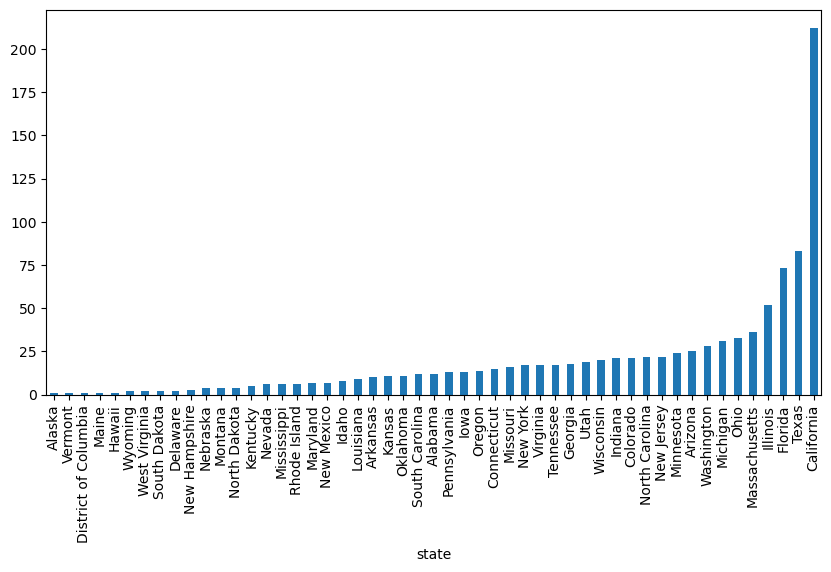

In [593]:
# create bar plot showing how many of top 1,000 cities are in each state
cities.groupby('state')['city'].count().sort_values().plot.bar(figsize=(10, 5))

<Axes: xlabel='city'>

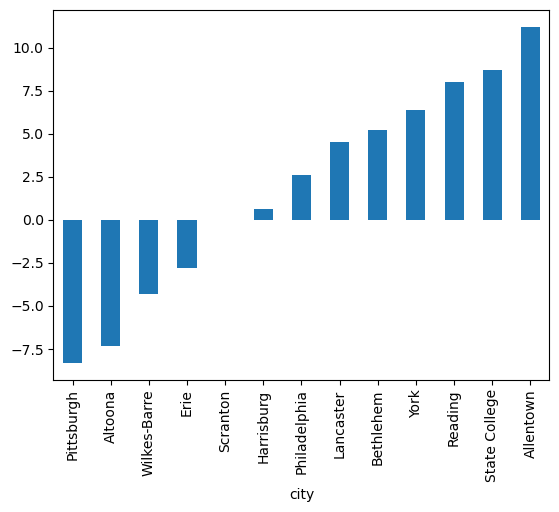

In [594]:
# bar plot comparing growth of all cities in state of PA
(
    cities.loc[cities['state'] == 'Pennsylvania', ['city', 'growth_from_2000_to_2013']]
    .set_index('city')
    ['growth_from_2000_to_2013']
    .str.strip('%')
    .astype(np.float16)
    .sort_values()
    .plot.bar()
)

<Axes: ylabel='population'>

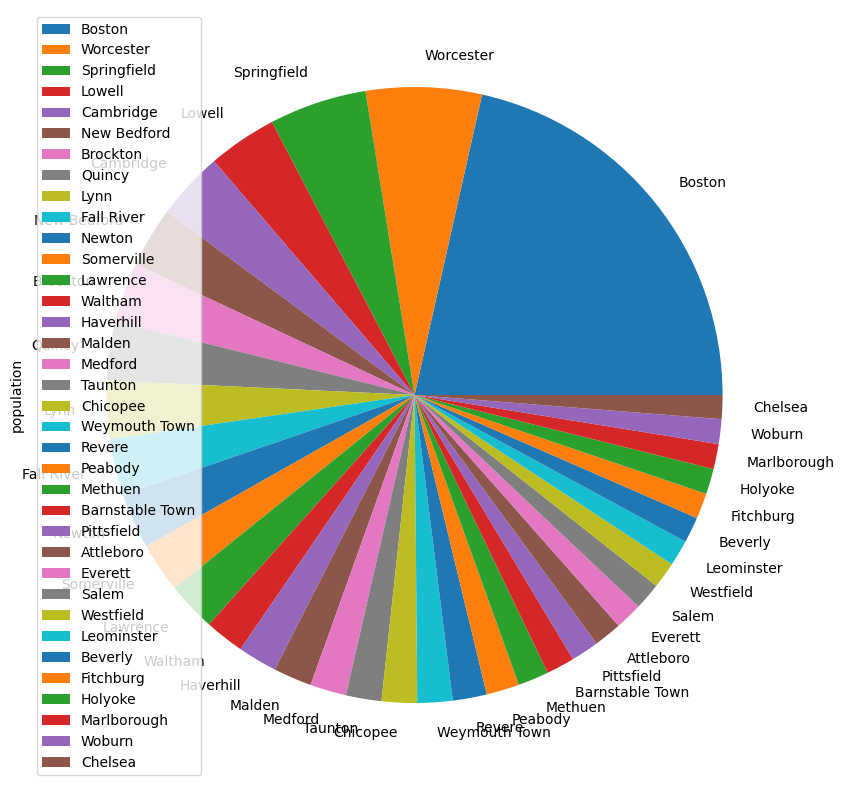

In [595]:
# pie plot showing how much each Massachusetts city in list contributes to overall population
(
    cities.loc[cities['state'] == 'Massachusetts', ['city', 'population']]
    .set_index('city')
    .plot.pie(y='population', figsize=(10, 10))
)

<Axes: xlabel='longitude', ylabel='latitude'>

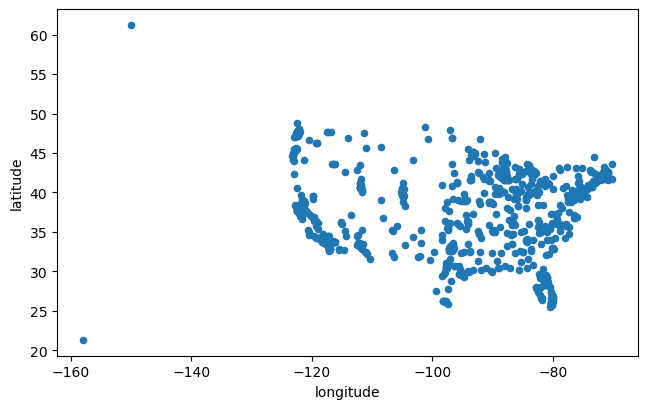

In [596]:
# create scatter plot of cities, putting longitude on x-axis and latitude on y-axis
cities[['longitude', 'latitude']].plot.scatter(x='longitude', y='latitude', figsize=(7.5, 4.5))

### Exercise 43b

<Axes: ylabel='Frequency'>

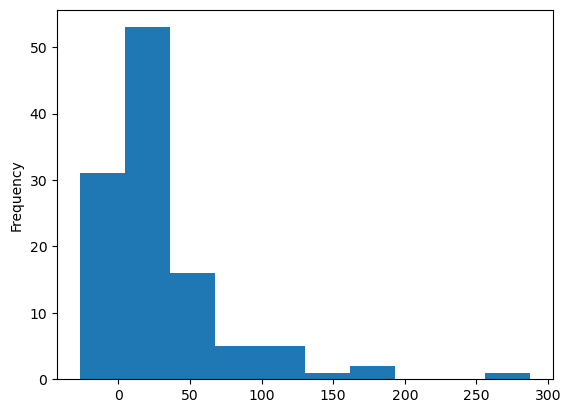

In [598]:
# histogram of growth rates among cities in Texas and Michigan
(
    cities.loc[cities['state'].isin(['Texas', 'Michigan']), 'growth_from_2000_to_2013']
    .str.strip('%')
    .astype(float)
    .plot.hist()
)

<Axes: ylabel='Frequency'>

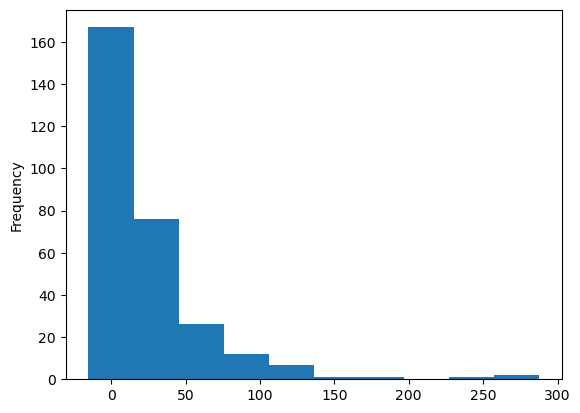

In [599]:
# histogram of growth rates among cities in both Texas and California
(
    cities.loc[cities['state'].isin(['Texas', 'California']), 'growth_from_2000_to_2013']
    .str.strip('%')
    .replace('', np.NaN)
    .astype(float)
    .plot.hist()
)

<Axes: xlabel='state'>

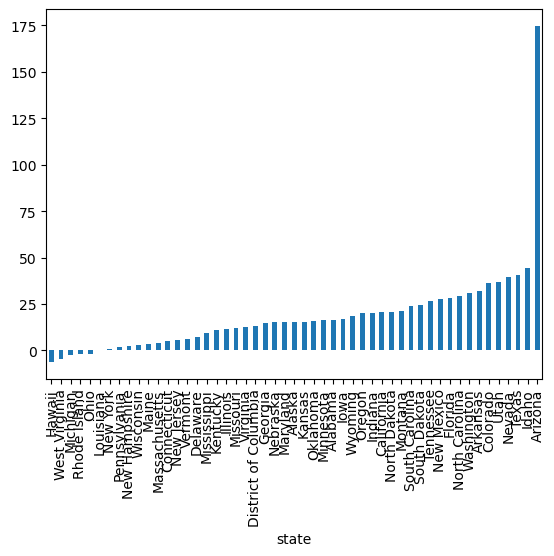

In [600]:
# bar plot of average growth per state
cities['growth_from_2000_to_2013'] = cities['growth_from_2000_to_2013'].str.strip('%').replace('', np.NaN).astype(float)
(
    cities.groupby('state')
    ['growth_from_2000_to_2013']
    .mean()
    .sort_values()
    .plot.bar()
)

## Exercise 44 - Boxplotting weather

In [602]:
# load in CSV, specify columns, no header, rename, parse dates, set 'date_time' as index
chicago = pd.read_csv(root_path + 'chicago,il.csv',
                      usecols=[0, 1,2],
                      header=0,
                      names=['date_time','maxtemp', 'mintemp'],
                      parse_dates=['date_time'],
                      index_col=['date_time'])
chicago.head()

,maxtemp,mintemp
date_time,,
2018-12-11 00:00:00,1,-2
2018-12-11 03:00:00,1,-2
2018-12-11 06:00:00,1,-2
2018-12-11 09:00:00,1,-2
2018-12-11 12:00:00,1,-2


<Axes: >

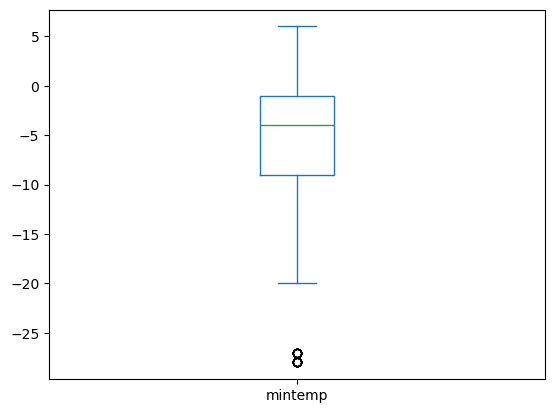

In [603]:
# create boxplot of min temps
chicago['mintemp'].plot.box()

In [604]:
# find values represented as dots on the boxplot
IQR = chicago['mintemp'].quantile(.75) - chicago['mintemp'].quantile(.25)
chicago.loc[chicago['mintemp'] < chicago['mintemp'].quantile(.25) - (1.5 * IQR)]

,maxtemp,mintemp
date_time,,
2019-01-30 00:00:00,-25,-28
2019-01-30 03:00:00,-25,-28
2019-01-30 06:00:00,-25,-28
2019-01-30 09:00:00,-25,-28
2019-01-30 12:00:00,-25,-28
2019-01-30 15:00:00,-25,-28
2019-01-30 18:00:00,-25,-28
2019-01-30 21:00:00,-25,-28
2019-01-31 00:00:00,-17,-27


<Axes: >

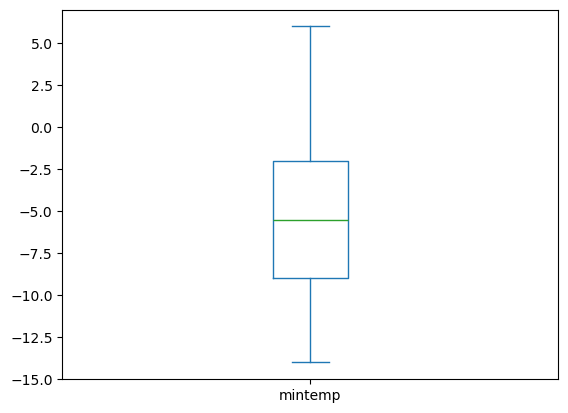

In [605]:
# create boxplot of Chicago's min temps in February
chicago.loc['2019-02', 'mintemp'].plot.box()

<Axes: >

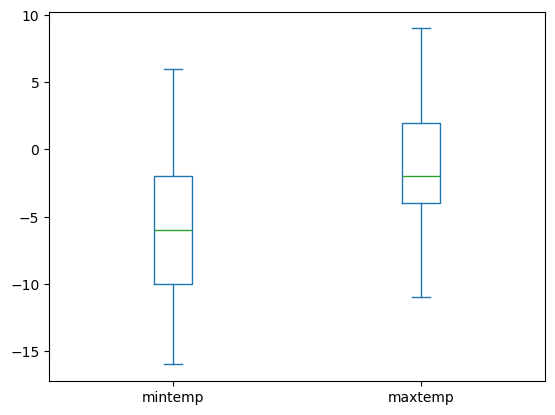

In [606]:
# create side-by-side boxplot of Chicago's minimum and maximum temps in February and March
chicago.loc['2019-02':'2019-03', ['mintemp', 'maxtemp']].plot.box()

In [607]:
# read in Los Angeles, Boston data, add "city" column and combine dfs

chicago = pd.read_csv(root_path + 'chicago,il.csv',
                      parse_dates=['date_time'],
                      names=['date_time', 'mintemp', 'maxtemp'],
                      usecols=['date_time', 'mintemp', 'maxtemp'],
                      index_col=['date_time'],
                      header=0)
chicago['city'] = 'Chicago'

la = pd.read_csv(root_path + 'los+angeles,ca.csv',
                      parse_dates=['date_time'],
                      names=['date_time', 'mintemp', 'maxtemp'],
                      usecols=['date_time', 'mintemp', 'maxtemp'],
                      index_col=['date_time'],
                      header=0)
la['city'] = 'Los Angeles'

boston = pd.read_csv(root_path + 'boston,ma.csv',
                      parse_dates=['date_time'],
                      names=['date_time', 'mintemp', 'maxtemp'],
                      usecols=['date_time', 'mintemp', 'maxtemp'],
                      index_col=['date_time'],
                      header=0)
boston['city'] = 'Boston'

city_temps = pd.concat([chicago, la, boston])
city_temps

,mintemp,maxtemp,city
date_time,,,
2018-12-11 00:00:00,1,-2,Chicago
2018-12-11 03:00:00,1,-2,Chicago
2018-12-11 06:00:00,1,-2,Chicago
2018-12-11 09:00:00,1,-2,Chicago
2018-12-11 12:00:00,1,-2,Chicago
...,...,...,...
2019-03-11 09:00:00,8,2,Boston
2019-03-11 12:00:00,8,2,Boston
2019-03-11 15:00:00,8,2,Boston


In [608]:
# get descriptive stats for mintemp and maxtemp grouped by city
city_temps.groupby('city')['mintemp'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Boston,728.00,2.87,4.95,-12.00,0.00,2.00,6.00,17.00
Chicago,728.00,-0.74,6.13,-25.00,-3.00,0.00,3.00,9.00
Los Angeles,728.00,17.05,2.71,12.00,15.00,16.00,19.00,23.00


city
Boston         Axes(0.125,0.11;0.775x0.77)
Chicago        Axes(0.125,0.11;0.775x0.77)
Los Angeles    Axes(0.125,0.11;0.775x0.77)
dtype: object

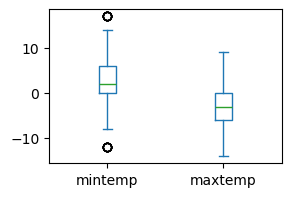

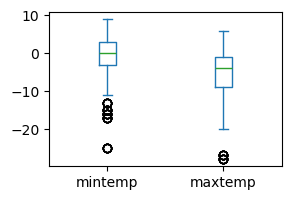

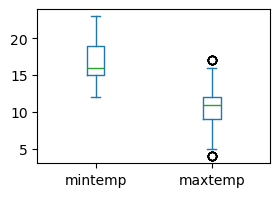

In [609]:
# create side-by-side boxplots showing min and max temp for each of 3 cities
city_temps.groupby('city')[['mintemp', 'maxtemp']].plot.box(figsize=(3,2))

maxtemp       Axes(0.125,0.11;0.352273x0.77)
mintemp    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

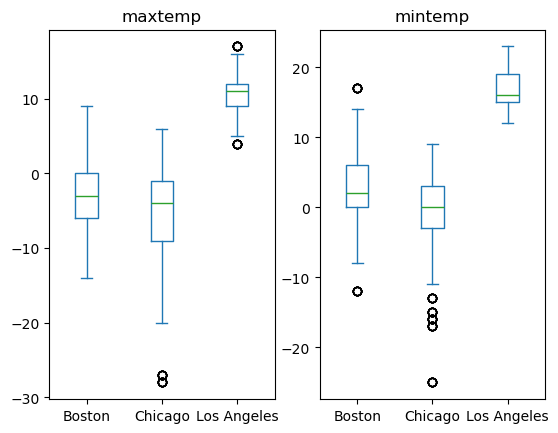

In [610]:
# or, all on one graph
city_temps.plot.box(column=['mintemp', 'maxtemp'], by='city')

### Exercise 44b

In [612]:
# begin with empty dataframe and use for loop to load data from all three cities

csv_list = ['chicago,il.csv', 'los+angeles,ca.csv', 'boston,ma.csv']
city_list = ['Chicago', 'Los Angeles', 'Boston']

dfs_list = []

for file, city in zip(csv_list, city_list):
    df = pd.read_csv(root_path + file,
                     parse_dates=['date_time'],
                     names=['date_time', 'mintemp', 'maxtemp'],
                     usecols=['date_time', 'mintemp', 'maxtemp'],
                     header=0)
    df['city'] = city
    dfs_list.append(df)

city_temps = pd.concat(dfs_list)
city_temps = city_temps.set_index('date_time')
city_temps

,mintemp,maxtemp,city
date_time,,,
2018-12-11 00:00:00,1,-2,Chicago
2018-12-11 03:00:00,1,-2,Chicago
2018-12-11 06:00:00,1,-2,Chicago
2018-12-11 09:00:00,1,-2,Chicago
2018-12-11 12:00:00,1,-2,Chicago
...,...,...,...
2019-03-11 09:00:00,8,2,Boston
2019-03-11 12:00:00,8,2,Boston
2019-03-11 15:00:00,8,2,Boston


In [613]:
# for each city, calculate mean and median for mintemp and maxtemp
city_temps.groupby('city')[['mintemp', 'maxtemp']].describe().T.loc[(slice(None), ['mean', '50%']), :]

city          Boston  Chicago  Los Angeles
mintemp mean    2.87    -0.74        17.05
        50%     2.00     0.00        16.00
maxtemp mean   -3.14    -5.08        10.64
        50%    -3.00    -4.00        11.00

city
Boston         Axes(0.125,0.11;0.775x0.77)
Chicago        Axes(0.125,0.11;0.775x0.77)
Los Angeles    Axes(0.125,0.11;0.775x0.77)
Name: mintemp, dtype: object

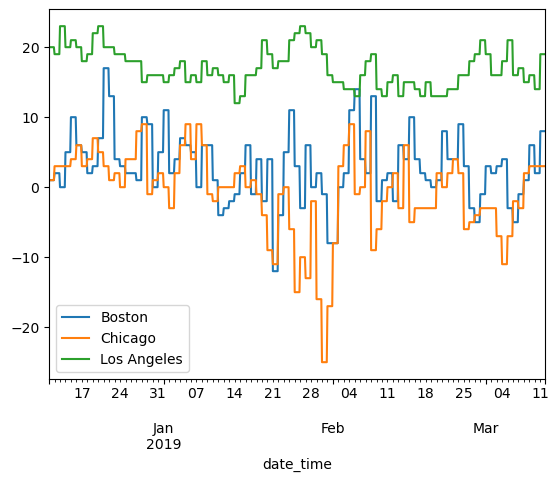

In [614]:
# create line plot showing mintemp in each city
# x-scale shows dates, y-axis showws temps, different line for each city
city_temps.groupby('city')['mintemp'].plot.line(legend=True)

## Exercise 45 - Taxi fare breakdown

In [616]:
# load in data as specified
csv_suffix_list = ['2019-01.csv', '2019-07.csv', '2020-01.csv', '2020-07.csv']
df_list = []

for file_name in csv_suffix_list:
    df = pd.read_csv(root_path + 'nyc_taxi_' + file_name,
                     usecols=['tpep_pickup_datetime',
                              'passenger_count',
                              'trip_distance',
                              'fare_amount',
                              'extra',
                              'mta_tax',
                              'tip_amount',
                              'tolls_amount',
                              'improvement_surcharge',
                              'total_amount',
                              'congestion_surcharge'],
                     parse_dates=['tpep_pickup_datetime'],
                     index_col=['tpep_pickup_datetime'])
    df_list.append(df)

taxi = pd.concat(df_list)
taxi.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_pickup_datetime,,,,,,,,,,
2019-01-01 00:46:40,1.00,1.50,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN
2019-01-01 00:59:47,1.00,2.60,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN
2018-12-21 13:48:30,3.00,0.00,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN
2018-11-28 15:52:25,5.00,0.00,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN
2018-11-28 15:56:57,5.00,0.00,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN


In [617]:
# reset index
taxi = taxi.reset_index()
taxi.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1.00,1.50,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN
1,2019-01-01 00:59:47,1.00,2.60,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN
2,2018-12-21 13:48:30,3.00,0.00,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN
3,2018-11-28 15:52:25,5.00,0.00,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN
4,2018-11-28 15:56:57,5.00,0.00,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN


<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

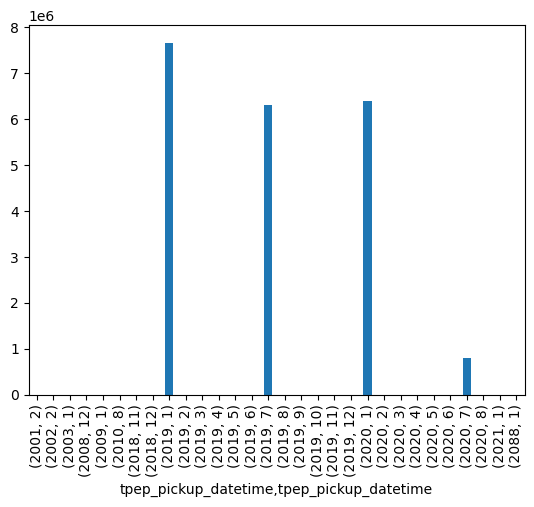

In [618]:
# create bar plot showing how many rides took place during each month and year
taxi.groupby([taxi['tpep_pickup_datetime'].dt.year, taxi['tpep_pickup_datetime'].dt.month])['trip_distance'].count().plot.bar()

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

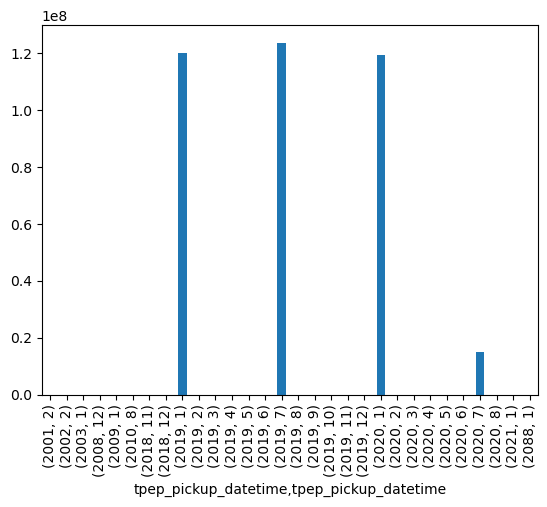

In [619]:
# create bar plot showing total amount paid in taxi rides for every year and month of the data set
taxi.groupby([taxi['tpep_pickup_datetime'].dt.year, taxi['tpep_pickup_datetime'].dt.month])['total_amount'].sum().plot.bar()

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

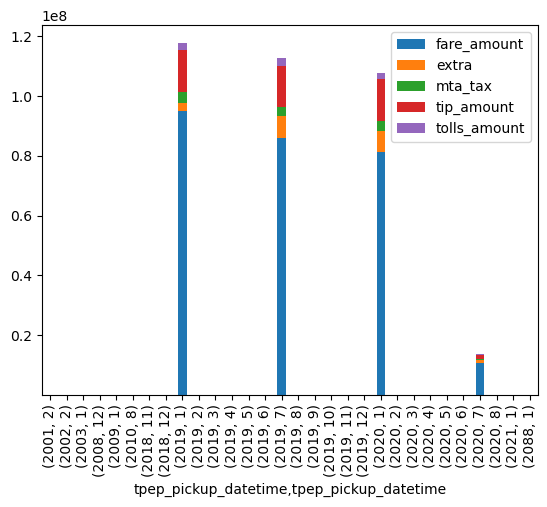

In [620]:
# create bar plot showing 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount' per month and year
# with various components stacked in single bar

pay_components = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']
(
    taxi.groupby([taxi['tpep_pickup_datetime'].dt.year, taxi['tpep_pickup_datetime'].dt.month])
    [pay_components].sum()
    .plot.bar(stacked=True)
)

<Axes: xlabel='passenger_count'>

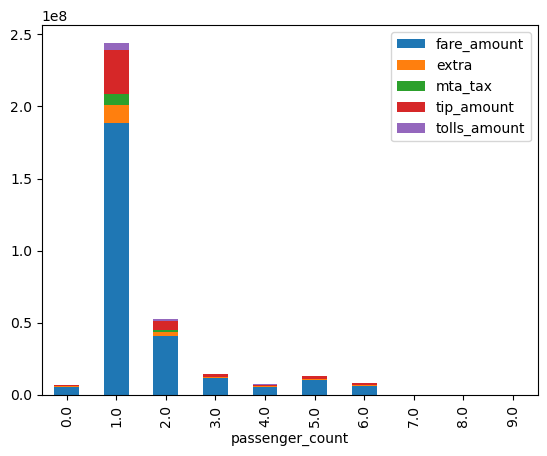

In [621]:
# per number of passengers

(
    taxi.groupby('passenger_count')
    [pay_components].sum()
    .plot.bar(stacked=True)
)

<Axes: ylabel='Frequency'>

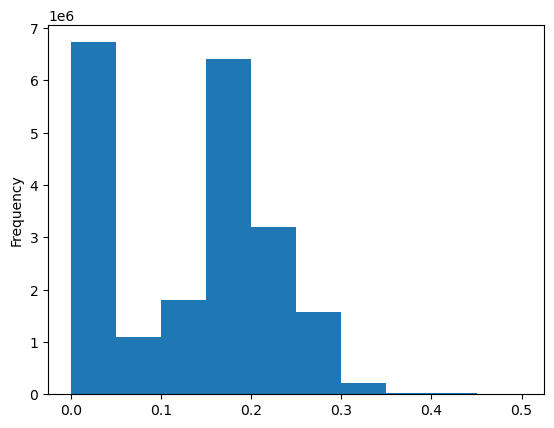

In [622]:
# histogram showing frequency of each tipping percentage between (and including) 0% and 50%
taxi['tip_pct'] = taxi['tip_amount'] / (taxi['total_amount'] - taxi['tip_amount'])

(
    taxi.loc[taxi['fare_amount'] > 0]
    .loc[(taxi['tip_pct'] >=0) & (taxi['tip_pct'] <= 0.5), 'tip_pct']
    .plot.hist()
)
                                                                                                                                                                                       

### Exercise 45b

In [624]:
# set index
taxi = taxi.set_index('tpep_pickup_datetime')

In [625]:
# ensure dayofweek displays as intended
taxi.index.dayofweek

Index([1, 1, 4, 2, 2, 2, 2, 1, 1, 1,
       ...
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype='int32', name='tpep_pickup_datetime', length=21183631)

<Axes: >

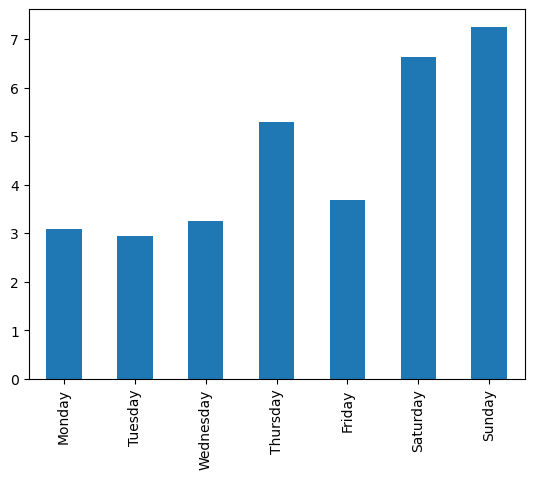

In [626]:
# create bar plot showing average distance traveled per day of the week in July 2020, x-axis with day name
dow_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


(
    taxi.loc['2020-07']
    .assign(day = lambda df:df.index.dayofweek)
    .groupby('day')
    ['trip_distance'].mean()
    .set_axis(dow_list)
    .plot.bar()
)

<Axes: xlabel='trip_distance', ylabel='total_amount'>

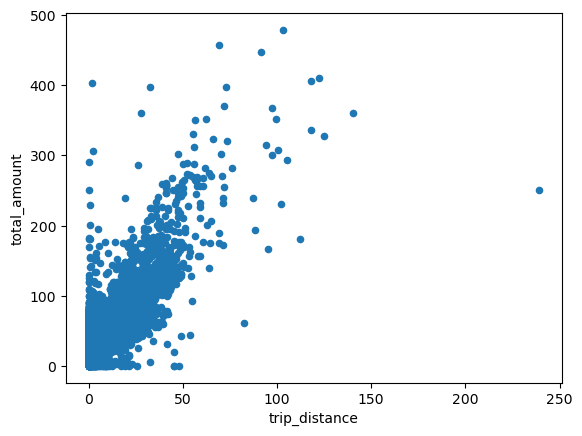

In [627]:
# scatter plot of july 2020 comparing "trip_distance" with "total_amount"
# ignore rides where either value <= 0 or > 500

(
    taxi.loc['2020-07', ['trip_distance', 'total_amount']]
    .loc[lambda df: (df['trip_distance'] > 0) & (df['trip_distance'] <= 500)]
    .loc[lambda df: (df['total_amount'] > 0) & (df['total_amount'] <= 500)]
    .plot.scatter(x='trip_distance', y='total_amount')
)

<Axes: xlabel='trip_distance', ylabel='passenger_count'>

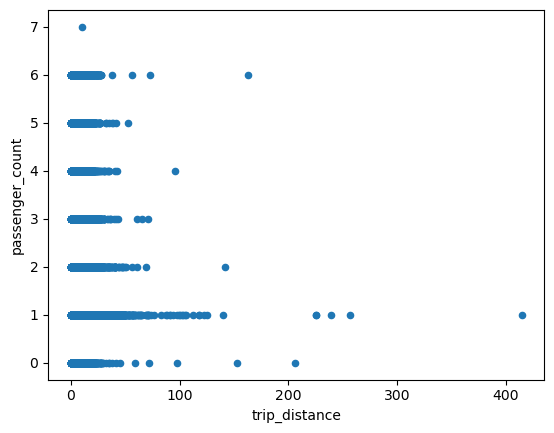

In [628]:
# scatter plot of july 2020, compare "trip_distance" with "passenger_count"
# ignore rides where trip_distance" <= 0 or > 500
(
    taxi.loc['2020-07', ['trip_distance', 'passenger_count']]
    .loc[lambda df: (df['trip_distance'] > 0) & (df['trip_distance'] <= 500)]
    .plot.scatter(x='trip_distance', y='passenger_count')
)

## Exercise 46 - Cars, oil, and ice cream

In [630]:
# read in CSV, rename, parse dates, set 'date' as index, no header
oil = pd.read_csv(root_path + 'wti-daily.csv',
                  names=['date', 'oil'],
                  parse_dates=['date'],
                  index_col=['date'],
                  header=0)
oil.head()

,oil
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [631]:
# similarly load historical ice cream data for half gallon (1.9 liters)
ice_cream = pd.read_csv(root_path + 'ice-cream.csv',
                        names=['date', 'icecream'],
                        parse_dates=['date'],
                        index_col=['date'],
                        header=0)
ice_cream.head()                        

,icecream
date,
1980-01-01,1.755
1980-02-01,1.775
1980-03-01,1.718
1980-04-01,1.769
1980-05-01,1.822


In [632]:
# set icecream column as floating point, remove other rows
ice_cream['icecream'] = pd.to_numeric(ice_cream['icecream'], errors='coerce')
ice_cream.dtypes

icecream    float64
dtype: object

In [633]:
# load US 'miles traveled per month'
miles = pd.read_csv(root_path + 'miles-traveled.csv',
                    names=['date', 'miles'],
                    parse_dates=['date'],
                    index_col=['date'],
                    header=0)
miles.head()

,miles
date,
1970-01-01,"80,173.00"
1970-02-01,"77,442.00"
1970-03-01,"90,223.00"
1970-04-01,"89,956.00"
1970-05-01,"97,972.00"


In [634]:
# combine into single df with three columns, only include dates in common
corr_df = pd.concat([oil, ice_cream, miles], axis=1, join='inner')
corr_df

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.38,"150,277.00"
1986-05-01,13.80,2.37,"160,459.00"
1986-07-01,12.39,2.37,"171,114.00"
1986-08-01,11.56,2.32,"173,977.00"
1986-10-01,15.23,2.38,"159,434.00"
...,...,...,...
2021-07-01,75.33,4.94,"296,475.00"
2021-09-01,68.63,4.90,"277,979.00"
2021-10-01,76.01,4.95,"285,760.00"


In [635]:
# output numeric correlations
corr_df.corr()

,oil,icecream,miles
oil,1.00,0.78,0.65
icecream,0.78,1.00,0.82
miles,0.65,0.82,1.00


<Axes: xlabel='oil', ylabel='icecream'>

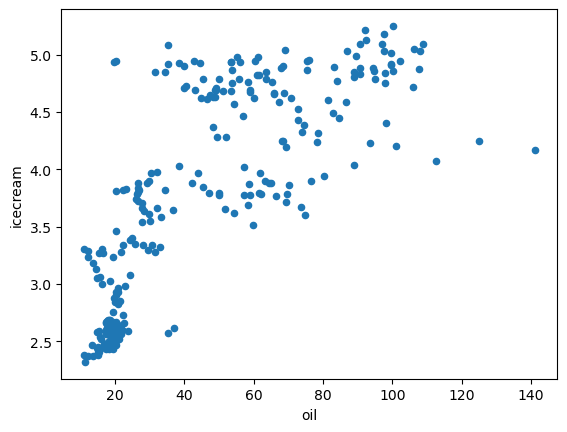

In [636]:
# scatter plot of relationship between oil and icecream
corr_df.plot.scatter(x='oil', y='icecream')

<Axes: xlabel='oil', ylabel='miles'>

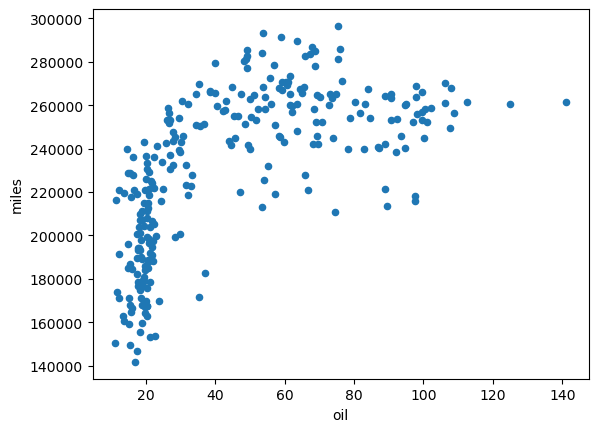

In [637]:
# scatter plot of relationship between oil and miles
corr_df.plot.scatter(x='oil', y='miles')

array([[<Axes: xlabel='oil', ylabel='oil'>,
        <Axes: xlabel='icecream', ylabel='oil'>,
        <Axes: xlabel='miles', ylabel='oil'>],
       [<Axes: xlabel='oil', ylabel='icecream'>,
        <Axes: xlabel='icecream', ylabel='icecream'>,
        <Axes: xlabel='miles', ylabel='icecream'>],
       [<Axes: xlabel='oil', ylabel='miles'>,
        <Axes: xlabel='icecream', ylabel='miles'>,
        <Axes: xlabel='miles', ylabel='miles'>]], dtype=object)

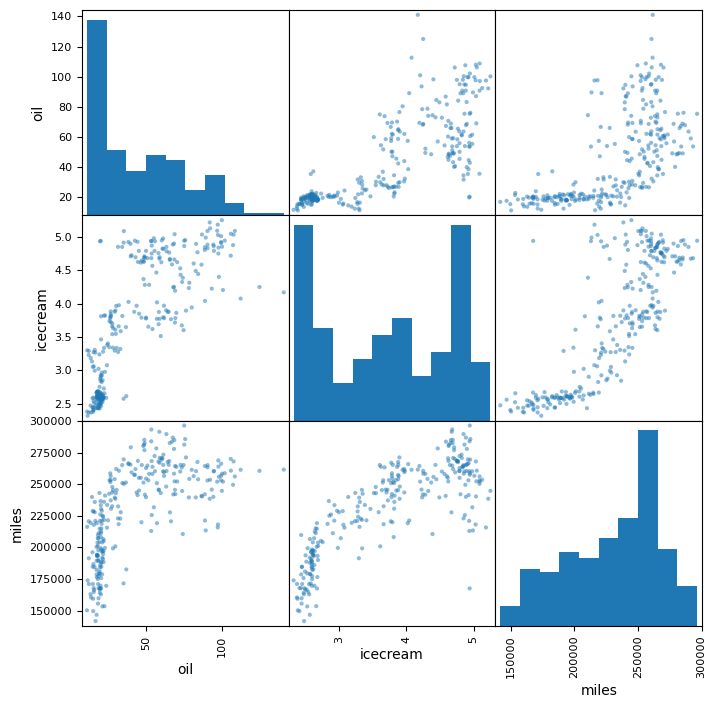

In [638]:
# scatter matrix among all 3 columns
pd.plotting.scatter_matrix(corr_df, figsize=(8, 8))

### Exercise 46b

In [640]:
# is month correlated with any of the values?
corr_df.assign(month = corr_df.index.month).corr()

,oil,icecream,miles,month
oil,1.00,0.78,0.65,0.01
icecream,0.78,1.00,0.82,-0.00
miles,0.65,0.82,1.00,0.08
month,0.01,-0.00,0.08,1.00


array([[<Axes: xlabel='oil', ylabel='oil'>,
        <Axes: xlabel='icecream', ylabel='oil'>,
        <Axes: xlabel='miles', ylabel='oil'>,
        <Axes: xlabel='month', ylabel='oil'>],
       [<Axes: xlabel='oil', ylabel='icecream'>,
        <Axes: xlabel='icecream', ylabel='icecream'>,
        <Axes: xlabel='miles', ylabel='icecream'>,
        <Axes: xlabel='month', ylabel='icecream'>],
       [<Axes: xlabel='oil', ylabel='miles'>,
        <Axes: xlabel='icecream', ylabel='miles'>,
        <Axes: xlabel='miles', ylabel='miles'>,
        <Axes: xlabel='month', ylabel='miles'>],
       [<Axes: xlabel='oil', ylabel='month'>,
        <Axes: xlabel='icecream', ylabel='month'>,
        <Axes: xlabel='miles', ylabel='month'>,
        <Axes: xlabel='month', ylabel='month'>]], dtype=object)

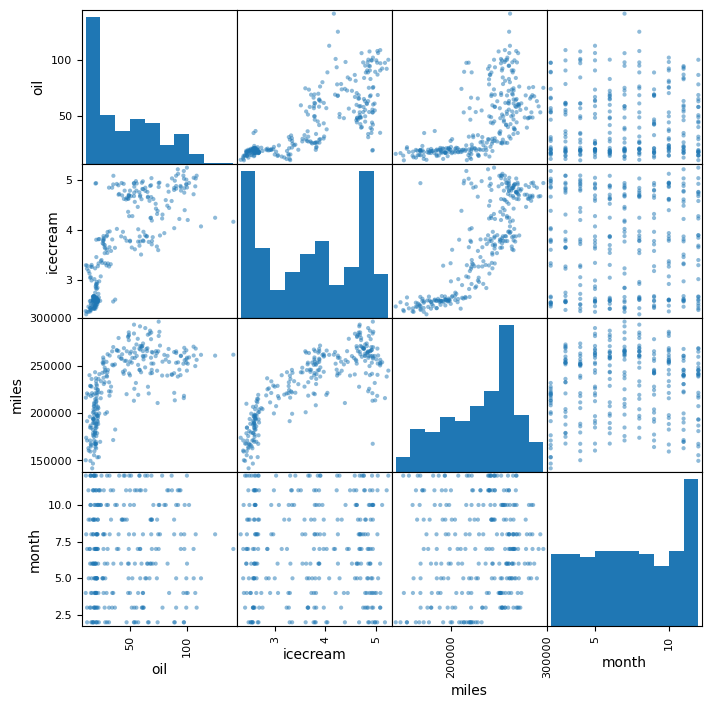

In [641]:
pd.plotting.scatter_matrix(corr_df.assign(month = corr_df.index.month), figsize=(8,8))

<Axes: xlabel='miles', ylabel='icecream'>

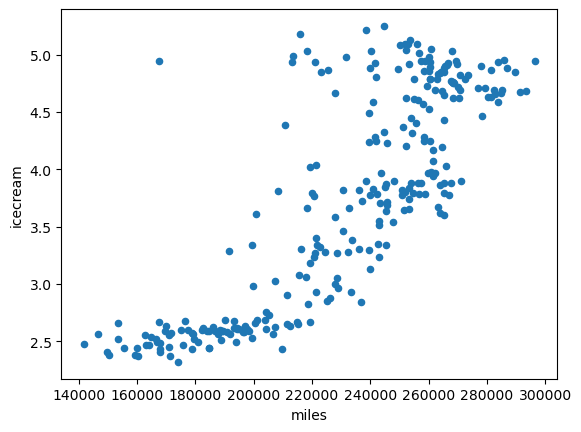

In [642]:
# scatter plot of icecream vs. miles
corr_df.plot.scatter(x='miles', y='icecream')

In [643]:
# instead of inner join, can remove all rows from oil that are not final day of the month
# i think author may have intended first of the month...
corr_df.index.is_month_start.all()

True

In [644]:
# locate start of month prices
oil.loc[oil.index.is_month_start]

,oil
date,
1986-04-01,11.13
1986-05-01,13.80
1986-07-01,12.39
1986-08-01,11.56
1986-10-01,15.23
...,...
2021-07-01,75.33
2021-09-01,68.63
2021-10-01,76.01


## Exercise 47 - Seaborn taxi plots

In [646]:
# create reusable function that loads in data correctly
csv_list = ['nyc_taxi_2020-01.csv', 'nyc_taxi_2020-07.csv']
df_list = []

for file in csv_list:
    df = pd.read_csv(root_path + file,
                     usecols=['tpep_pickup_datetime',
                              'passenger_count',
                              'trip_distance',
                              'total_amount'],
                     parse_dates=['tpep_pickup_datetime'],
                     index_col=['tpep_pickup_datetime'])
    df_list.append(df)
taxi = pd.concat(df_list)
taxi.head()

,passenger_count,trip_distance,total_amount
tpep_pickup_datetime,,,
2020-01-01 00:28:15,1.00,1.20,11.27
2020-01-01 00:35:39,1.00,1.20,12.30
2020-01-01 00:47:41,1.00,0.60,10.80
2020-01-01 00:55:23,1.00,0.80,8.16
2020-01-01 00:01:58,1.00,0.00,4.80


In [647]:
# add 'month' and 'year' columns

taxi['month'] = taxi.index.month_name()
taxi['year'] = taxi.index.year
taxi.head()

,passenger_count,trip_distance,total_amount,month,year
tpep_pickup_datetime,,,,,
2020-01-01 00:28:15,1.00,1.20,11.27,January,2020
2020-01-01 00:35:39,1.00,1.20,12.30,January,2020
2020-01-01 00:47:41,1.00,0.60,10.80,January,2020
2020-01-01 00:55:23,1.00,0.80,8.16,January,2020
2020-01-01 00:01:58,1.00,0.00,4.80,January,2020


In [648]:
# only keep data points where year is 2020 and month is January or July
taxi = taxi.loc[(taxi['year'] == 2020) & (taxi['month'].isin(['January', 'July']))]
taxi

,passenger_count,trip_distance,total_amount,month,year
tpep_pickup_datetime,,,,,
2020-01-01 00:28:15,1.00,1.20,11.27,January,2020
2020-01-01 00:35:39,1.00,1.20,12.30,January,2020
2020-01-01 00:47:41,1.00,0.60,10.80,January,2020
2020-01-01 00:55:23,1.00,0.80,8.16,January,2020
2020-01-01 00:01:58,1.00,0.00,4.80,January,2020
...,...,...,...,...,...
2020-07-19 13:27:52,NaN,24.23,83.50,July,2020
2020-07-19 13:02:00,NaN,4.40,19.78,July,2020
2020-07-19 13:32:00,NaN,8.78,38.45,July,2020


In [649]:
# set new numeric range index numbered starting at 0
taxi = taxi.reset_index()
taxi

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,year
0,2020-01-01 00:28:15,1.00,1.20,11.27,January,2020
1,2020-01-01 00:35:39,1.00,1.20,12.30,January,2020
2,2020-01-01 00:47:41,1.00,0.60,10.80,January,2020
3,2020-01-01 00:55:23,1.00,0.80,8.16,January,2020
4,2020-01-01 00:01:58,1.00,0.00,4.80,January,2020
...,...,...,...,...,...,...
7205199,2020-07-19 13:27:52,NaN,24.23,83.50,July,2020
7205200,2020-07-19 13:02:00,NaN,4.40,19.78,July,2020
7205201,2020-07-19 13:32:00,NaN,8.78,38.45,July,2020
7205202,2020-07-19 13:28:00,NaN,6.50,29.77,July,2020


In [650]:
# assign df to random sample of 1% of the elements in original df
taxi = taxi.sample(frac=.01, random_state=0)
taxi

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,year
7201592,2020-07-18 13:44:00,NaN,11.73,49.20,July,2020
3111140,2020-01-16 19:05:14,3.00,0.78,12.25,January,2020
3854818,2020-01-20 15:57:03,1.00,0.91,12.09,January,2020
427261,2020-01-03 16:44:46,1.00,22.31,65.92,January,2020
234275,2020-01-02 13:19:53,1.00,2.03,17.16,January,2020
...,...,...,...,...,...,...
6603763,2020-07-10 11:52:47,1.00,0.98,10.56,July,2020
3230663,2020-01-17 10:21:29,2.00,1.27,14.76,January,2020
3128441,2020-01-16 20:24:15,1.00,3.13,18.96,January,2020
5113155,2020-01-26 11:48:22,1.00,1.22,10.30,January,2020


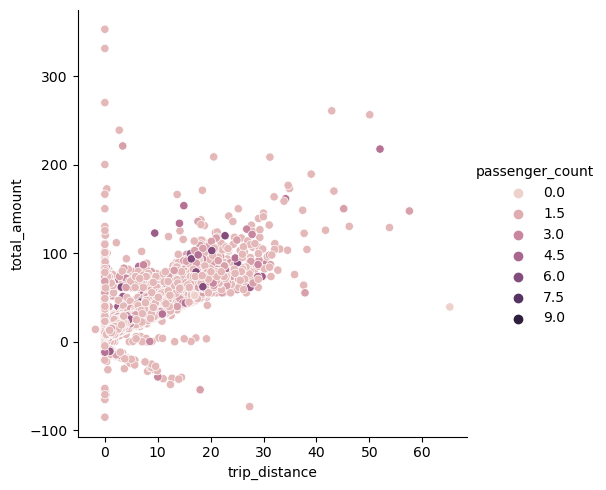

In [651]:
# using Seaborn, create scatter plot
# x-axis = 'trip_distance'
# y-axis = 'total_amount'
# colors set by 'passenger_count'
sns.relplot(data=taxi, x='trip_distance', y='total_amount', hue='passenger_count')

In [652]:
# why are there colors for passenger counts 1.5, 4.5, 7.5?
taxi['passenger_count'].value_counts()
# seaborn seems to want to plot evenly spaced categories

passenger_count
1.00    50936
2.00    10385
3.00     2829
5.00     2366
6.00     1481
0.00     1376
4.00     1375
9.00        1
Name: count, dtype: int64

D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


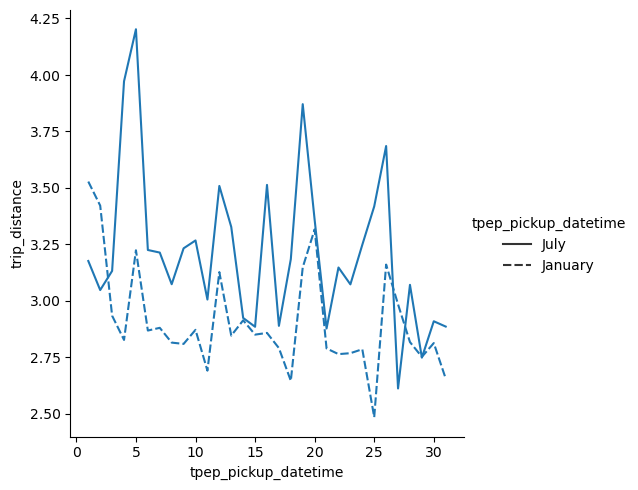

In [653]:
# create line plot showing avg trip distance traveled on each day of January and July
(
    sns.relplot(data=taxi,
                kind='line',
                x=taxi['tpep_pickup_datetime'].dt.day.replace([np.inf, -np.inf], np.nan),
                y=taxi['trip_distance'].replace([np.inf, -np.inf], np.nan),
                style=taxi['tpep_pickup_datetime'].dt.month_name(),
                errorbar=None)
)

# attempted to resolve errors by removing potential np.inf values, but did not find any
# does not affect the display of the graph as intended

In [654]:
# create day column for ease of use
taxi['day'] = taxi['tpep_pickup_datetime'].dt.day

<Axes: xlabel='day', ylabel='count'>

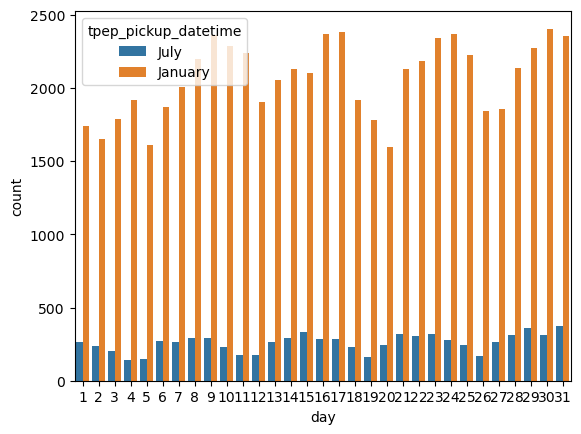

In [655]:
# show number of trips taken each day of both months
# x-axis day of month
# y-axis number of trips


(
    sns.countplot(data=taxi,
                  x='day',
                  hue=taxi['tpep_pickup_datetime'].dt.month_name())
)

In [656]:
taxi['month'] = taxi['tpep_pickup_datetime'].dt.month_name()

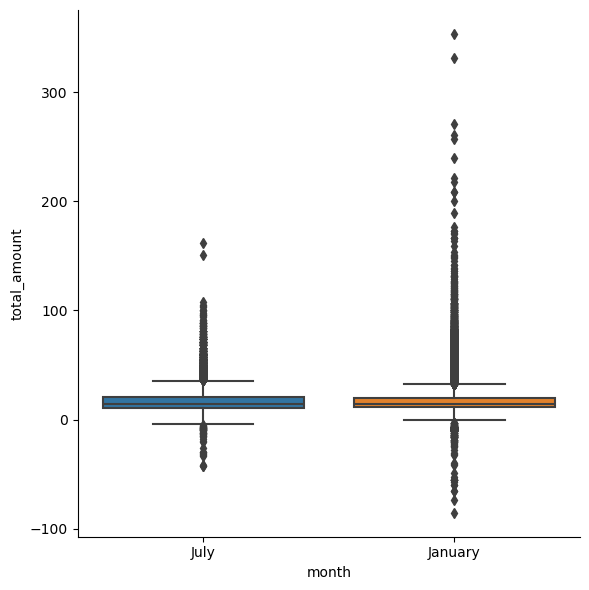

In [657]:
# create boxplot of 'total_amount', one plot for each month

(
    sns.catplot(data=taxi,
                x='month',
                y='total_amount',
                kind='box',
                height=6)
)       

### Exercise 47b

In [659]:
# load data for 2019 and 2020, January and July
csv_list = ['2019-01', '2019-07', '2020-01', '2020-07']
df_list = []

for file in csv_list:
    df = pd.read_csv(root_path + 'nyc_taxi_' + file + '.csv',
                     usecols=['tpep_pickup_datetime',
                              'passenger_count',
                              'trip_distance',
                              'total_amount'],
                     parse_dates=['tpep_pickup_datetime'],
                     index_col=['tpep_pickup_datetime'])
    df_list.append(df)
taxi = pd.concat(df_list)
taxi.head()

,passenger_count,trip_distance,total_amount
tpep_pickup_datetime,,,
2019-01-01 00:46:40,1.00,1.50,9.95
2019-01-01 00:59:47,1.00,2.60,16.30
2018-12-21 13:48:30,3.00,0.00,5.80
2018-11-28 15:52:25,5.00,0.00,7.55
2018-11-28 15:56:57,5.00,0.00,55.55


In [660]:
# remove data outside correct range
taxi = taxi.loc[(taxi.index.year.isin([2019, 2020])) & (taxi.index.month.isin([1,7])),:]

In [661]:
# assign columns for date components
taxi['year'] = taxi.index.year
taxi['month'] = taxi.index.month_name()
taxi['day'] = taxi.index.day
taxi.head()

,passenger_count,trip_distance,total_amount,year,month,day
tpep_pickup_datetime,,,,,,
2019-01-01 00:46:40,1.00,1.50,9.95,2019,January,1
2019-01-01 00:59:47,1.00,2.60,16.30,2019,January,1
2019-01-01 00:21:28,1.00,1.30,9.05,2019,January,1
2019-01-01 00:32:01,1.00,3.70,18.50,2019,January,1
2019-01-01 00:57:32,2.00,2.10,13.00,2019,January,1


D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

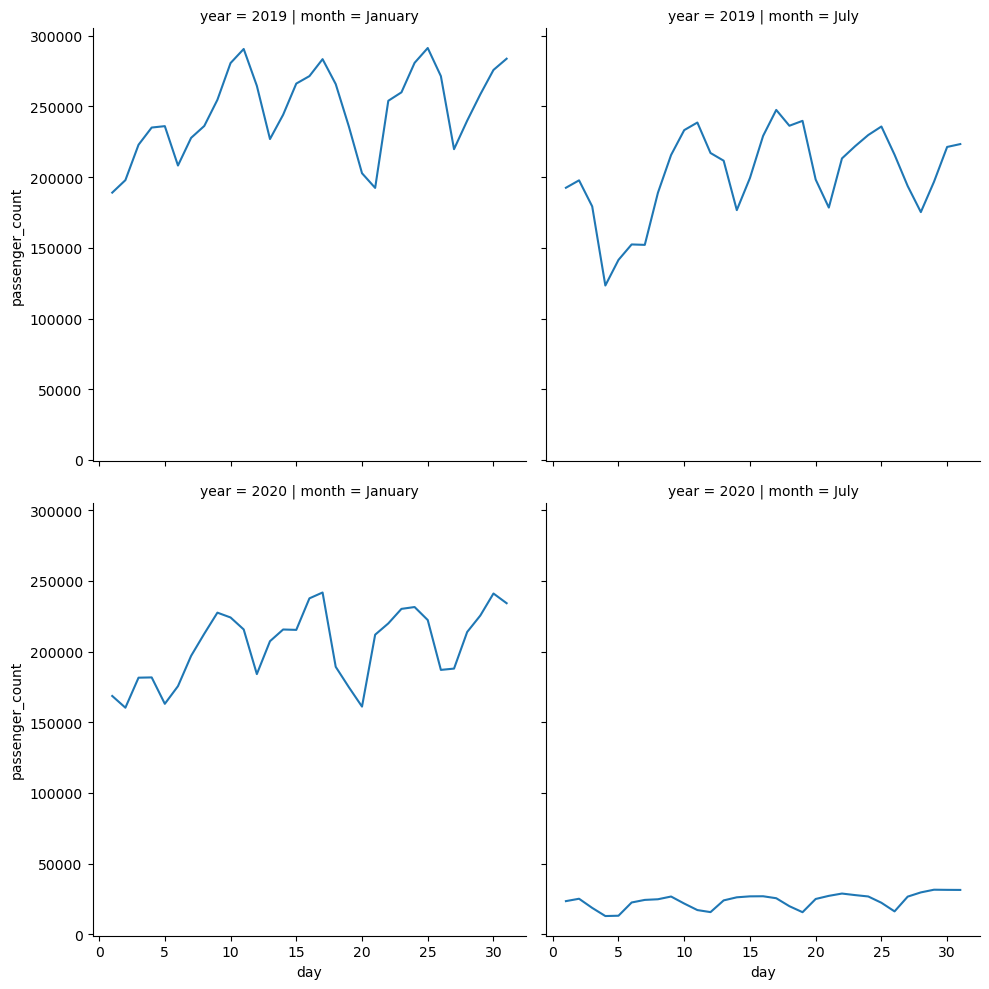

In [662]:
# display number of trips on each day of the month in four separate graphs
(
    sns.relplot(
        data=taxi.groupby(['year', 'month', 'day'])[['passenger_count']].count(),
        x='day',
        y='passenger_count',
        row='year',
        col='month',
        kind='line')
)

In [663]:
# add trip_length column for short, medium, long trips as done in exercise 7

# map to category names

# Short <=2 miles
# Medium >2 & <=10 miles
# Long >10 miles

def categorize(x):
    if x <= 2:
        return 'Short'
    if x > 2 and x <= 10:
        return 'Medium'
    if x > 10:
        return 'Long'

taxi['distance_cat'] = taxi['trip_distance'].apply(categorize)
taxi.head()

,passenger_count,trip_distance,total_amount,year,month,day,distance_cat
tpep_pickup_datetime,,,,,,,
2019-01-01 00:46:40,1.00,1.50,9.95,2019,January,1,Short
2019-01-01 00:59:47,1.00,2.60,16.30,2019,January,1,Medium
2019-01-01 00:21:28,1.00,1.30,9.05,2019,January,1,Short
2019-01-01 00:32:01,1.00,3.70,18.50,2019,January,1,Medium
2019-01-01 00:57:32,2.00,2.10,13.00,2019,January,1,Medium


In [664]:
# show trip distance per day of month in three plots alongside one another, one for each category
grouped = taxi.groupby(['day', 'distance_cat'])['trip_distance'].mean().reset_index()
grouped.head()

,day,distance_cat,trip_distance
0,1,Long,15.94
1,1,Medium,4.17
2,1,Short,1.11
3,2,Long,15.97
4,2,Medium,4.05


D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

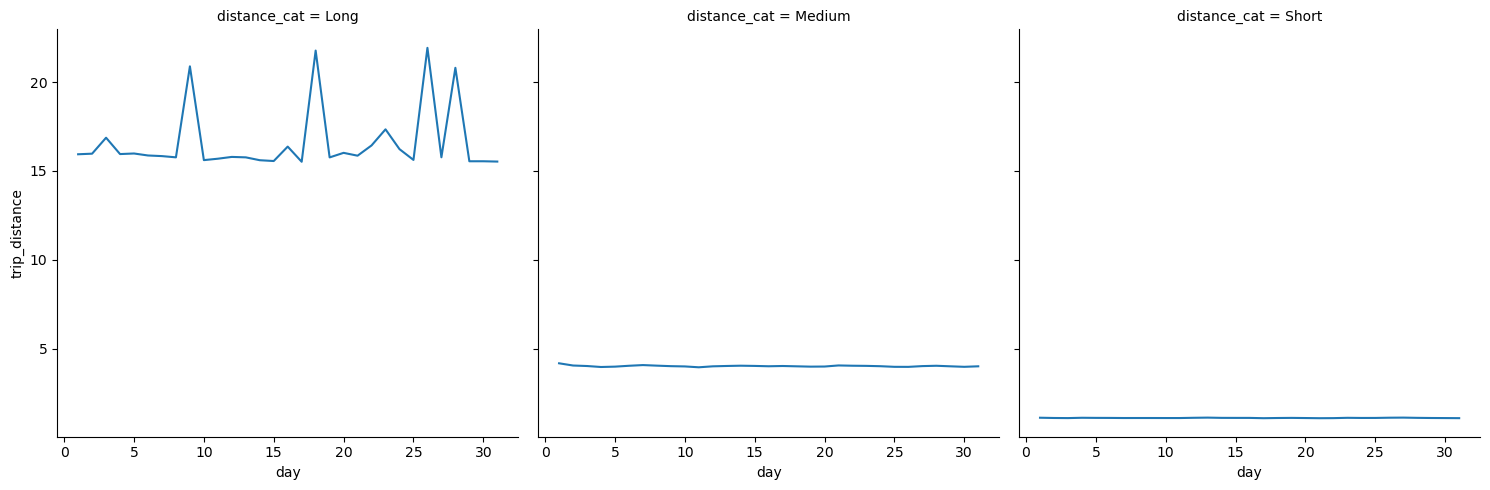

In [665]:
(
    sns.relplot(data=grouped,
                x='day',
                y='trip_distance',
                col='distance_cat',
                kind='line')
)

In [666]:
# bar plot showing how many rides take place each hour (0-24) in each month
# each month as different color, side by side with each other

# set hour column
taxi['hour'] = taxi.index.hour
taxi.head()

,passenger_count,trip_distance,total_amount,year,month,day,distance_cat,hour
tpep_pickup_datetime,,,,,,,,
2019-01-01 00:46:40,1.00,1.50,9.95,2019,January,1,Short,0
2019-01-01 00:59:47,1.00,2.60,16.30,2019,January,1,Medium,0
2019-01-01 00:21:28,1.00,1.30,9.05,2019,January,1,Short,0
2019-01-01 00:32:01,1.00,3.70,18.50,2019,January,1,Medium,0
2019-01-01 00:57:32,2.00,2.10,13.00,2019,January,1,Medium,0


In [667]:
grouped = taxi.groupby(['month', 'hour'])['passenger_count'].count().reset_index()
grouped.head()

,month,hour,passenger_count
0,January,0,376086
1,January,1,270535
2,January,2,197972
3,January,3,140071
4,January,4,107018


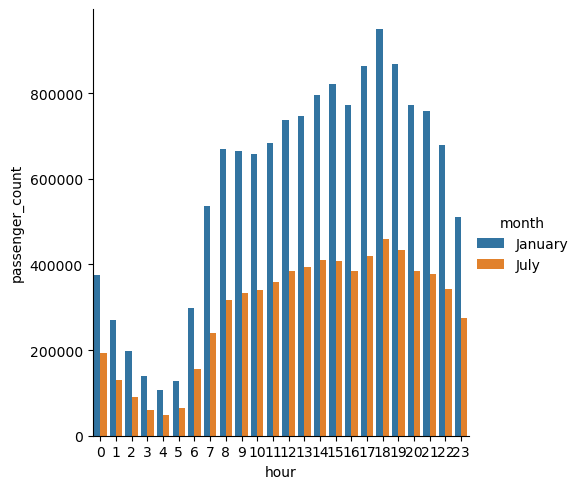

In [668]:
(
    sns.catplot(data=grouped,
                x='hour',
                y='passenger_count',
                hue='month',
                kind='bar')
)

## Chapter 11 Notes
- Box plots helpful in judging initial scaling across multiple columns to see if scaling or additional preprocessing may be required
- When plotting after groupby, specifying single output column plots all groups in same graph. If instead, multiple output columns are specified, they will be plotted on separate graphs.
- df.assign(day=taxi.index.day_name) is helpful to benefit both from the .loc features of a DatetimeIndex while also benefitting from grouping functions by datetime attributes
- pd.plotting.scatter_matrix(df) plots all numeric columns in a scatter matrix
- Series or index can be returned as list at the end with s.to_list() or index.to_list(), respectively, saving time
- Make habit of doing a groupby with .reset_index() at end before plotting with seaborn. "Doing the work for it" seems to work better than trying to allow seaborn to do the grouping with complex queries, which is a potential disadvantage of using the library over other options.

# 12. Performance

## Exercise 48 - Categories

In [4]:
# load in data
parking = pd.read_csv(root_path + 'nyc-parking-violations-2020.csv',
                      usecols=['Plate ID',
                               'Registration State',
                               'Vehicle Make',
                               'Vehicle Color',
                               'Vehicle Body Type'],
                     low_memory=False)

parking.head()

,Plate ID,Registration State,Vehicle Body Type,Vehicle Make,Vehicle Color
0,J58JKX,NJ,SDN,HONDA,BK
1,KRE6058,PA,SUBN,ME/BE,BLK
2,444326R,NJ,SDN,LEXUS,BLACK
3,F728330,OH,SDN,CHEVR,NaN
4,FMY9090,NY,SUBN,JEEP,GREY


In [5]:
# determine amount of memory currently used
parking.memory_usage(deep=True).sum()

3797397954

In [6]:
# turn each column into a category
for column in ['Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 'Vehicle Body Type']:
    parking[column] = parking[column].astype('category')

In [7]:
# new memory usage
parking.memory_usage(deep=True).sum()

480673817

In [8]:
# amount of memory saved?
3797397954-480673817

3316724137

In [9]:
# new data usage / old data usage
480673817/3797397954

0.1265797851114553

In [10]:
# what types are columns now?
parking.dtypes

Plate ID              category
Registration State    category
Vehicle Body Type     category
Vehicle Make          category
Vehicle Color         category
dtype: object

In [11]:
# .info provides deep memory_usage in a higher number (megabytes here)
parking.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495734 entries, 0 to 12495733
Data columns (total 5 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Plate ID            category
 1   Registration State  category
 2   Vehicle Body Type   category
 3   Vehicle Make        category
 4   Vehicle Color       category
dtypes: category(5)
memory usage: 458.4 MB


### Exercise 48b

In [13]:
# which made less sense to convert to category?
# 'Plate ID', as there are many unique values

In [14]:
# which made the most sense to turn into a category?

# load in data
parking = pd.read_csv(root_path + 'nyc-parking-violations-2020.csv',
                      usecols=['Plate ID',
                               'Registration State',
                               'Vehicle Make',
                               'Vehicle Color',
                               'Vehicle Body Type'],
                     low_memory=False)

parking.head()

(parking.count() / parking.nunique()).sort_values(ascending=False)

Registration State    183760.794118
Vehicle Body Type       7619.200734
Vehicle Color           6383.835443
Vehicle Make            2386.432630
Plate ID                   3.850149
dtype: float64

In [15]:
# yes, standardizing the spellings would result in fewer categories, resulting in less memory usage

In [16]:
# read first 10,000 lines from the csv, but all columns
ten_thousand = pd.read_csv(root_path + 'nyc-parking-violations-2020.csv',
                           nrows=10_000)
ten_thousand.head()            

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1477633194,J58JKX,NJ,PAS,05/08/1972 12:00:00 AM,16,SDN,HONDA,P,8730,...,BK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
1,1449715424,KRE6058,PA,PAS,08/29/1977 12:00:00 AM,98,SUBN,ME/BE,P,86530,...,BLK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
2,1455779155,444326R,NJ,PAS,10/03/1988 12:00:00 AM,20,SDN,LEXUS,P,27030,...,BLACK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1458800908,F728330,OH,PAS,01/03/1990 12:00:00 AM,21,SDN,CHEVR,P,33030,...,NaN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
4,1466038676,FMY9090,NY,PAS,02/14/1990 12:00:00 AM,21,SUBN,JEEP,S,45130,...,GREY,0.0,2015,-,0,NaN,NaN,NaN,NaN,NaN


In [17]:
# show 10 columns that would benefit most from conversion to category
(ten_thousand.count() / ten_thousand.nunique()).sort_values(ascending=False).head(10)

Violation Description                5615.000000
Violation Legal Code                 5615.000000
Law Section                          3333.333333
Unregistered Vehicle?                2169.000000
Violation County                     1086.333333
Issuing Agency                        909.090909
Feet From Curb                        833.333333
Violation In Front Of Or Opposite     796.800000
Date First Observed                   400.000000
Plate Type                            344.827586
dtype: float64

## Exercise 49 - Faster reading and writing

In [19]:
# load in data
parking = pd.read_csv(root_path + 'nyc-parking-violations-2020.csv',
                      usecols=['Plate ID',
                               'Registration State',
                               'Vehicle Make',
                               'Vehicle Color',
                               'Vehicle Body Type'],
                     low_memory=False)

In [20]:
# time writing to 3 different file formats

file_names = ['parking.csv', 'parking.json', 'parking.feather']
convert_methods = [parking.to_csv, parking.to_json, parking.to_feather]

In [21]:
# test timing
t0 = time.perf_counter()
t1 = time.perf_counter()

duration = t1 - t0
duration

2.2299995180219412e-05

In [22]:
# function to time all 3
for file, method in zip(file_names, convert_methods):
    t0 = time.perf_counter()
    method(file)
    t1 = time.perf_counter()
    duration = t1 - t0
    print(f'{file}: {duration} seconds')

parking.csv: 20.741107499983627 seconds
parking.json: 10.354889100010041 seconds
parking.feather: 5.399322999990545 seconds


In [23]:
# view the size of the created files
root = 'parking'
for file in glob.glob(f'{root}*'):
    print(f'{file:27}: {os.stat(file).st_size:,}')

parking.csv                : 424,952,751
parking.feather            : 403,367,042
parking.json               : 1,069,427,589


In [24]:
# read files into a df, time how long it takes
read_methods = [pd.read_csv, pd.read_json, pd.read_feather]

for file, method in zip(file_names, read_methods):
    t0 = time.perf_counter()
    method(file)
    t1 = time.perf_counter()
    duration = t1 - t0
    print(f'{file}: {duration} seconds')

parking.csv: 7.324452900036704 seconds
parking.json: 75.53041779994965 seconds
parking.feather: 6.40810679999413 seconds


### Exercise 49b

In [26]:
# compare read_csv speed using pyarrow engine
t0 = time.perf_counter()

pd.read_csv('parking.csv', engine='pyarrow')

t1 = time.perf_counter()
duration = t1 - t0
duration

7.549705000012182

In [27]:
# does specifying dtypes take more or less time to read?
t0 = time.perf_counter()

pd.read_csv('parking.csv',
            dtype={'Plate ID': str,
                   'Registration State': str,
                   'Vehicle Make': str,
                   'Vehicle Color': str,
                   'Vehicle Body Type': str})
t1 = time.perf_counter()
duration = t1 - t0
duration

# doing it like this in this case slows it down

7.723472299985588

In [28]:
# data usage with NumPy vs PyArrow backend?

# NumPy
np_mem = pd.read_csv('parking.csv').memory_usage(deep=True).sum()

# PyArrow
pa_mem = pd.read_csv('parking.csv', dtype_backend='pyarrow').memory_usage(deep=True).sum()

In [29]:
# bytes saved using PyArrow
np_mem - pa_mem

3293170241

In [30]:
# proportion
pa_mem / np_mem

0.15502622079296735

## Exercise 50 - "query" and "eval"

In [32]:
# load in data
parking = pd.read_csv(root_path + 'nyc-parking-violations-2020.csv',
                      usecols=['Plate ID',
                               'Registration State',
                               'Plate Type',
                               'Feet From Curb',
                               'Vehicle Make',
                               'Vehicle Color'],
                      engine='pyarrow')
parking.head()

,Plate ID,Registration State,Plate Type,Feet From Curb,Vehicle Make,Vehicle Color
0,J58JKX,NJ,PAS,0,HONDA,BK
1,KRE6058,PA,PAS,0,ME/BE,BLK
2,444326R,NJ,PAS,0,LEXUS,BLACK
3,F728330,OH,PAS,0,CHEVR,None
4,FMY9090,NY,PAS,0,JEEP,GREY


In [33]:
parking = parking.rename(columns={'Plate ID': 'pid',
                                  'Registration State': 'state',
                                  'Plate Type': 'ptype',
                                  'Feet From Curb': 'feet',
                                  'Vehicle Make': 'make',
                                  'Vehicle Color': 'color'})
parking.head()

,pid,state,ptype,feet,make,color
0,J58JKX,NJ,PAS,0,HONDA,BK
1,KRE6058,PA,PAS,0,ME/BE,BLK
2,444326R,NJ,PAS,0,LEXUS,BLACK
3,F728330,OH,PAS,0,CHEVR,None
4,FMY9090,NY,PAS,0,JEEP,GREY


In [34]:
# find all cars with registration state NY, NJ, CT using df.loc
%timeit parking.loc[parking['state'].isin(['NY', 'NJ', 'CT'])]

1.54 s ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
# using df.query
%timeit parking.query("state == 'NY' | state == 'NJ' | state == 'CT'")

2.19 s ± 59.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
# compare to boolean index with .loc?
%timeit parking.loc[(parking['state'] == 'NY') | (parking['state'] == 'NJ') | (parking['state'] == 'CT')]

3.46 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
# I was efficient in my original syntax, so no speed was gained by utilizing query

In [38]:
# perform many queries using df.loc, df.query, df.eval and compare times

# cars from NY
# cars from NY with passenger (PAS) plates
# white cars from NY with PAS plates
# white cars from NY with PAS plates parked > 1 foot from curb
# white Toyota make cars from NY with PAS plates parked > 1 foot from curb

In [39]:
# using df.loc

# cars from NY
%timeit parking.loc[parking['state'] == 'NY']

# cars from NY with passenger (PAS) plates
%timeit parking.loc[(parking['state'] == 'NY') & (parking['ptype'] == 'PAS')]

# white cars from NY with PAS plates
%timeit parking.loc[(parking['state'] == 'NY') & (parking['ptype'] == 'PAS') & (parking['color'] == 'WHITE')]

# white cars from NY with PAS plates parked > 1 foot from curb
%timeit parking.loc[(parking['state'] == 'NY') & (parking['ptype'] == 'PAS') & (parking['color'] == 'WHITE') & (parking['feet'] > 1)]

# white Toyota make cars from NY with PAS plates parked > 1 foot from curb
%timeit parking.loc[(parking['state'] == 'NY') & (parking['ptype'] == 'PAS') & (parking['color'] == 'WHITE') & (parking['feet'] > 1) & (parking['make'] == 'TOYOT')]

1.75 s ± 84.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.28 s ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.41 s ± 83.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.33 s ± 9.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.12 s ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
# using df.query

# cars from NY
%timeit parking.query("state == 'NY'")

# cars from NY with passenger (PAS) plates
%timeit parking.query("state == 'NY' & ptype == 'PAS'")

# white cars from NY with PAS plates
%timeit parking.query("state == 'NY' & ptype == 'PAS' & color == 'WHITE'")

# white cars from NY with PAS plates parked > 1 foot from curb
%timeit parking.query("state == 'NY' & ptype == 'PAS' & color == 'WHITE' & feet > 1")

# white Toyota make cars from NY with PAS plates parked > 1 foot from curb
%timeit parking.query("state == 'NY' & ptype == 'PAS' & color == 'WHITE' & feet > 1 & make == 'TOYOT'")

1.4 s ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.57 s ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.18 s ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.17 s ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.45 s ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
# using df.eval

# cars from NY
%timeit parking[parking.eval("state == 'NY'")]

# cars from NY with passenger (PAS) plates
%timeit parking[parking.eval("state == 'NY' & ptype == 'PAS'")]

# white cars from NY with PAS plates
%timeit parking[parking.eval("state == 'NY' & ptype == 'PAS' & color == 'WHITE'")]

# white cars from NY with PAS plates parked > 1 foot from curb
%timeit parking[parking.eval("state == 'NY' & ptype == 'PAS' & color == 'WHITE' & feet > 1")]

# white Toyota make cars from NY with PAS plates parked > 1 foot from curb
%timeit parking[parking.eval("state == 'NY' & ptype == 'PAS' & color == 'WHITE' & feet > 1 & make == 'TOYOT'")]

1.4 s ± 24.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.59 s ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.19 s ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.18 s ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.46 s ± 33.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 50b

In [43]:
# testing various syntax and engines

In [44]:
%timeit parking.query("state == 'NY' and ptype == 'PAS' and color == 'WHITE' and feet > 1 and make == 'TOYOT'")

1.46 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%timeit parking.query("state == 'NY' & ptype == 'PAS' & color == 'WHITE' & feet > 1 & make == 'TOYOT'")

1.42 s ± 8.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit parking.query("state == 'NY' and ptype == 'PAS' and color == 'WHITE' and feet > 1 and make == 'TOYOT'", engine='python')

1.49 s ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%timeit parking.query("state == 'NY' & ptype == 'PAS' & color == 'WHITE' & feet > 1 & make == 'TOYOT'", engine='python')

1.46 s ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
# query cars ticketed more than 1 meter from the curb using df.loc and df.query
%timeit parking.loc[parking['feet'] > 3.28]
%timeit parking.query("feet > 3.28")

58.5 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
97.9 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
# more than 1 meter from curb and from NY (also tested .isin() to show how powerful it is)
%timeit parking.loc[(parking['feet'] > 3.28) & (parking['state'].isin(['NY']))]
%timeit parking.loc[(parking['feet'] > 3.28) & (parking['state'] == 'NY')]
%timeit parking.query("feet > 3.28 & state == 'NY'")

486 ms ± 6.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
841 ms ± 19.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
511 ms ± 3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Chapter 12 Notes
- df.memory_usage(deep=True) includes memory of object data types that normally is not included in the calculation
- (df.count() / df.nunique()).sort_values(ascending=False) is helpful in determining which columns could benefit most from being converted to categorical dtype
- df.info(memory_usage='deep') provides usage in a higher number (e.g. mb, gb)
- pd.read_csv(filename, engine='pyarrow') can be up to 20x faster, can also use pd.from_feather('myfile.feather')
- Using pd.read_csv(filename, dtype_backend='pyarrow') can take advantage of Apache Arrow dtypes in the backend. Simple comparisons currently faster with PyArrow, but more complex groupings and joins are still currently faster with NumPy backend.
- df.to_feather('myfile.feather') reads to feather file
- From my testing, using engine='python' vs. 'numexpr' didn't make any computational difference with df.query. Using query on smaller dfs can end up being slower but it's a great option to be comfortable with when working with larger datasets. Bottleneck is often at assignment/retrieval of elements, not calculations, which could be the case here.
- .isin() is extremely efficient, even when using only one value in the list

# 13. Final Project

## 1.

In [53]:
# load in scorecard data
institutions = pd.read_csv(root_path + 'Most-Recent-Cohorts-Institution.csv.gz',
                        usecols=['OPEID6',
                                 'INSTNM',
                                 'CITY',
                                 'STABBR',
                                 'FTFTPCTPELL',
                                 'TUITIONFEE_IN',
                                 'TUITIONFEE_OUT',
                                 'ADM_RATE',
                                 'NPT4_PUB',
                                 'NPT4_PRIV',
                                 'NPT41_PUB',
                                 'NPT41_PRIV',
                                 'NPT45_PUB',
                                 'NPT45_PRIV',
                                 'MD_EARN_WNE_P10',
                                 'C100_4'])
institutions.head()

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563
2,25034,Amridge University,Montgomery,AL,NaN,NaN,17618.0,NaN,NaN,17385.0,NaN,6950.0,6950.0,37895.0,0.2500,0.6667
3,1055,University of Alabama in Huntsville,Huntsville,AL,0.7711,17208.0,NaN,13631.0,19862.0,NaN,NaN,11338.0,23734.0,54361.0,0.3109,0.2304
4,1005,Alabama State University,Montgomery,AL,0.9888,19534.0,NaN,19581.0,17559.0,NaN,NaN,11068.0,19396.0,32084.0,0.1462,0.7590


## 2.

In [55]:
# load in fields of study data
fields = pd.read_csv(root_path + 'FieldOfStudyData1718_1819_PP.csv.gz',
                     usecols=['OPEID6',
                              'INSTNM',
                              'CREDDESC',
                              'CIPDESC',
                              'CONTROL'])
fields.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


## 3.

In [57]:
# state with greatest number of universities
institutions['STABBR'].value_counts(ascending=False).head()

STABBR
CA    705
NY    450
TX    429
FL    394
PA    345
Name: count, dtype: int64

In [58]:
# city, in which state, with greatest number of universities
institutions[['CITY', 'STABBR']].value_counts(ascending=False).head()

CITY         STABBR
New York     NY        81
Chicago      IL        70
Houston      TX        66
Los Angeles  CA        52
Brooklyn     NY        51
Name: count, dtype: int64

In [59]:
# how much memory saved setting CITY and STABBR to category dtype
city_before = institutions['CITY'].memory_usage(deep=True)
state_before = institutions['STABBR'].memory_usage(deep=True)

# convert to category dtype
institutions['CITY'] = institutions['CITY'].astype('category')
institutions['STABBR'] = institutions['STABBR'].astype('category')

# compare memory difference 
city_after = institutions['CITY'].memory_usage(deep=True)
state_after = institutions['STABBR'].memory_usage(deep=True)

print(f'City memory saved: {city_before - city_after}')
print(f'State memory saved: {state_before - state_after}')

City memory saved: 198560
State memory saved: 380811


<Axes: ylabel='Frequency'>

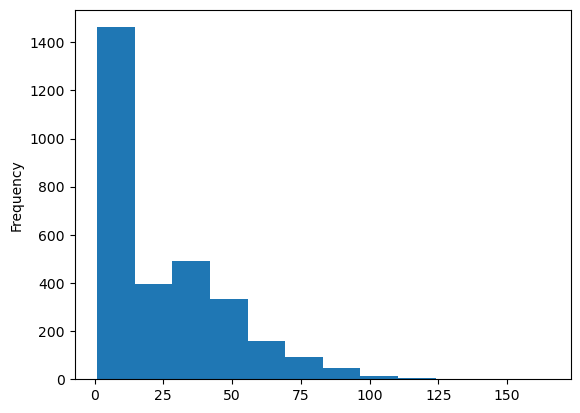

In [60]:
# histogram showing how many bachelors programs universities offer
(
    fields.loc[fields['CREDDESC'] == 'Bachelors Degree']
    .groupby('INSTNM')['CREDDESC'].count()
    .plot.hist(bins=12)
)

In [61]:
# determine which university offers greatest number of different bachelors programs
(
    fields.loc[fields['CREDDESC'] == 'Bachelors Degree']
    .groupby('INSTNM')['CREDDESC'].count()
    .sort_values(ascending=False).head()
)

INSTNM
Westminster College                          165
Pennsylvania State University-Main Campus    141
University of Washington-Seattle Campus      137
Ohio State University-Main Campus            126
Bethel University                            125
Name: CREDDESC, dtype: int64

<Axes: ylabel='Frequency'>

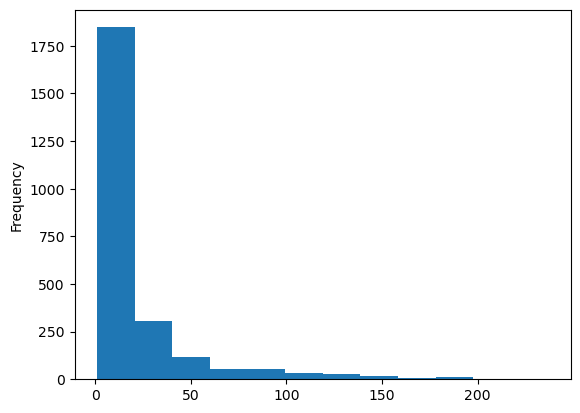

In [62]:
# create histogram showing how many graduate programs universities offer
(
    fields.loc[fields['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"])]
    .groupby('INSTNM')['CIPDESC'].count()
    .plot.hist(bins=12)
)

In [63]:
# which universities offer greatest number of different graduate programs
(
    fields.loc[fields['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"])]
    .groupby('INSTNM')['CIPDESC'].count().sort_values(ascending=False).head()
)

INSTNM
University of Washington-Seattle Campus      237
Pennsylvania State University-Main Campus    230
New York University                          226
University of Minnesota-Twin Cities          205
Ohio State University-Main Campus            200
Name: CIPDESC, dtype: int64

## 4.

In [65]:
# how many schools offer bachelor's degrees, but not master's or doctorates
has_grad = (
    fields.loc[fields['CREDDESC'].isin(["Master's Degree", "Doctoral Degree",]), 'INSTNM']
    .unique()
)

(
    fields.loc[~fields['INSTNM'].isin(has_grad)]
    .loc[lambda df: df['CREDDESC'].isin(['Bachelors Degree'])]['INSTNM']
    .unique().size
)

923

In [66]:
# how many offer master's and doctoral degrees but not bachelors?
has_bach = (
    fields.loc[fields['CREDDESC'].isin(['Bachelors Degree']), 'INSTNM']
    .unique()
)

(
    fields.loc[~fields['INSTNM'].isin(has_bach)]
    .loc[lambda df: df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"])]['INSTNM']
    .unique().size
)

404

In [67]:
# how many institutions offer bachelors degrees whose name contains the term "Computer Science"
(
    fields.loc[(fields['CREDDESC'].isin(['Bachelors Degree'])) & (fields['CIPDESC'].str.contains('Computer Science'))]
    ['INSTNM'].unique().size
)

762

In [68]:
# how many of each institution type offer a CS program
(
    fields.loc[(fields['CREDDESC'].isin(['Bachelors Degree'])) & (fields['CIPDESC'].str.contains('Computer Science'))]
    .drop_duplicates(subset='INSTNM')
    .groupby('CONTROL')['INSTNM'].count().sort_values(ascending=False)
)

CONTROL
Private, nonprofit     458
Public                 257
Foreign                 29
Private, for-profit     18
Name: INSTNM, dtype: int64

## 5.

<Axes: ylabel='INSTNM'>

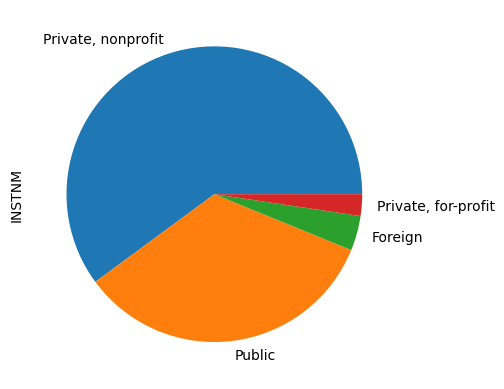

In [70]:
# pie chart showing different types of institutions that offer CS degrees
(
    fields.loc[(fields['CREDDESC'].isin(['Bachelors Degree'])) & (fields['CIPDESC'].str.contains('Computer Science'))]
    .drop_duplicates(subset='INSTNM')
    .groupby('CONTROL')['INSTNM'].count().sort_values(ascending=False).plot.pie()
)

## 6.

In [72]:
# min, median, mean, and max tuitions for undergrad CS degree
# defined as Bachelors program with phrase CS in name
# use out of state tuition cost
(
    fields.loc[(fields['CREDDESC'].isin(['Bachelors Degree'])) & (fields['CIPDESC'].str.contains('Computer Science'))]
    .merge(institutions, on='INSTNM')
    ['TUITIONFEE_OUT'].describe().loc[['min', '50%', 'mean', 'max']]
)

min      3154.00000
50%     30884.00000
mean    31592.36478
max     61671.00000
Name: TUITIONFEE_OUT, dtype: float64

## 7.

In [74]:
# describe tuition again, grouped by different types of universities
(
    fields.loc[(fields['CREDDESC'].isin(['Bachelors Degree'])) & (fields['CIPDESC'].str.contains('Computer Science'))]
    .merge(institutions, on='INSTNM')
    .groupby('CONTROL')
    ['TUITIONFEE_OUT'].describe().T.loc[['min', '50%', 'mean', 'max']]
)

CONTROL,"Private, for-profit","Private, nonprofit",Public
min,8280.000000,4300.000000,3154.000000
50%,12311.000000,36000.000000,20574.000000
mean,14780.533333,36675.594542,22770.194757
max,25820.000000,61671.000000,47220.000000


## 8.

In [76]:
# determine correlation between admission rate and tuition cost
institutions.loc[:, ['ADM_RATE', 'TUITIONFEE_OUT']].corr()

# admission rate and tuition cost are weakly inversely correlated
# this means that, as admission rate increases, tuition fee tends to decrease

,ADM_RATE,TUITIONFEE_OUT
ADM_RATE,1.000000,-0.309658
TUITIONFEE_OUT,-0.309658,1.000000


## 9.

<Axes: xlabel='TUITIONFEE_OUT', ylabel='ADM_RATE'>

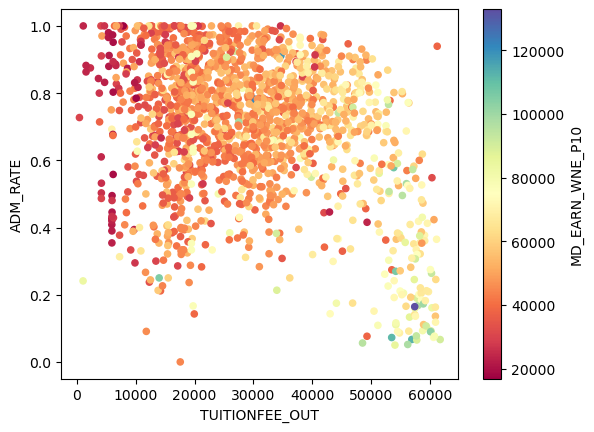

In [78]:
# scatter plot with tuition on x-axis, admission rate on y-axis
# median earnings after 10 years used for coloring with "Spectral" colormap
(
    institutions.plot.scatter(x='TUITIONFEE_OUT',
                              y='ADM_RATE',
                              c='MD_EARN_WNE_P10',
                              colormap='Spectral')
)

## 10.

In [80]:
# determine which universities in top 25% of tuition and also top 25% with Pell grants
# print institution name, city, and state, ordered by name

top_tuition = institutions['TUITIONFEE_OUT'].quantile(.75)
top_pell = institutions['FTFTPCTPELL'].quantile(.75)

(
    institutions.loc[(institutions['TUITIONFEE_OUT'] >= top_tuition) & (institutions['FTFTPCTPELL'] >= top_pell),
    ['INSTNM', 'CITY', 'STABBR']]
    .sort_values(by='INSTNM')
)

,INSTNM,CITY,STABBR
5491,Antioch College,Yellow Springs,OH
1206,Berea College,Berea,KY
1930,Berkeley College-Woodland Park,Woodland Park,NJ
1932,Bloomfield College,Bloomfield,NJ
2334,Chowan University,Murfreesboro,NC
1543,Dorsey College,Madison Heights,MI
3758,Dorsey College-Roseville,Roseville,MI
5138,Dorsey College-Saginaw,Saginaw,MI
3734,Dorsey College-Wayne,Wayne,MI
1542,Dorsey School of Business-Madison Heights,Madison Heights,MI


## 11.

In [82]:
# how many institutions does bottom quintile bracket receive money?
(
    institutions.loc[(institutions['NPT41_PUB'] < 0) | (institutions['NPT41_PRIV'] < 0)]
    ['INSTNM'].unique().size
)

12

## 12.

In [84]:
# average prop that bottom quintile pays vs top quintile at pub universities
(
    (institutions['NPT41_PUB'] / institutions['NPT45_PUB']).mean()
)

0.5233221766529079

## 13.

In [86]:
# at private universities
(
    (institutions['NPT41_PRIV'] / institutions['NPT45_PRIV']).mean()
)

0.714905619436487

## 14.

In [88]:
# which universities offer best ROI across all disciplines

In [89]:
# which schools in cheapest 25% do students have top 25% of salaries?
cheapest = institutions['TUITIONFEE_OUT'].quantile(.25)
top_salary = institutions['MD_EARN_WNE_P10'].quantile(.75)
(
    institutions.loc[(institutions['TUITIONFEE_OUT'] <= cheapest) & (institutions['MD_EARN_WNE_P10'] >= top_salary)]
    ['INSTNM']
)

249                         City College of San Francisco
272                                 Diablo Valley College
363                                      Moorpark College
380                                        Ohlone College
842                        Brigham Young University-Idaho
895                     Graham Hospital School of Nursing
1120                     Northwest Iowa Community College
1179                     Manhattan Area Technical College
1642                        Inver Hills Community College
1648          Mayo Clinic College of Medicine and Science
1661                     North Hennepin Community College
1662                         Normandale Community College
1775                                     Logan University
1852                                  Bellevue University
1880            Nebraska College of Technical Agriculture
2292                United States Merchant Marine Academy
2435                               Bismarck State College
2446          

In [90]:
# author did not originally specify it was pub only, will find that too now
cheapest = institutions['NPT4_PUB'].quantile(.25)
top_salary = institutions['MD_EARN_WNE_P10'].quantile(.75)
(
    institutions.loc[(institutions['NPT4_PUB'] <= cheapest) & (institutions['MD_EARN_WNE_P10'] >= top_salary)]
    ['INSTNM'].sort_values()
)

2093                  CUNY Bernard M Baruch College
2096                          CUNY Brooklyn College
2098                              CUNY City College
2101                            CUNY Hunter College
2102      CUNY John Jay College of Criminal Justice
2105                            CUNY Lehman College
2108                            CUNY Queens College
2111                              CUNY York College
203     California State University-Dominguez Hills
208         California State University-Los Angeles
228                                  Canada College
432                            College of San Mateo
2097                  College of Staten Island CUNY
267                                 De Anza College
645                Florida International University
656       George T Baker Aviation Technical College
363                                Moorpark College
2013                  New Mexico Military Institute
450                                 Skyline College
3218        

In [91]:
# now for private institutions
cheapest = institutions['NPT4_PRIV'].quantile(.25)
top_salary = institutions['MD_EARN_WNE_P10'].quantile(.75)
(
    institutions.loc[(institutions['NPT4_PRIV'] <= cheapest) & (institutions['MD_EARN_WNE_P10'] >= top_salary)]
    ['INSTNM'].sort_values()
)

4755                                          ATA College
4732                    American Public University System
3055                   Baptist Health Sciences University
3556                                       Beloit College
3319                             Brigham Young University
842                        Brigham Young University-Idaho
1011                      Calumet College of Saint Joseph
3962                    Center for Advanced Legal Studies
3061                        Christian Brothers University
1877                                College of Saint Mary
4795                         Columbia Southern University
2087    Cooper Union for the Advancement of Science an...
1948    Fairleigh Dickinson University-Metropolitan Ca...
2509                                  Franklin University
895                     Graham Hospital School of Nursing
1448                                   Harvard University
1775                                     Logan University
2162          

In [92]:
# correlation between admission rates and completion rates?
(
    institutions.loc[:, ['ADM_RATE', 'C100_4']].corr()
)
# schools that have a higher admission rate have a weak/medium negative correlation with completion rate
# this means that schools that are more selective may tend to have slightly higher completion rates

,ADM_RATE,C100_4
ADM_RATE,1.000000,-0.336871
C100_4,-0.336871,1.000000


In [93]:
combined = institutions.merge(fields, on='INSTNM')
combined.head()

,OPEID6_x,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL,OPEID6_y,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925,1002,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925,1002,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925,1002,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925,1002,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925,1002,Public,Food Science and Technology.,Doctoral Degree


In [94]:
# which type of schools leads to highest average salary?
(
    combined.groupby('CONTROL')['MD_EARN_WNE_P10'].mean().sort_values(ascending=False)
)

CONTROL
Private, nonprofit     55226.356067
Public                 44705.569927
Private, for-profit    35007.666886
Name: MD_EARN_WNE_P10, dtype: float64

In [95]:
# do Ivy Plus grads earn more?
# this is not perfect, but it is much better than what the solution says to do ( simple .isin())
ivy_plus = ['Brown University',
            'Columbia University',
            'Cornell University',
            'Dartmouth College',
            'Harvard University',
            'Princeton University',
            'Yale University',
            'Massachusetts Institute of Technology',
            'Stanford',
            'University of Chicago']

(
    institutions.loc[(institutions['INSTNM'].str.contains('|'.join(ivy_plus))) | (institutions['INSTNM'].isin(['University of Pennsylvania']))]
    .loc[lambda df: ~df['INSTNM'].isin(['John Brown University'])]
    ['MD_EARN_WNE_P10'].mean()
)

91754.25

In [96]:
# average private school graduate salary
(
    combined.loc[~combined['CONTROL'].isin(['Public'])]
    .drop_duplicates(subset='INSTNM')
    ['MD_EARN_WNE_P10'].mean()
)

39263.16162747294

In [97]:
# do people studying at certain states tend to earn more than others after 10 years?
# may or may not want to drop duplicates... solution does NOT drop the duplicates
(
    institutions.drop_duplicates(subset='INSTNM')
    .groupby('STABBR')['MD_EARN_WNE_P10'].mean()
    .sort_values(ascending=False)
)

C:\Users\perti\AppData\Local\Temp\ipykernel_45476\3881905507.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('STABBR')['MD_EARN_WNE_P10'].mean()


STABBR
MA    53309.086538
RI    50432.789474
DC    49081.470588
CT    48662.017857
VT    48383.857143
NY    47552.858131
NH    46856.086957
WA    44733.034884
PA    44508.750000
MN    43738.854167
MD    43062.939394
NJ    42797.201754
CA    42622.392857
AK    42270.714286
WI    42089.642857
HI    41685.000000
NE    41669.243243
IL    41054.277778
VA    40948.184000
NV    40906.821429
IN    40777.910714
DE    40764.230769
OR    40187.442623
ME    40152.714286
KS    39929.104478
MO    39862.347458
CO    39766.701493
IA    39753.275362
ND    39095.136364
SD    38882.434783
OH    38829.893617
VI    37808.000000
UT    37638.473684
GA    37158.140000
WY    36911.700000
TX    36772.789137
AZ    36635.986111
AL    36591.563380
MI    36459.794521
NC    35944.993289
FL    35798.988722
TN    35277.900000
SC    35001.109756
NM    34627.257143
MT    34436.777778
WV    34111.032787
KY    34054.529412
OK    33386.755556
LA    32442.834951
ID    32156.416667
AR    31688.859155
MS    31300.120000
MH   

## 15.

C:\Users\perti\AppData\Local\Temp\ipykernel_45476\2388299218.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('STABBR')['MD_EARN_WNE_P10'].mean()


<Axes: xlabel='STABBR'>

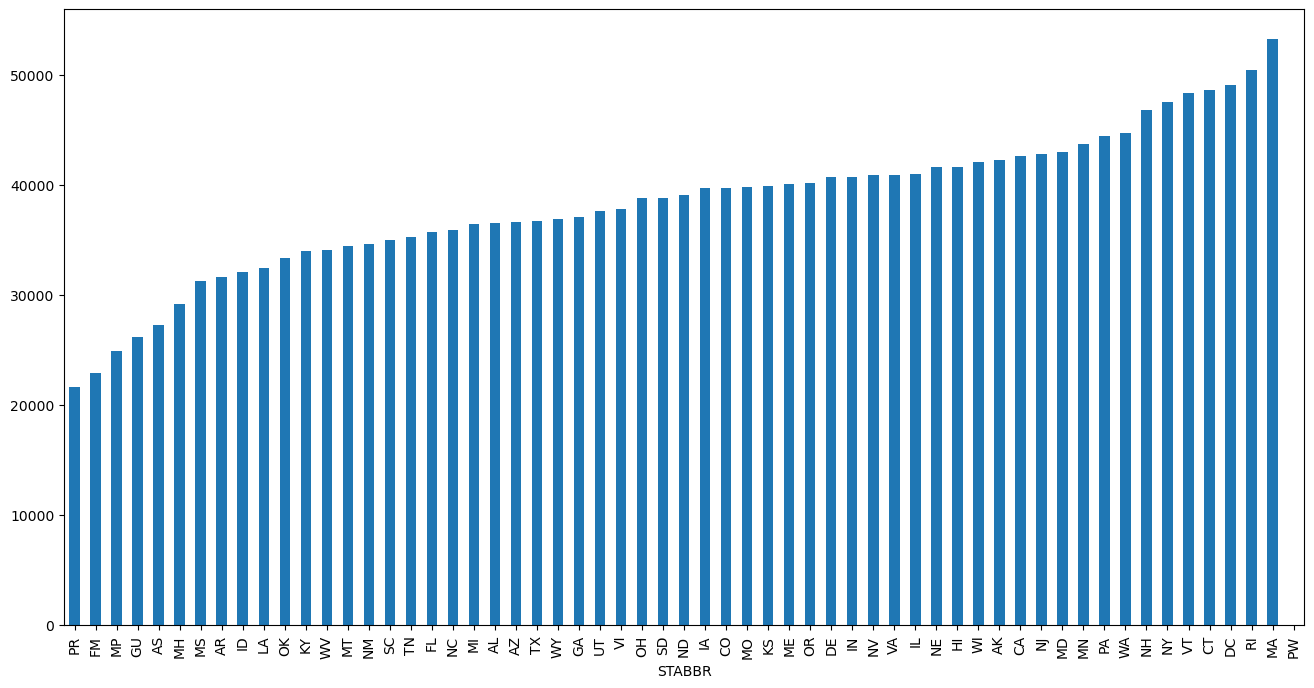

In [99]:
# bar plot for average amount earned, per state, in ascending order
(
    institutions.drop_duplicates(subset='INSTNM')
    .groupby('STABBR')['MD_EARN_WNE_P10'].mean()
    .sort_values(ascending=True)
    .plot.bar(figsize=(16,8))
)

C:\Users\perti\AppData\Local\Temp\ipykernel_45476\2182468391.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .plot.box(column='MD_EARN_WNE_P10', by='STABBR', figsize=(18, 10))


MD_EARN_WNE_P10    Axes(0.125,0.11;0.775x0.77)
dtype: object

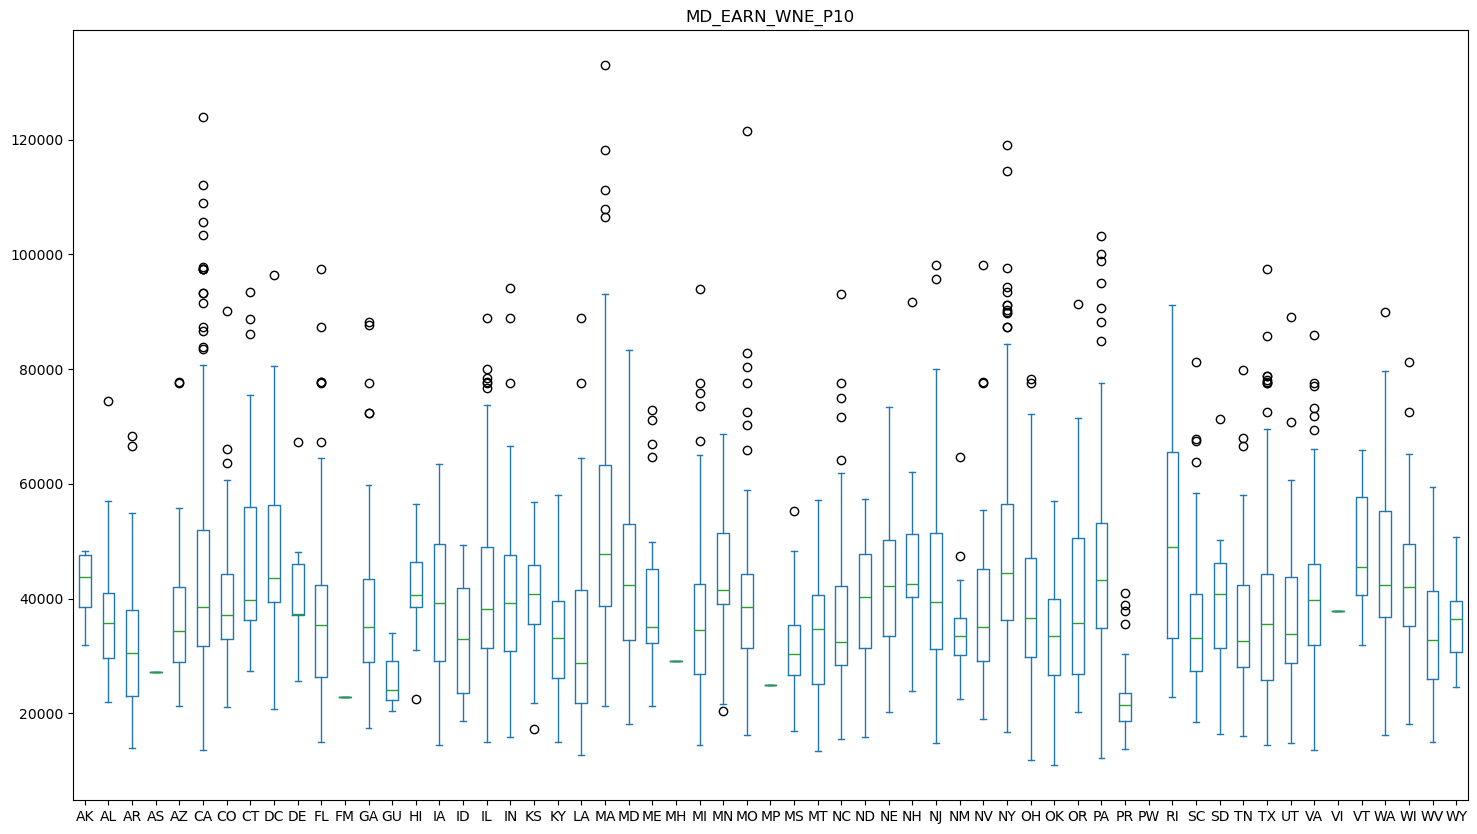

In [100]:
# boxplot for earnings by state
(
    institutions.drop_duplicates(subset='INSTNM')
    .plot.box(column='MD_EARN_WNE_P10', by='STABBR', figsize=(18, 10))
)

<Axes: >

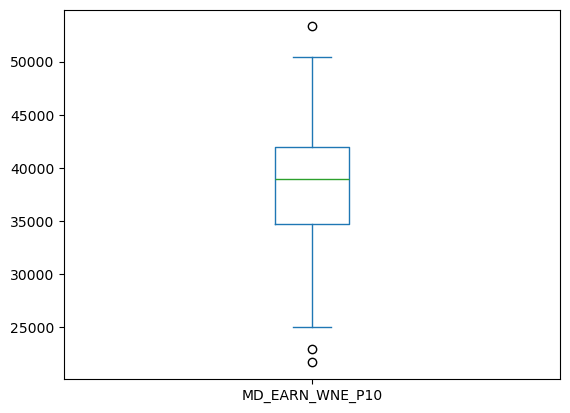

In [101]:
(
    institutions.drop_duplicates(subset='INSTNM')
    .groupby('STABBR', observed=True)['MD_EARN_WNE_P10'].mean()
    .sort_values(ascending=True)
    .plot.box()
)